Connected to .venv (Python 3.12.9)

In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.05,
            steepness=0.01,
        ),
        LeakyReLU(),
        LinearLayer(n_dendrites, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=False,
            synaptic_resampling=True,
            percentage_resample=0.2,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LeakyReLU(),
        LinearLayer(n_dendrites, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN"],
    # [model_2, b_optimiser, "dANN, b-norm"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7840 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN model...


Training :   0%|          | 0/1410 [00:00<?, ?it/s]


ValueError: Axis dimension mismatch

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN model...


Training :  12%|█▏        | 173/1410 [00:00<00:05, 233.45it/s, Epoch=1/6, Batch=174/235, Loss=0.3840]

num of dendrite successful swaps: 2446


Training :  22%|██▏       | 306/1410 [00:01<00:04, 243.61it/s, Epoch=2/6, Batch=73/235, Loss=0.4094] 

num of dendrite successful swaps: 1838


Training :  31%|███       | 433/1410 [00:01<00:03, 253.44it/s, Epoch=2/6, Batch=200/235, Loss=0.5058]

num of dendrite successful swaps: 1524


Training :  40%|███▉      | 562/1410 [00:02<00:03, 248.51it/s, Epoch=3/6, Batch=95/235, Loss=0.3269] 

num of dendrite successful swaps: 1281


Training :  49%|████▉     | 690/1410 [00:02<00:02, 256.61it/s, Epoch=3/6, Batch=223/235, Loss=0.4233]

num of dendrite successful swaps: 1147


Training :  58%|█████▊    | 817/1410 [00:03<00:02, 251.68it/s, Epoch=4/6, Batch=116/235, Loss=0.4459]

num of dendrite successful swaps: 1073


Training :  66%|██████▋   | 937/1410 [00:03<00:01, 255.32it/s, Epoch=5/6, Batch=2/235, Loss=0.3684]  

num of dendrite successful swaps: 954


Training :  76%|███████▌  | 1073/1410 [00:04<00:01, 252.84it/s, Epoch=5/6, Batch=138/235, Loss=0.3839]

num of dendrite successful swaps: 875


Training :  85%|████████▍ | 1193/1410 [00:04<00:00, 234.16it/s, Epoch=6/6, Batch=24/235, Loss=0.3471] 

num of dendrite successful swaps: 828


Training :  94%|█████████▍| 1327/1410 [00:05<00:00, 246.46it/s, Epoch=6/6, Batch=158/235, Loss=0.2718]

num of dendrite successful swaps: 797


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 244.27it/s, Epoch=6/6, Batch=234/235, Loss=0.3374]


Number of mask updates: 11
Train loss dANN model: 0.3621
Train accuracy dANN model: 86.9%
Test accuracy dANN model: 85.1%


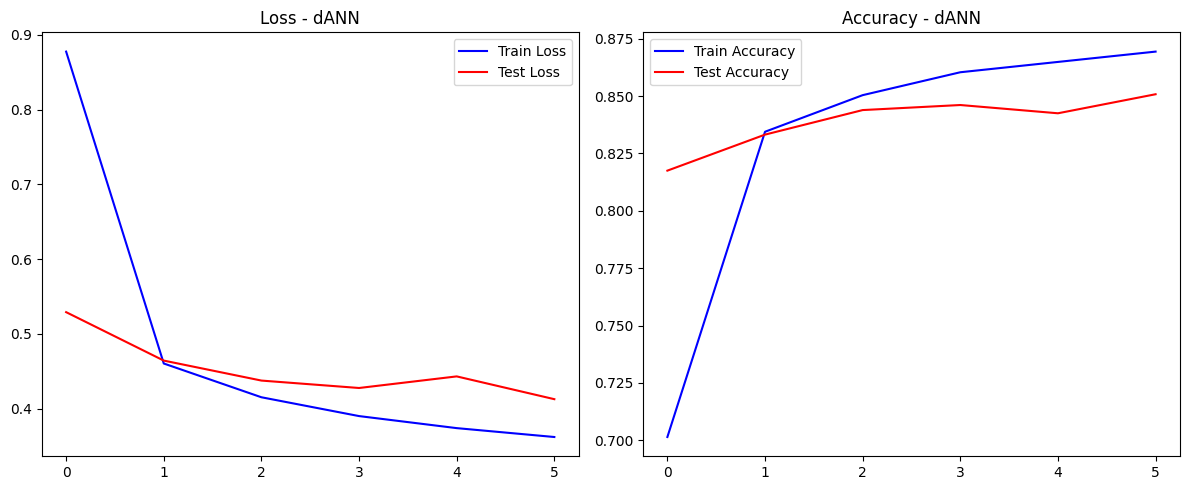


FINAL RESULTS SUMMARY
Model: dANN
Train loss: 0.362
Test loss: 0.413
Train accuracy: 0.869
Test accuracy: 0.851


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.05,
            steepness=0.01,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=False,
            synaptic_resampling=True,
            percentage_resample=0.2,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LeakyReLU(),
        LinearLayer(n_dendrites, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN"],
    # [model_2, b_optimiser, "dANN, b-norm"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 255.35it/s, Epoch=1/6, Batch=179/235, Loss=0.4618]

num of dendrite successful swaps: 2449


Training :  22%|██▏       | 306/1410 [00:01<00:04, 245.26it/s, Epoch=2/6, Batch=72/235, Loss=0.4234] 

num of dendrite successful swaps: 1845


Training :  31%|███       | 434/1410 [00:01<00:03, 254.34it/s, Epoch=2/6, Batch=201/235, Loss=0.5386]

num of dendrite successful swaps: 1520


Training :  40%|███▉      | 562/1410 [00:02<00:03, 248.19it/s, Epoch=3/6, Batch=95/235, Loss=0.4355] 

num of dendrite successful swaps: 1342


Training :  49%|████▉     | 690/1410 [00:02<00:02, 256.52it/s, Epoch=3/6, Batch=223/235, Loss=0.4068]

num of dendrite successful swaps: 1190


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 252.92it/s, Epoch=4/6, Batch=117/235, Loss=0.3844]

num of dendrite successful swaps: 1099


Training :  66%|██████▋   | 936/1410 [00:03<00:01, 256.20it/s, Epoch=5/6, Batch=1/235, Loss=0.3794]  

num of dendrite successful swaps: 1038


Training :  76%|███████▌  | 1075/1410 [00:04<00:01, 253.81it/s, Epoch=5/6, Batch=140/235, Loss=0.3580]

num of dendrite successful swaps: 954


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 238.36it/s, Epoch=6/6, Batch=25/235, Loss=0.2960] 

num of dendrite successful swaps: 868


Training :  94%|█████████▍| 1329/1410 [00:05<00:00, 254.22it/s, Epoch=6/6, Batch=160/235, Loss=0.3833]

num of dendrite successful swaps: 813


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 248.92it/s, Epoch=6/6, Batch=234/235, Loss=0.3870]


Number of mask updates: 11
Train loss dANN, prob model: 0.3597
Train accuracy dANN, prob model: 87.1%
Test accuracy dANN, prob model: 85.7%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 245.34it/s, Epoch=6/6, Batch=234/235, Loss=0.3328]


Number of mask updates: 11
Train loss dANN model: 0.3545
Train accuracy dANN model: 87.1%
Test accuracy dANN model: 86.0%


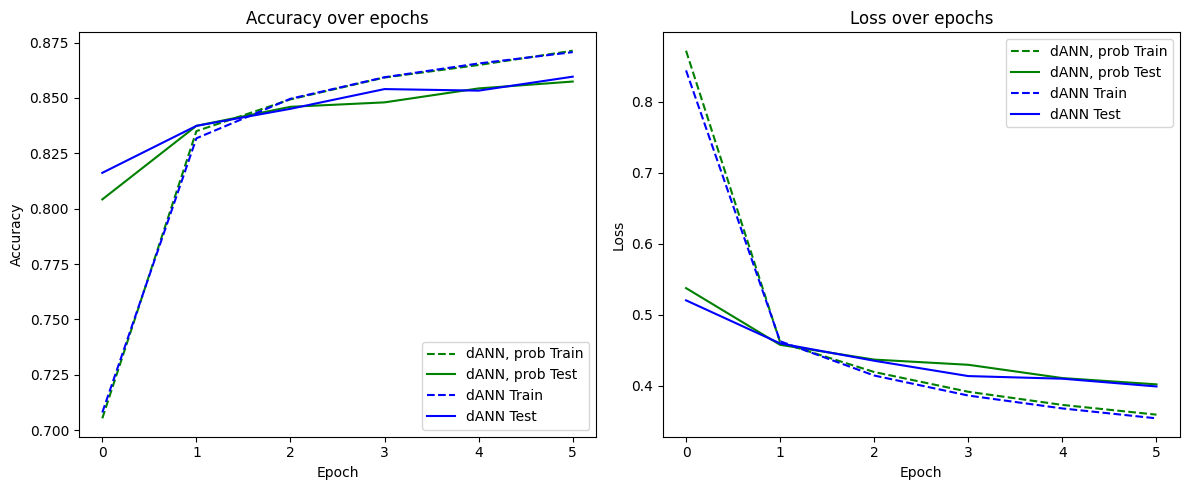

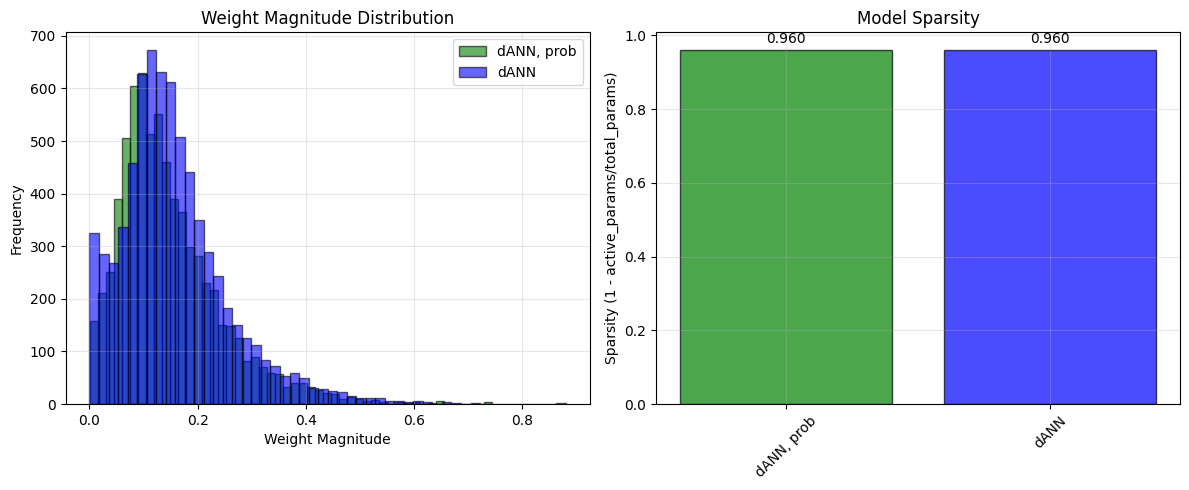


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3597       0.4023       87.1       % 85.7       %
dANN                 0.3545       0.3994       87.1       % 86.0       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.05,
            steepness=0.01,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.2,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  21%|██▏       | 301/1410 [00:01<00:04, 233.09it/s, Epoch=2/6, Batch=68/235, Loss=0.4401] 

num of dendrite successful swaps: 2224


Training :  40%|███▉      | 562/1410 [00:02<00:03, 248.38it/s, Epoch=3/6, Batch=95/235, Loss=0.3642] 

num of dendrite successful swaps: 1647


Training :  58%|█████▊    | 817/1410 [00:03<00:02, 254.22it/s, Epoch=4/6, Batch=116/235, Loss=0.4045]

num of dendrite successful swaps: 1443


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 251.35it/s, Epoch=5/6, Batch=139/235, Loss=0.3694]

num of dendrite successful swaps: 1201


Training :  94%|█████████▍| 1326/1410 [00:05<00:00, 247.25it/s, Epoch=6/6, Batch=157/235, Loss=0.3095]

num of dendrite successful swaps: 1102


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 246.95it/s, Epoch=6/6, Batch=234/235, Loss=0.3322]


Number of mask updates: 6
Train loss dANN, prob model: 0.3567
Train accuracy dANN, prob model: 87.1%
Test accuracy dANN, prob model: 85.9%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 245.54it/s, Epoch=6/6, Batch=234/235, Loss=0.2841]


Number of mask updates: 11
Train loss dANN model: 0.3534
Train accuracy dANN model: 87.0%
Test accuracy dANN model: 85.9%


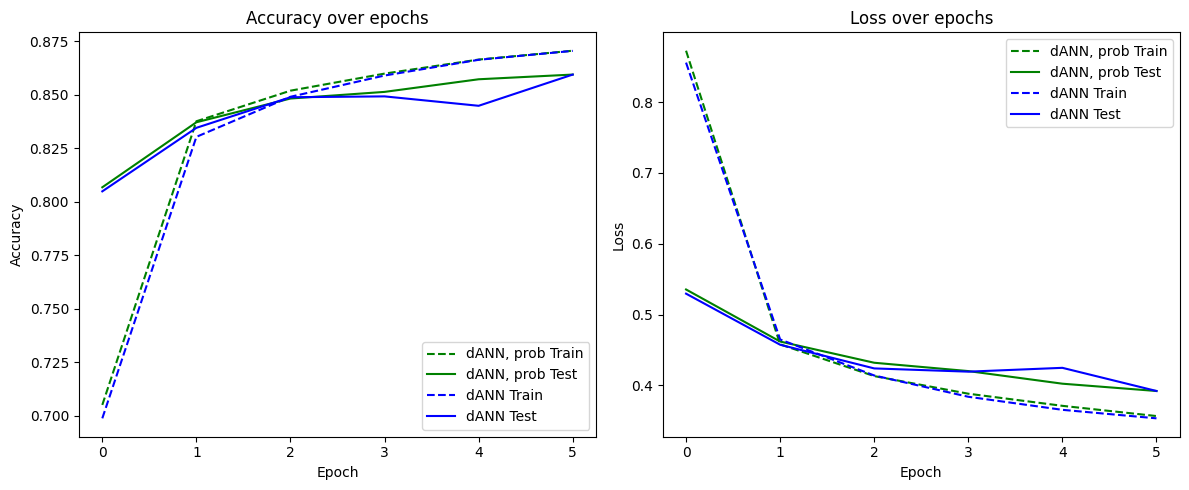

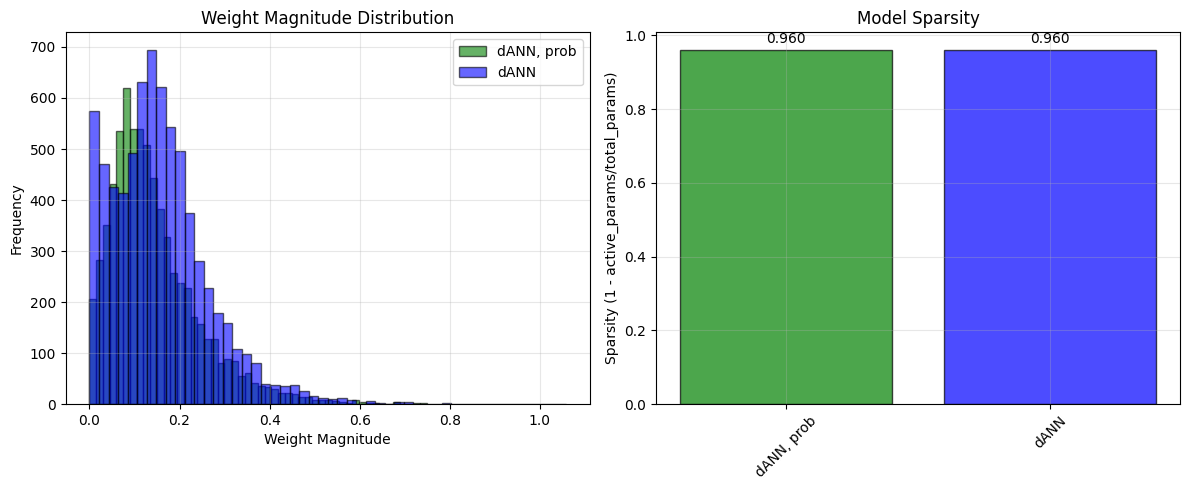


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3567       0.3920       87.1       % 85.9       %
dANN                 0.3534       0.3921       87.0       % 85.9       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=256,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.05,
            steepness=0.01,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.3,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  22%|██▏       | 307/1410 [00:01<00:04, 245.99it/s, Epoch=2/6, Batch=74/235, Loss=0.4696] 

num of dendrite successful swaps: 4042


Training :  40%|███▉      | 559/1410 [00:02<00:03, 245.14it/s, Epoch=3/6, Batch=92/235, Loss=0.4487] 

num of dendrite successful swaps: 2884


Training :  58%|█████▊    | 816/1410 [00:03<00:02, 234.30it/s, Epoch=4/6, Batch=115/235, Loss=0.4044]

num of dendrite successful swaps: 2454


Training :  76%|███████▌  | 1075/1410 [00:04<00:01, 251.20it/s, Epoch=5/6, Batch=140/235, Loss=0.4651]

num of dendrite successful swaps: 2187


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 251.30it/s, Epoch=6/6, Batch=161/235, Loss=0.3433]

num of dendrite successful swaps: 1974


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 245.33it/s, Epoch=6/6, Batch=234/235, Loss=0.2948]


Number of mask updates: 6
Train loss dANN, prob model: 0.3823
Train accuracy dANN, prob model: 86.3%
Test accuracy dANN, prob model: 85.0%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 245.79it/s, Epoch=6/6, Batch=234/235, Loss=0.3474]


Number of mask updates: 11
Train loss dANN model: 0.3548
Train accuracy dANN model: 87.1%
Test accuracy dANN model: 85.8%


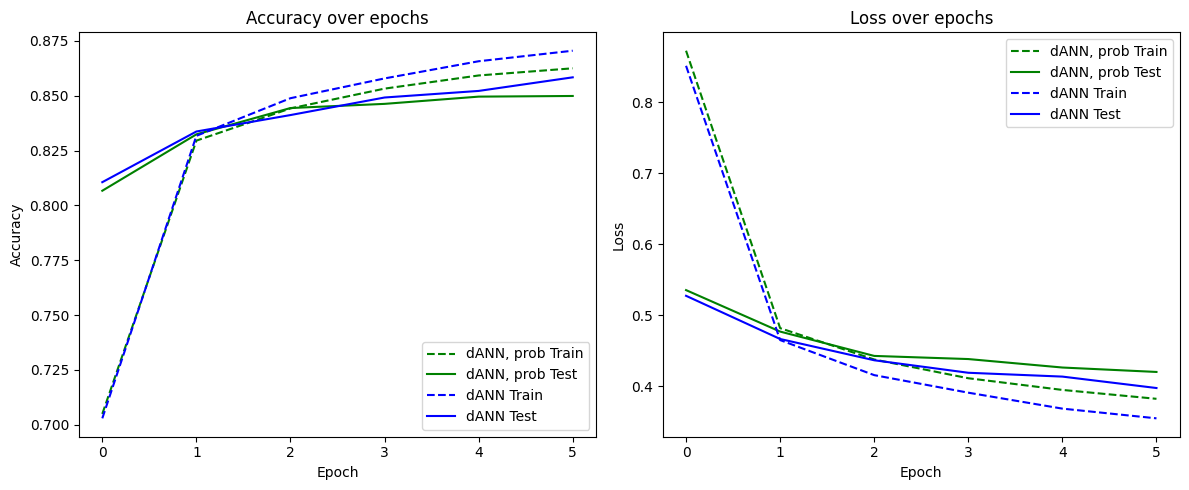

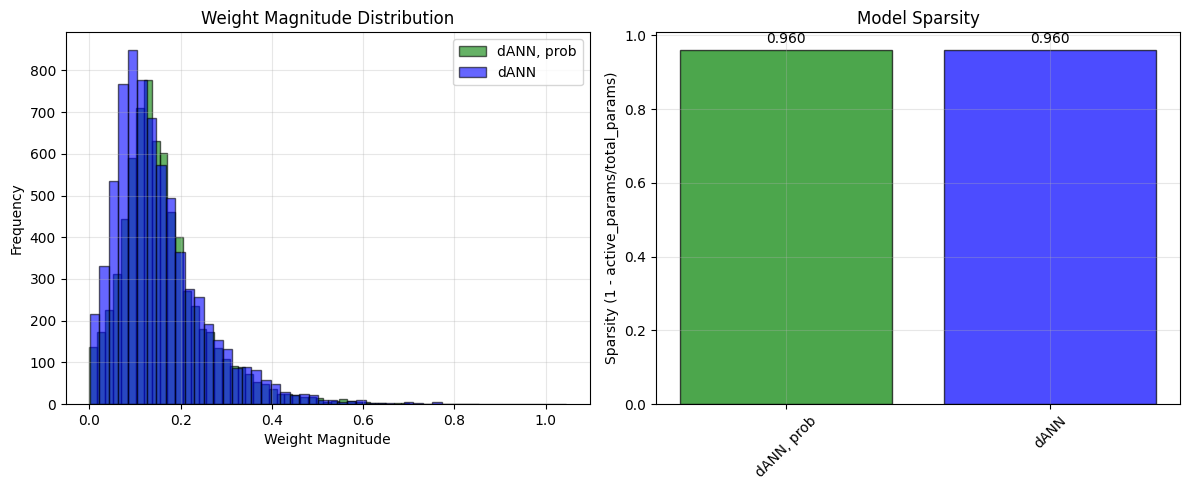


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3823       0.4201       86.3       % 85.0       %
dANN                 0.3548       0.3975       87.1       % 85.8       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=256,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.1,
            steepness=0.01,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  22%|██▏       | 305/1410 [00:01<00:04, 245.86it/s, Epoch=2/6, Batch=72/235, Loss=1.1256] 

num of dendrite successful swaps: 6439


Training :  40%|███▉      | 560/1410 [00:02<00:03, 240.59it/s, Epoch=3/6, Batch=93/235, Loss=0.6960] 

num of dendrite successful swaps: 4005


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 250.41it/s, Epoch=4/6, Batch=117/235, Loss=0.5243]

num of dendrite successful swaps: 3407


Training :  76%|███████▌  | 1071/1410 [00:04<00:01, 240.71it/s, Epoch=5/6, Batch=136/235, Loss=0.3973]

num of dendrite successful swaps: 2994


Training :  94%|█████████▍| 1329/1410 [00:05<00:00, 242.07it/s, Epoch=6/6, Batch=160/235, Loss=0.5430]

num of dendrite successful swaps: 2815


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 244.51it/s, Epoch=6/6, Batch=234/235, Loss=0.5427]


Number of mask updates: 6
Train loss dANN, prob model: 0.4837
Train accuracy dANN, prob model: 82.9%
Test accuracy dANN, prob model: 82.3%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 240.48it/s, Epoch=6/6, Batch=234/235, Loss=0.3653]


Number of mask updates: 11
Train loss dANN model: 0.3539
Train accuracy dANN model: 87.0%
Test accuracy dANN model: 85.7%


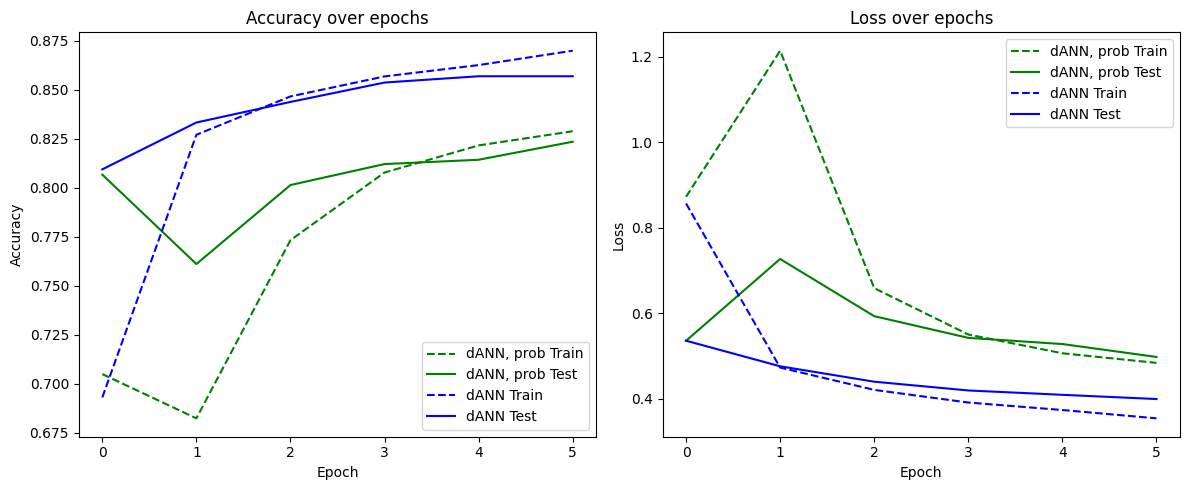

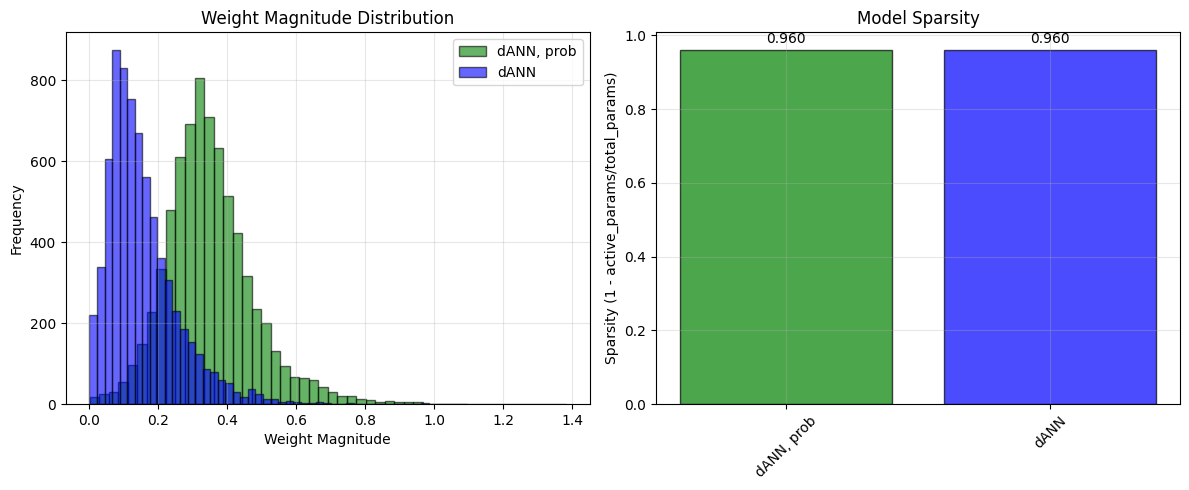


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.4837       0.4976       82.9       % 82.3       %
dANN                 0.3539       0.3991       87.0       % 85.7       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=256,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.3,
            steepness=0.05,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 177/1410 [00:00<00:04, 253.77it/s, Epoch=1/6, Batch=178/235, Loss=1.4189] 

num of dendrite successful swaps: 6480


Training :  22%|██▏       | 305/1410 [00:01<00:04, 243.19it/s, Epoch=2/6, Batch=71/235, Loss=0.7831] 

num of dendrite successful swaps: 3909


Training :  31%|███       | 434/1410 [00:01<00:03, 254.00it/s, Epoch=2/6, Batch=201/235, Loss=0.7262]

num of dendrite successful swaps: 3317


Training :  40%|███▉      | 561/1410 [00:02<00:03, 244.17it/s, Epoch=3/6, Batch=94/235, Loss=0.6105] 

num of dendrite successful swaps: 3094


Training :  49%|████▉     | 690/1410 [00:02<00:02, 254.27it/s, Epoch=3/6, Batch=223/235, Loss=0.7387]

num of dendrite successful swaps: 3015


Training :  58%|█████▊    | 816/1410 [00:03<00:02, 241.92it/s, Epoch=4/6, Batch=115/235, Loss=0.4429]

num of dendrite successful swaps: 2841


Training :  66%|██████▋   | 937/1410 [00:03<00:01, 248.65it/s, Epoch=5/6, Batch=2/235, Loss=0.5485]  

num of dendrite successful swaps: 2790


Training :  76%|███████▌  | 1073/1410 [00:04<00:01, 245.52it/s, Epoch=5/6, Batch=138/235, Loss=0.5311]

num of dendrite successful swaps: 2704


Training :  84%|████████▍ | 1191/1410 [00:04<00:00, 222.95it/s, Epoch=6/6, Batch=22/235, Loss=0.5772] 

num of dendrite successful swaps: 2701


Training :  94%|█████████▍| 1327/1410 [00:05<00:00, 246.91it/s, Epoch=6/6, Batch=158/235, Loss=0.4396]

num of dendrite successful swaps: 2618


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 243.64it/s, Epoch=6/6, Batch=234/235, Loss=0.4445]


Number of mask updates: 11
Train loss dANN, prob model: 0.5605
Train accuracy dANN, prob model: 80.4%
Test accuracy dANN, prob model: 80.5%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 244.74it/s, Epoch=6/6, Batch=234/235, Loss=0.3313]


Number of mask updates: 11
Train loss dANN model: 0.3531
Train accuracy dANN model: 87.1%
Test accuracy dANN model: 85.8%


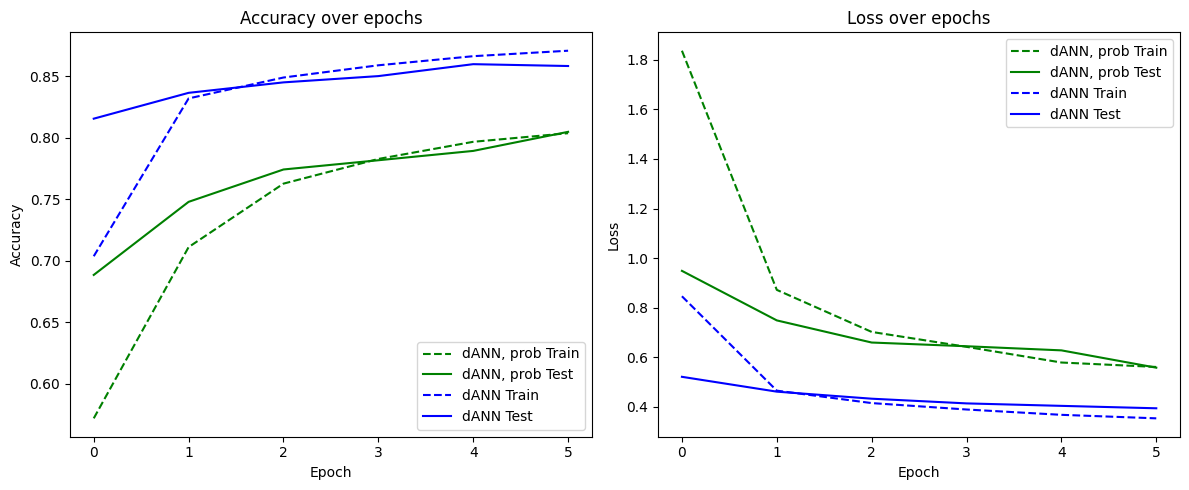

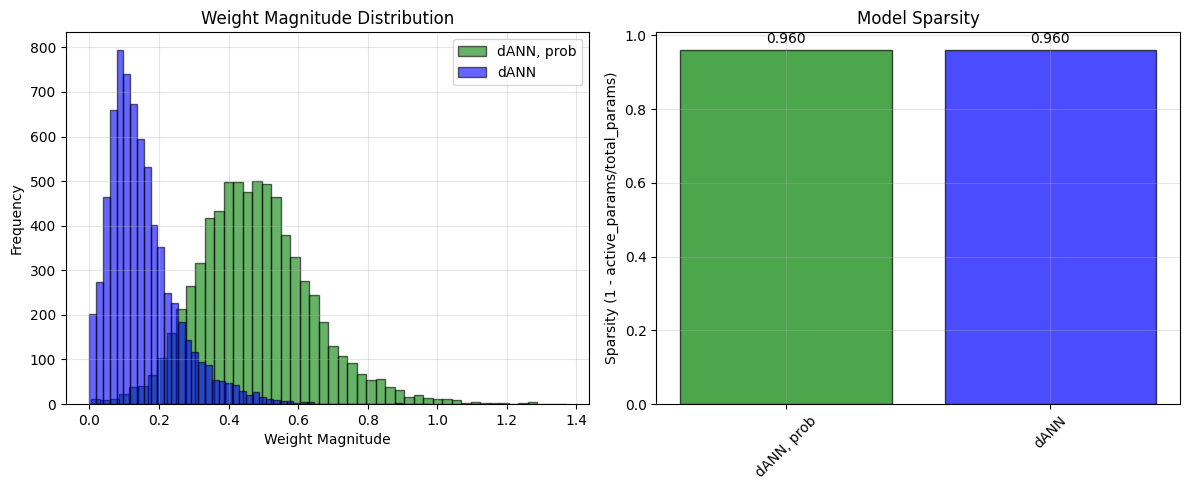


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.5605       0.5576       80.4       % 80.5       %
dANN                 0.3531       0.3937       87.1       % 85.8       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.4,
            steepness=0.1,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 177/1410 [00:00<00:04, 251.41it/s, Epoch=1/6, Batch=178/235, Loss=1.3569] 

num of dendrite successful swaps: 4654


Training :  22%|██▏       | 306/1410 [00:01<00:04, 245.98it/s, Epoch=2/6, Batch=73/235, Loss=0.9760] 

num of dendrite successful swaps: 3670


Training :  31%|███       | 434/1410 [00:01<00:03, 256.06it/s, Epoch=2/6, Batch=201/235, Loss=0.8314]

num of dendrite successful swaps: 3241


Training :  40%|███▉      | 562/1410 [00:02<00:03, 246.73it/s, Epoch=3/6, Batch=95/235, Loss=0.7366] 

num of dendrite successful swaps: 2978


Training :  49%|████▉     | 689/1410 [00:02<00:02, 256.62it/s, Epoch=3/6, Batch=222/235, Loss=0.7572]

num of dendrite successful swaps: 2903


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 250.91it/s, Epoch=4/6, Batch=117/235, Loss=0.6063]

num of dendrite successful swaps: 2833


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 256.82it/s, Epoch=5/6, Batch=3/235, Loss=0.7309]  

num of dendrite successful swaps: 2700


Training :  76%|███████▌  | 1071/1410 [00:04<00:01, 240.95it/s, Epoch=5/6, Batch=136/235, Loss=0.6396]

num of dendrite successful swaps: 2696


Training :  85%|████████▍ | 1193/1410 [00:04<00:00, 232.95it/s, Epoch=6/6, Batch=24/235, Loss=0.6035] 

num of dendrite successful swaps: 2717


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 246.34it/s, Epoch=6/6, Batch=161/235, Loss=0.6236]

num of dendrite successful swaps: 2747


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 246.23it/s, Epoch=6/6, Batch=234/235, Loss=0.5936]


Number of mask updates: 11
Train loss dANN, prob model: 0.6109
Train accuracy dANN, prob model: 78.0%
Test accuracy dANN, prob model: 79.0%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 248.77it/s, Epoch=6/6, Batch=234/235, Loss=0.2856]


Number of mask updates: 11
Train loss dANN model: 0.3496
Train accuracy dANN model: 87.3%
Test accuracy dANN model: 85.0%


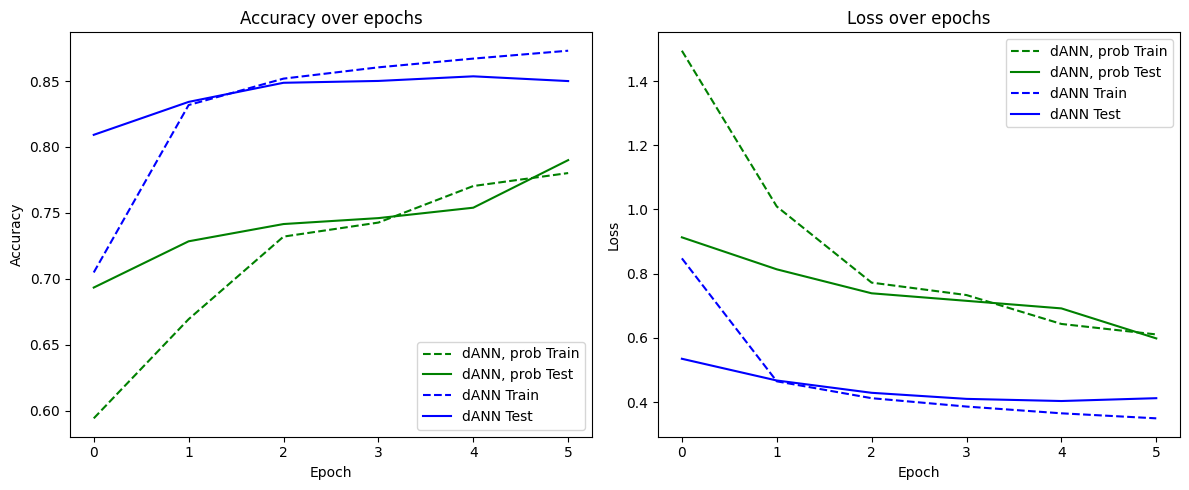

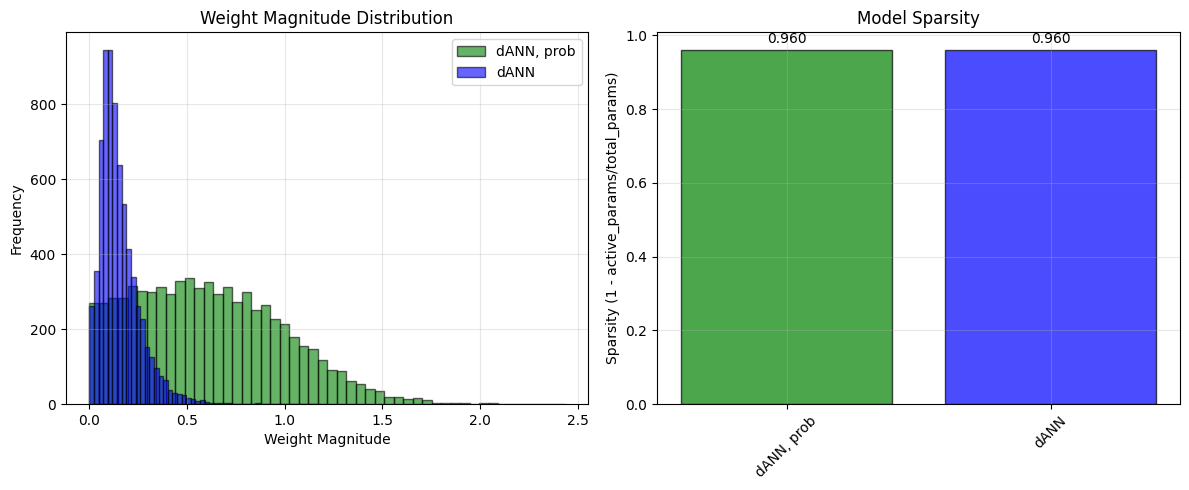


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.6109       0.5985       78.0       % 79.0       %
dANN                 0.3496       0.4124       87.3       % 85.0       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.4,
            steepness=0.4,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.4,
            steepness=0.4,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 177/1410 [00:00<00:04, 250.84it/s, Epoch=1/6, Batch=178/235, Loss=1.3569] 

num of dendrite successful swaps: 4654


Training :  22%|██▏       | 307/1410 [00:01<00:04, 239.30it/s, Epoch=2/6, Batch=74/235, Loss=0.9966] 

num of dendrite successful swaps: 3670


Training :  31%|███       | 434/1410 [00:01<00:03, 256.89it/s, Epoch=2/6, Batch=201/235, Loss=0.8314]

num of dendrite successful swaps: 3241


Training :  40%|███▉      | 560/1410 [00:02<00:03, 243.65it/s, Epoch=3/6, Batch=93/235, Loss=0.8080] 

num of dendrite successful swaps: 2978


Training :  49%|████▉     | 689/1410 [00:02<00:02, 251.16it/s, Epoch=3/6, Batch=222/235, Loss=0.7572]

num of dendrite successful swaps: 2903


Training :  58%|█████▊    | 816/1410 [00:03<00:02, 243.98it/s, Epoch=4/6, Batch=115/235, Loss=0.6264]

num of dendrite successful swaps: 2833


Training :  66%|██████▋   | 937/1410 [00:03<00:01, 251.40it/s, Epoch=5/6, Batch=2/235, Loss=0.6164]  

num of dendrite successful swaps: 2700


Training :  76%|███████▌  | 1072/1410 [00:04<00:01, 244.68it/s, Epoch=5/6, Batch=137/235, Loss=0.7014]

num of dendrite successful swaps: 2696


Training :  84%|████████▍ | 1190/1410 [00:04<00:00, 244.93it/s, Epoch=6/6, Batch=21/235, Loss=0.5580] 

num of dendrite successful swaps: 2717


Training :  90%|█████████ | 1269/1410 [00:05<00:00, 235.17it/s, Epoch=6/6, Batch=100/235, Loss=0.5072]

Restarted .venv (Python 3.12.9)

Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  12%|█▏        | 174/1410 [00:00<00:05, 240.09it/s, Epoch=1/6, Batch=175/235, Loss=1.3447] 

num of dendrite successful swaps: 6775


Training :  21%|██▏       | 302/1410 [00:01<00:04, 236.33it/s, Epoch=2/6, Batch=69/235, Loss=1.0632] 

num of dendrite successful swaps: 3925


Training :  31%|███       | 435/1410 [00:01<00:03, 256.97it/s, Epoch=2/6, Batch=202/235, Loss=0.5913]

num of dendrite successful swaps: 2530


Training :  40%|███▉      | 563/1410 [00:02<00:03, 254.48it/s, Epoch=3/6, Batch=96/235, Loss=0.7403] 

num of dendrite successful swaps: 1840


Training :  49%|████▉     | 691/1410 [00:02<00:02, 260.32it/s, Epoch=3/6, Batch=224/235, Loss=0.5652]

num of dendrite successful swaps: 1496


Training :  58%|█████▊    | 819/1410 [00:03<00:02, 253.97it/s, Epoch=4/6, Batch=118/235, Loss=0.4437]

num of dendrite successful swaps: 1189


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 260.81it/s, Epoch=5/6, Batch=3/235, Loss=0.6002]  

num of dendrite successful swaps: 1071


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 255.79it/s, Epoch=5/6, Batch=139/235, Loss=0.5569]

num of dendrite successful swaps: 901


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 238.52it/s, Epoch=6/6, Batch=25/235, Loss=0.5350] 

num of dendrite successful swaps: 818


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 255.60it/s, Epoch=6/6, Batch=161/235, Loss=0.4950]

num of dendrite successful swaps: 773


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 247.55it/s, Epoch=6/6, Batch=234/235, Loss=0.4779]


Number of mask updates: 11
Train loss dANN, prob model: 0.4909
Train accuracy dANN, prob model: 82.6%
Test accuracy dANN, prob model: 81.9%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 249.71it/s, Epoch=6/6, Batch=234/235, Loss=0.3776]


Number of mask updates: 11
Train loss dANN model: 0.3557
Train accuracy dANN model: 87.0%
Test accuracy dANN model: 85.6%


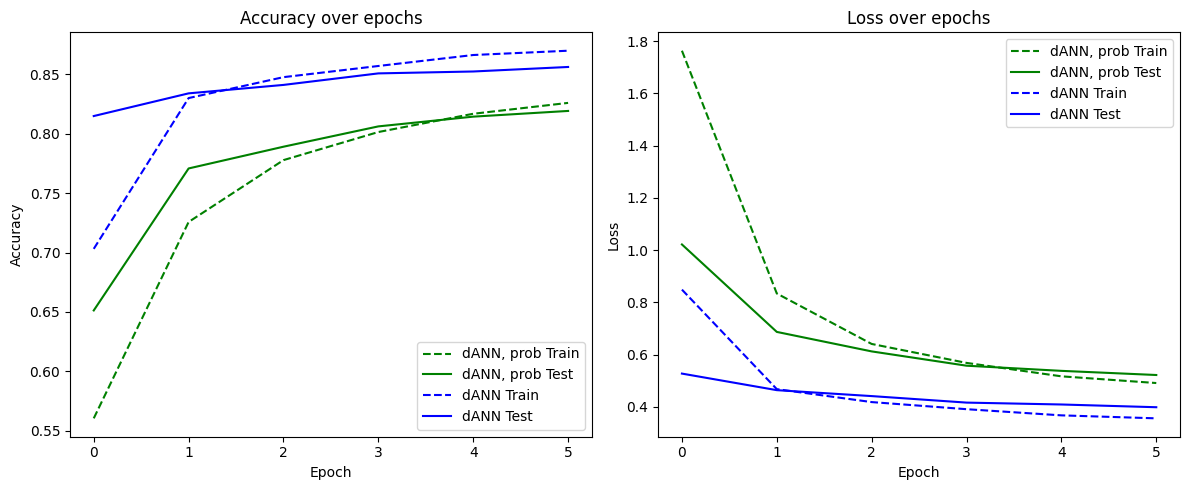

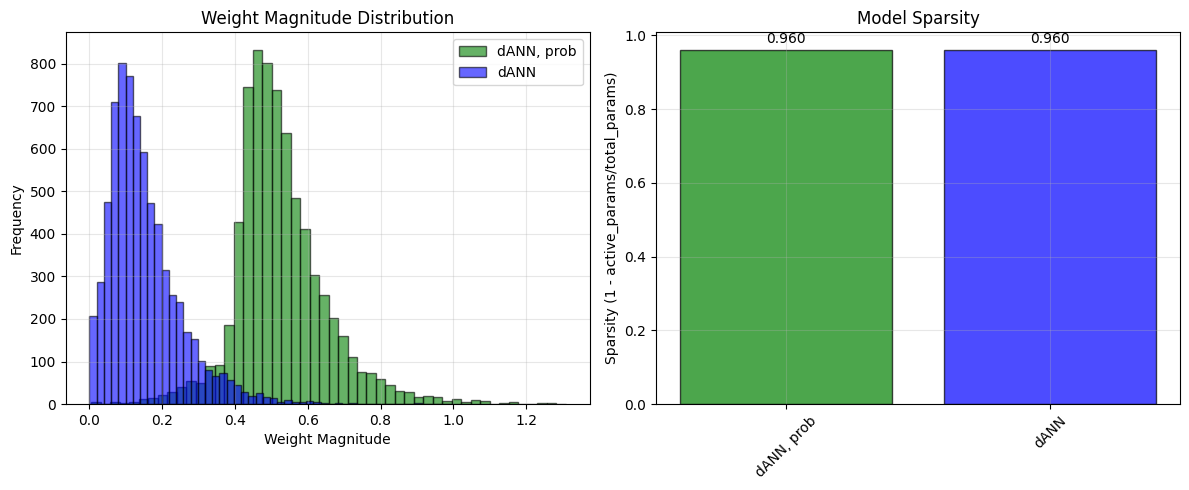


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.4909       0.5216       82.6       % 81.9       %
dANN                 0.3557       0.3982       87.0       % 85.6       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.4,
            steepness=0.01,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 255.76it/s, Epoch=1/6, Batch=179/235, Loss=1.3343] 

num of dendrite successful swaps: 6743


Training :  22%|██▏       | 306/1410 [00:01<00:04, 242.41it/s, Epoch=2/6, Batch=73/235, Loss=0.8871] 

num of dendrite successful swaps: 3818


Training :  30%|███       | 430/1410 [00:01<00:03, 248.32it/s, Epoch=2/6, Batch=197/235, Loss=0.6354]

num of dendrite successful swaps: 2648


Training :  40%|███▉      | 560/1410 [00:02<00:03, 240.87it/s, Epoch=3/6, Batch=93/235, Loss=0.5545] 

num of dendrite successful swaps: 1985


Training :  49%|████▉     | 690/1410 [00:02<00:02, 255.88it/s, Epoch=3/6, Batch=223/235, Loss=0.5790]

num of dendrite successful swaps: 1682


Training :  58%|█████▊    | 817/1410 [00:03<00:02, 250.01it/s, Epoch=4/6, Batch=116/235, Loss=0.5792]

num of dendrite successful swaps: 1492


Training :  67%|██████▋   | 940/1410 [00:03<00:01, 237.85it/s, Epoch=5/6, Batch=4/235, Loss=0.7179]  

num of dendrite successful swaps: 1294


Training :  76%|███████▌  | 1072/1410 [00:04<00:01, 248.71it/s, Epoch=5/6, Batch=136/235, Loss=0.5611]

num of dendrite successful swaps: 1169


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 235.09it/s, Epoch=6/6, Batch=25/235, Loss=0.4858] 

num of dendrite successful swaps: 1093


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 254.53it/s, Epoch=6/6, Batch=161/235, Loss=0.5370]

num of dendrite successful swaps: 1016


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 247.67it/s, Epoch=6/6, Batch=234/235, Loss=0.6095]


Number of mask updates: 11
Train loss dANN, prob model: 0.5249
Train accuracy dANN, prob model: 81.8%
Test accuracy dANN, prob model: 81.3%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 243.49it/s, Epoch=6/6, Batch=234/235, Loss=0.3414]


Number of mask updates: 11
Train loss dANN model: 0.3547
Train accuracy dANN model: 87.0%
Test accuracy dANN model: 85.7%


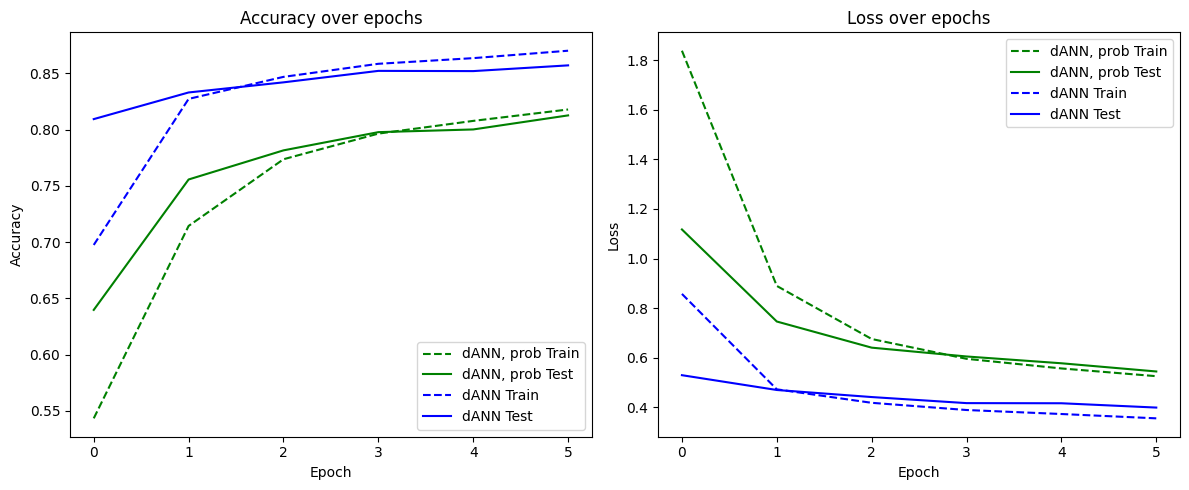

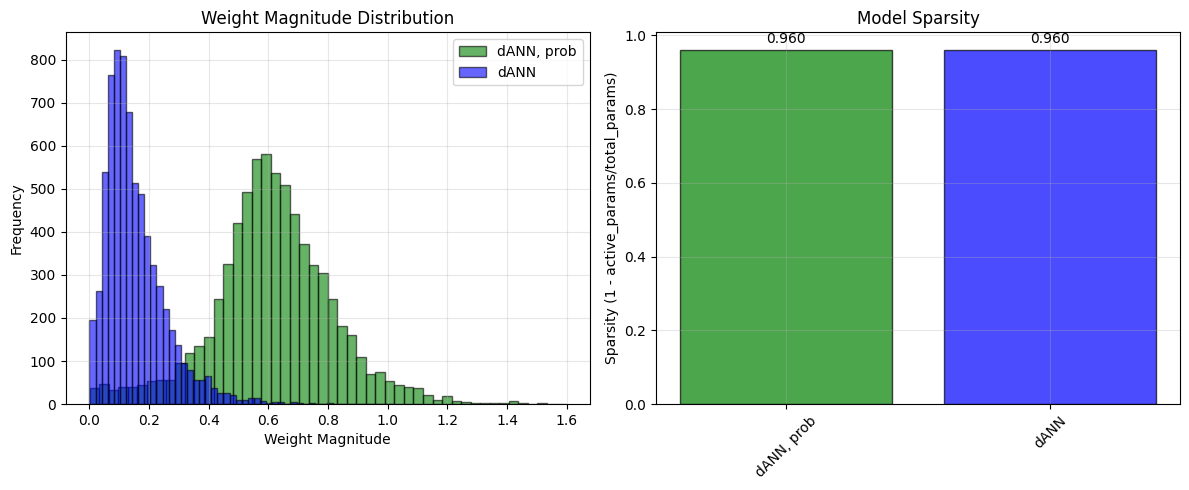


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.5249       0.5440       81.8       % 81.3       %
dANN                 0.3547       0.3982       87.0       % 85.7       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.4,
            steepness=0.05,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 254.47it/s, Epoch=1/6, Batch=178/235, Loss=0.8374]

num of dendrite successful swaps: 5055


Training :  22%|██▏       | 306/1410 [00:01<00:04, 241.74it/s, Epoch=2/6, Batch=73/235, Loss=0.5777] 

num of dendrite successful swaps: 3125


Training :  31%|███       | 433/1410 [00:01<00:03, 250.75it/s, Epoch=2/6, Batch=200/235, Loss=0.5678]

num of dendrite successful swaps: 2199


Training :  40%|███▉      | 560/1410 [00:02<00:03, 236.41it/s, Epoch=3/6, Batch=93/235, Loss=0.5210] 

num of dendrite successful swaps: 1680


Training :  49%|████▉     | 689/1410 [00:02<00:02, 252.13it/s, Epoch=3/6, Batch=222/235, Loss=0.4249]

num of dendrite successful swaps: 1371


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 251.38it/s, Epoch=4/6, Batch=117/235, Loss=0.4318]

num of dendrite successful swaps: 1247


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 236.81it/s, Epoch=5/6, Batch=3/235, Loss=0.4280]  

num of dendrite successful swaps: 1124


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 254.24it/s, Epoch=5/6, Batch=139/235, Loss=0.3948]

num of dendrite successful swaps: 1028


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 235.52it/s, Epoch=6/6, Batch=25/235, Loss=0.4628] 

num of dendrite successful swaps: 927


Training :  94%|█████████▍| 1326/1410 [00:05<00:00, 243.60it/s, Epoch=6/6, Batch=157/235, Loss=0.4315]

num of dendrite successful swaps: 864


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 246.83it/s, Epoch=6/6, Batch=234/235, Loss=0.3934]


Number of mask updates: 11
Train loss dANN, prob model: 0.4481
Train accuracy dANN, prob model: 84.1%
Test accuracy dANN, prob model: 83.7%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 248.66it/s, Epoch=6/6, Batch=234/235, Loss=0.3549]


Number of mask updates: 11
Train loss dANN model: 0.3563
Train accuracy dANN model: 86.9%
Test accuracy dANN model: 85.6%


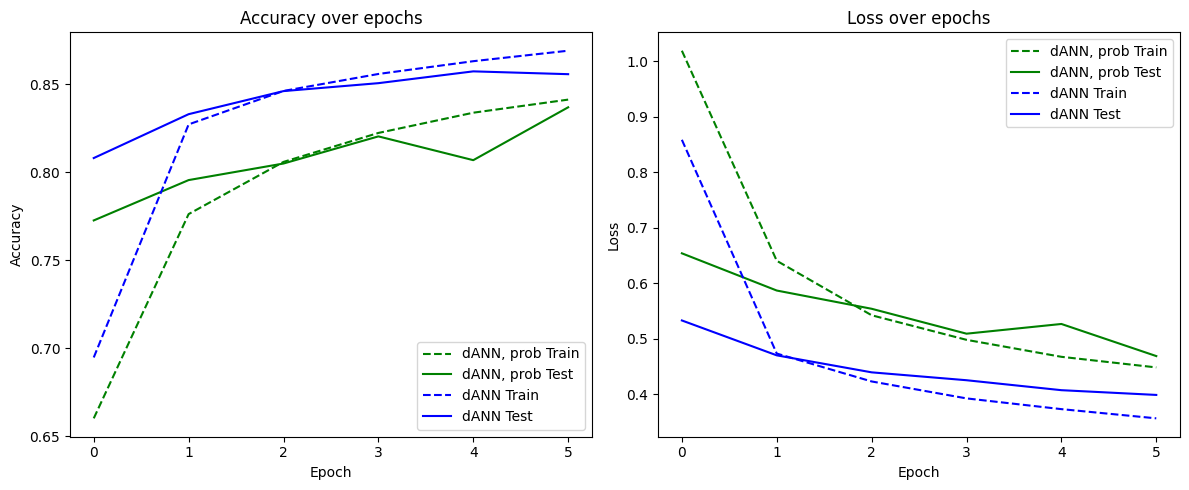

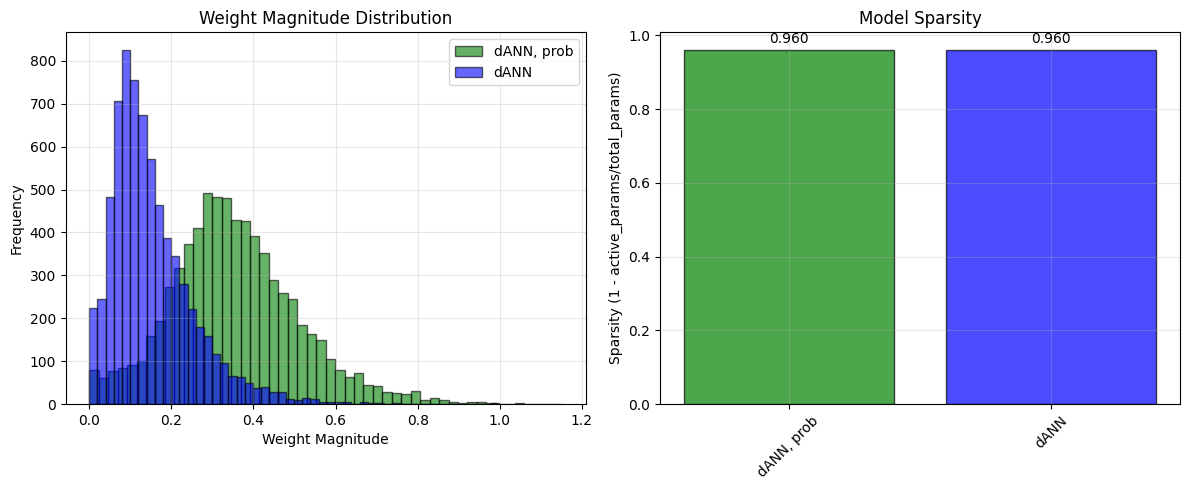


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.4481       0.4686       84.1       % 83.7       %
dANN                 0.3563       0.3985       86.9       % 85.6       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.15,
            steepness=0.05,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 256.81it/s, Epoch=1/6, Batch=179/235, Loss=0.4960]

num of dendrite successful swaps: 4446


Training :  22%|██▏       | 306/1410 [00:01<00:04, 245.21it/s, Epoch=2/6, Batch=73/235, Loss=0.5330] 

num of dendrite successful swaps: 2659


Training :  31%|███       | 435/1410 [00:01<00:03, 259.49it/s, Epoch=2/6, Batch=202/235, Loss=0.4187]

num of dendrite successful swaps: 1834


Training :  40%|███▉      | 562/1410 [00:02<00:03, 250.75it/s, Epoch=3/6, Batch=95/235, Loss=0.4787] 

num of dendrite successful swaps: 1350


Training :  49%|████▉     | 690/1410 [00:02<00:02, 256.46it/s, Epoch=3/6, Batch=223/235, Loss=0.4281]

num of dendrite successful swaps: 1101


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 253.35it/s, Epoch=4/6, Batch=117/235, Loss=0.5190]

num of dendrite successful swaps: 922


Training :  67%|██████▋   | 939/1410 [00:03<00:01, 257.92it/s, Epoch=5/6, Batch=4/235, Loss=0.4153]  

num of dendrite successful swaps: 796


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 254.00it/s, Epoch=5/6, Batch=139/235, Loss=0.5009]

num of dendrite successful swaps: 741


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 236.15it/s, Epoch=6/6, Batch=25/235, Loss=0.3760] 

num of dendrite successful swaps: 665


Training :  94%|█████████▍| 1329/1410 [00:05<00:00, 252.07it/s, Epoch=6/6, Batch=160/235, Loss=0.4663]

num of dendrite successful swaps: 619


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 250.03it/s, Epoch=6/6, Batch=234/235, Loss=0.3876]


Number of mask updates: 11
Train loss dANN, prob model: 0.3975
Train accuracy dANN, prob model: 85.8%
Test accuracy dANN, prob model: 84.8%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 244.53it/s, Epoch=6/6, Batch=234/235, Loss=0.3774]


Number of mask updates: 11
Train loss dANN model: 0.3551
Train accuracy dANN model: 87.0%
Test accuracy dANN model: 85.4%


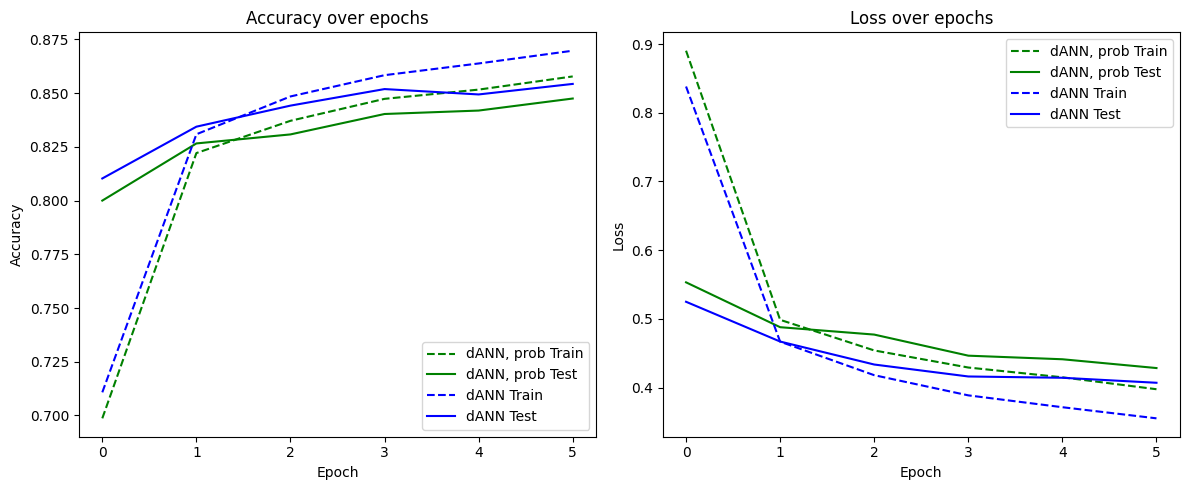

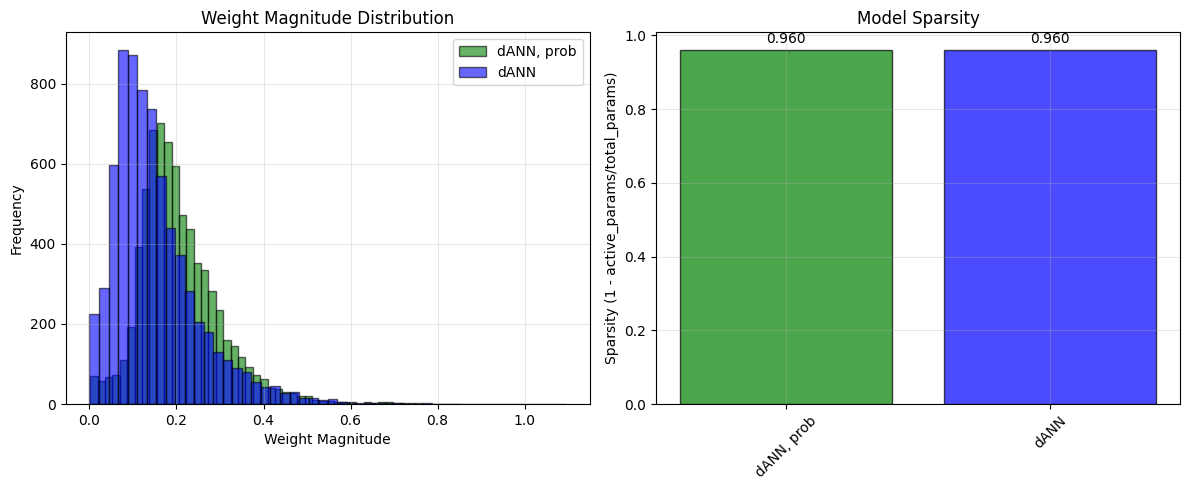


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3975       0.4283       85.8       % 84.8       %
dANN                 0.3551       0.4069       87.0       % 85.4       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.1,
            steepness=0.01,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 249.15it/s, Epoch=1/6, Batch=179/235, Loss=0.6421]

num of dendrite successful swaps: 3676


Training :  22%|██▏       | 306/1410 [00:01<00:04, 244.31it/s, Epoch=2/6, Batch=73/235, Loss=0.6681] 

num of dendrite successful swaps: 2565


Training :  31%|███       | 434/1410 [00:01<00:03, 256.91it/s, Epoch=2/6, Batch=201/235, Loss=0.5646]

num of dendrite successful swaps: 1968


Training :  40%|███▉      | 561/1410 [00:02<00:03, 246.97it/s, Epoch=3/6, Batch=94/235, Loss=0.5261] 

num of dendrite successful swaps: 1611


Training :  49%|████▉     | 690/1410 [00:02<00:02, 256.67it/s, Epoch=3/6, Batch=223/235, Loss=0.5118]

num of dendrite successful swaps: 1416


Training :  58%|█████▊    | 817/1410 [00:03<00:02, 248.69it/s, Epoch=4/6, Batch=116/235, Loss=0.4946]

num of dendrite successful swaps: 1242


Training :  66%|██████▋   | 935/1410 [00:03<00:01, 251.11it/s, Epoch=4/6, Batch=234/235, Loss=0.6116]

num of dendrite successful swaps: 1134


Training :  76%|███████▌  | 1072/1410 [00:04<00:01, 245.81it/s, Epoch=5/6, Batch=137/235, Loss=0.4445]

num of dendrite successful swaps: 1029


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 231.67it/s, Epoch=6/6, Batch=25/235, Loss=0.4887] 

num of dendrite successful swaps: 1001


Training :  94%|█████████▍| 1331/1410 [00:05<00:00, 255.42it/s, Epoch=6/6, Batch=161/235, Loss=0.3365]

num of dendrite successful swaps: 950


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 246.46it/s, Epoch=6/6, Batch=234/235, Loss=0.4387]


Number of mask updates: 11
Train loss dANN, prob model: 0.4537
Train accuracy dANN, prob model: 83.6%
Test accuracy dANN, prob model: 83.7%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 245.50it/s, Epoch=6/6, Batch=234/235, Loss=0.3290]


Number of mask updates: 11
Train loss dANN model: 0.3566
Train accuracy dANN model: 86.9%
Test accuracy dANN model: 85.7%


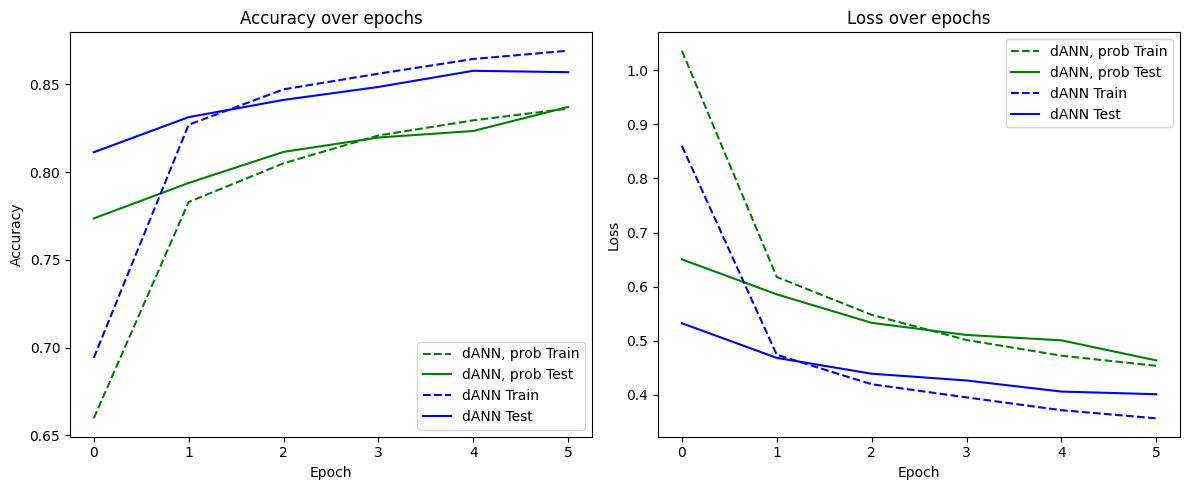

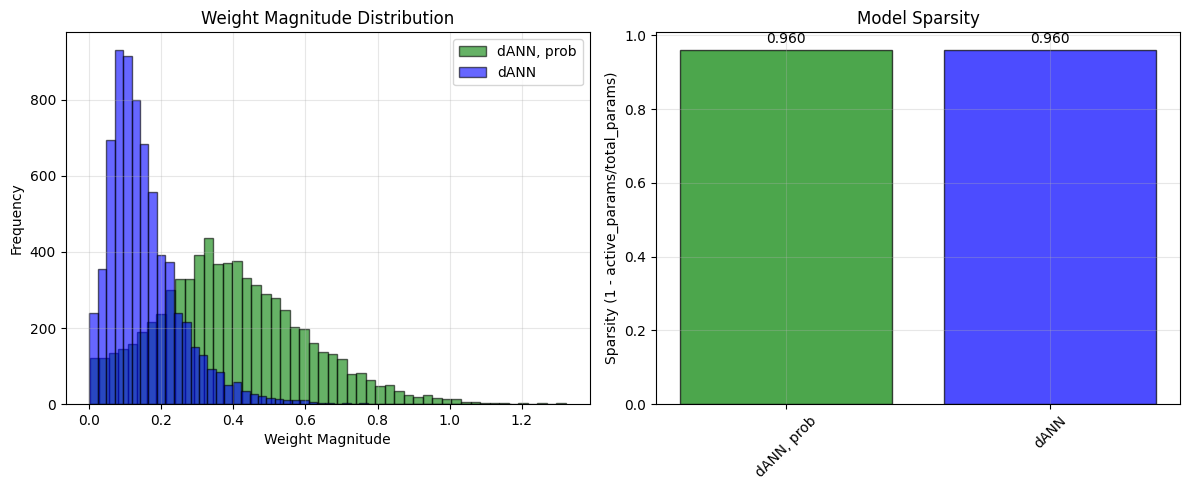


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.4537       0.4636       83.6       % 83.7       %
dANN                 0.3566       0.4011       86.9       % 85.7       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.1,
            steepness=0.1,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   6%|▌         | 175/2820 [00:00<00:10, 243.28it/s, Epoch=1/12, Batch=176/235, Loss=0.8676]

num of dendrite successful swaps: 3898


Training :  11%|█         | 305/2820 [00:01<00:10, 241.58it/s, Epoch=2/12, Batch=72/235, Loss=0.7548] 

num of dendrite successful swaps: 2660


Training :  15%|█▌        | 435/2820 [00:01<00:09, 250.76it/s, Epoch=2/12, Batch=202/235, Loss=0.6112]

num of dendrite successful swaps: 1945


Training :  20%|█▉        | 562/2820 [00:02<00:09, 250.41it/s, Epoch=3/12, Batch=95/235, Loss=0.6388] 

num of dendrite successful swaps: 1666


Training :  24%|██▍       | 689/2820 [00:02<00:08, 253.67it/s, Epoch=3/12, Batch=222/235, Loss=0.5653]

num of dendrite successful swaps: 1469


Training :  29%|██▉       | 817/2820 [00:03<00:08, 243.71it/s, Epoch=4/12, Batch=116/235, Loss=0.4589]

num of dendrite successful swaps: 1300


Training :  33%|███▎      | 938/2820 [00:03<00:07, 259.23it/s, Epoch=5/12, Batch=3/235, Loss=0.3986]  

num of dendrite successful swaps: 1122


Training :  38%|███▊      | 1075/2820 [00:04<00:06, 255.36it/s, Epoch=5/12, Batch=140/235, Loss=0.5173]

num of dendrite successful swaps: 1042


Training :  42%|████▏     | 1195/2820 [00:04<00:06, 238.48it/s, Epoch=6/12, Batch=26/235, Loss=0.4706] 

num of dendrite successful swaps: 980


Training :  47%|████▋     | 1329/2820 [00:05<00:05, 254.91it/s, Epoch=6/12, Batch=160/235, Loss=0.4537]

num of dendrite successful swaps: 901


Training :  52%|█████▏    | 1458/2820 [00:05<00:05, 247.59it/s, Epoch=7/12, Batch=55/235, Loss=0.4287] 

num of dendrite successful swaps: 909


Training :  56%|█████▌    | 1586/2820 [00:06<00:04, 255.30it/s, Epoch=7/12, Batch=183/235, Loss=0.5065]

num of dendrite successful swaps: 877


Training :  61%|██████    | 1713/2820 [00:06<00:04, 247.27it/s, Epoch=8/12, Batch=76/235, Loss=0.5143] 

num of dendrite successful swaps: 810


Training :  65%|██████▌   | 1840/2820 [00:07<00:03, 249.52it/s, Epoch=8/12, Batch=203/235, Loss=0.4398]

num of dendrite successful swaps: 772


Training :  70%|██████▉   | 1968/2820 [00:07<00:03, 237.52it/s, Epoch=9/12, Batch=97/235, Loss=0.4804] 

num of dendrite successful swaps: 733


Training :  74%|███████▍  | 2098/2820 [00:08<00:02, 255.36it/s, Epoch=9/12, Batch=227/235, Loss=0.4415]

num of dendrite successful swaps: 740


Training :  79%|███████▉  | 2226/2820 [00:09<00:02, 256.35it/s, Epoch=10/12, Batch=121/235, Loss=0.4814]

num of dendrite successful swaps: 714


Training :  83%|████████▎ | 2346/2820 [00:09<00:01, 258.72it/s, Epoch=11/12, Batch=7/235, Loss=0.4662]  

num of dendrite successful swaps: 674


Training :  88%|████████▊ | 2482/2820 [00:10<00:01, 253.18it/s, Epoch=11/12, Batch=142/235, Loss=0.4471]

num of dendrite successful swaps: 679


Training :  92%|█████████▏| 2603/2820 [00:10<00:00, 236.28it/s, Epoch=12/12, Batch=30/235, Loss=0.4037] 

num of dendrite successful swaps: 659


Training :  97%|█████████▋| 2739/2820 [00:11<00:00, 258.29it/s, Epoch=12/12, Batch=166/235, Loss=0.4284]

num of dendrite successful swaps: 643


Training : 100%|█████████▉| 2808/2820 [00:11<00:00, 248.06it/s, Epoch=12/12, Batch=234/235, Loss=0.4193]


Number of mask updates: 22
Train loss dANN, prob model: 0.4377
Train accuracy dANN, prob model: 84.4%
Test accuracy dANN, prob model: 83.3%

Training dANN model...


Training : 100%|█████████▉| 2808/2820 [00:11<00:00, 250.71it/s, Epoch=12/12, Batch=234/235, Loss=0.3341]


Number of mask updates: 22
Train loss dANN model: 0.3047
Train accuracy dANN model: 88.8%
Test accuracy dANN model: 87.0%


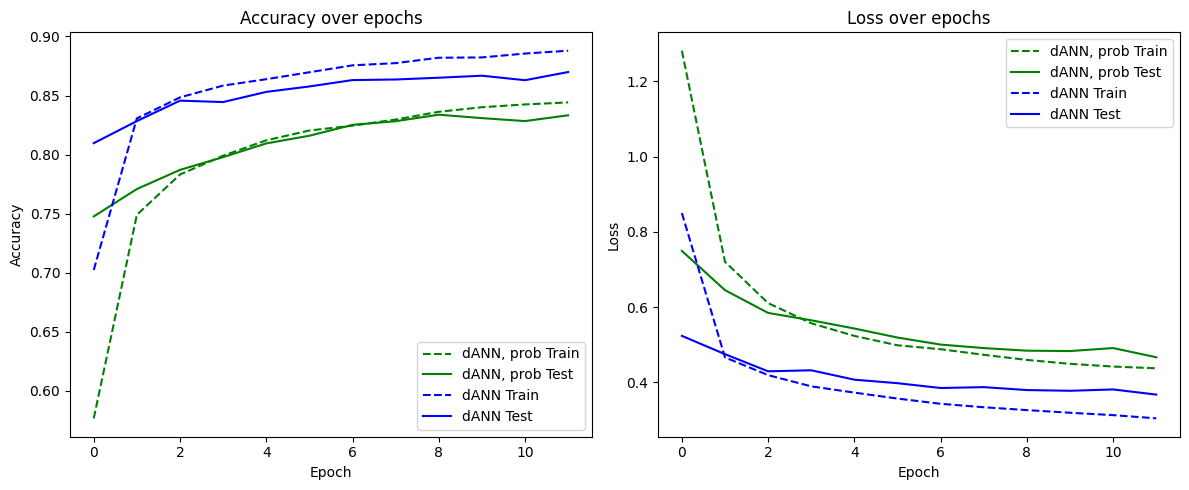

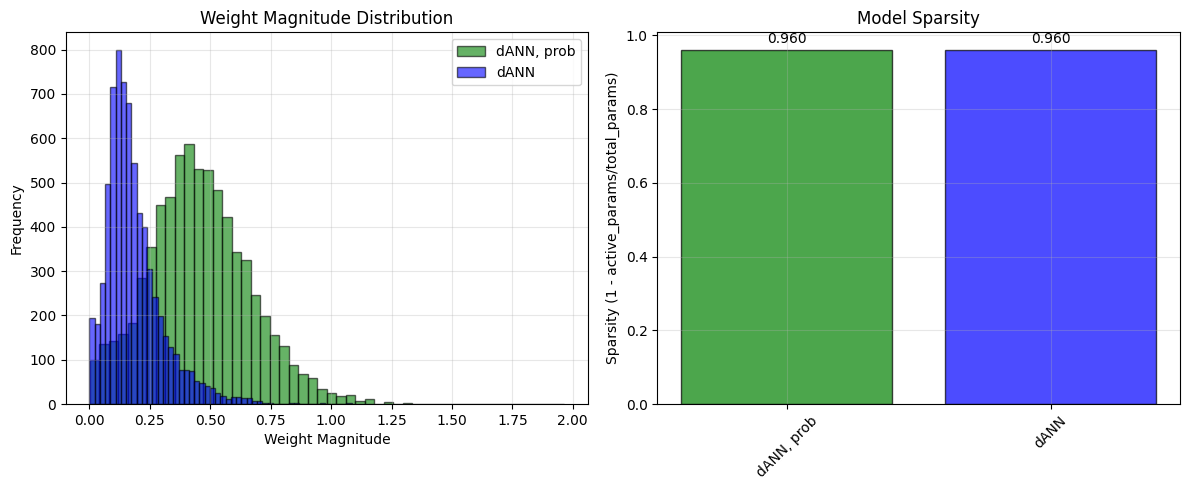


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.4377       0.4670       84.4       % 83.3       %
dANN                 0.3047       0.3678       88.8       % 87.0       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 12  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.1,
            steepness=0.1,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=0.001, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 255.28it/s, Epoch=1/6, Batch=179/235, Loss=0.5158]

num of dendrite successful swaps: 3901


Training :  21%|██▏       | 303/1410 [00:01<00:04, 236.19it/s, Epoch=2/6, Batch=70/235, Loss=0.5574] 

num of dendrite successful swaps: 2528


Training :  31%|███       | 436/1410 [00:01<00:03, 257.23it/s, Epoch=2/6, Batch=202/235, Loss=0.5191]

num of dendrite successful swaps: 1792


Training :  40%|███▉      | 563/1410 [00:02<00:03, 249.13it/s, Epoch=3/6, Batch=96/235, Loss=0.4473] 

num of dendrite successful swaps: 1451


Training :  49%|████▉     | 690/1410 [00:02<00:02, 260.09it/s, Epoch=3/6, Batch=223/235, Loss=0.3888]

num of dendrite successful swaps: 1282


Training :  58%|█████▊    | 819/1410 [00:03<00:02, 252.10it/s, Epoch=4/6, Batch=118/235, Loss=0.4440]

num of dendrite successful swaps: 1044


Training :  67%|██████▋   | 939/1410 [00:03<00:01, 259.87it/s, Epoch=5/6, Batch=4/235, Loss=0.3561]  

num of dendrite successful swaps: 971


Training :  76%|███████▌  | 1073/1410 [00:04<00:01, 253.80it/s, Epoch=5/6, Batch=138/235, Loss=0.4180]

num of dendrite successful swaps: 874


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 238.52it/s, Epoch=6/6, Batch=25/235, Loss=0.4142] 

num of dendrite successful swaps: 831


Training :  94%|█████████▍| 1328/1410 [00:05<00:00, 254.60it/s, Epoch=6/6, Batch=159/235, Loss=0.3721]

num of dendrite successful swaps: 771


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 248.96it/s, Epoch=6/6, Batch=234/235, Loss=0.4598]


Number of mask updates: 11
Train loss dANN, prob model: 0.4215
Train accuracy dANN, prob model: 84.9%
Test accuracy dANN, prob model: 84.0%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 250.33it/s, Epoch=6/6, Batch=234/235, Loss=0.3377]


Number of mask updates: 11
Train loss dANN model: 0.3562
Train accuracy dANN model: 86.9%
Test accuracy dANN model: 86.1%


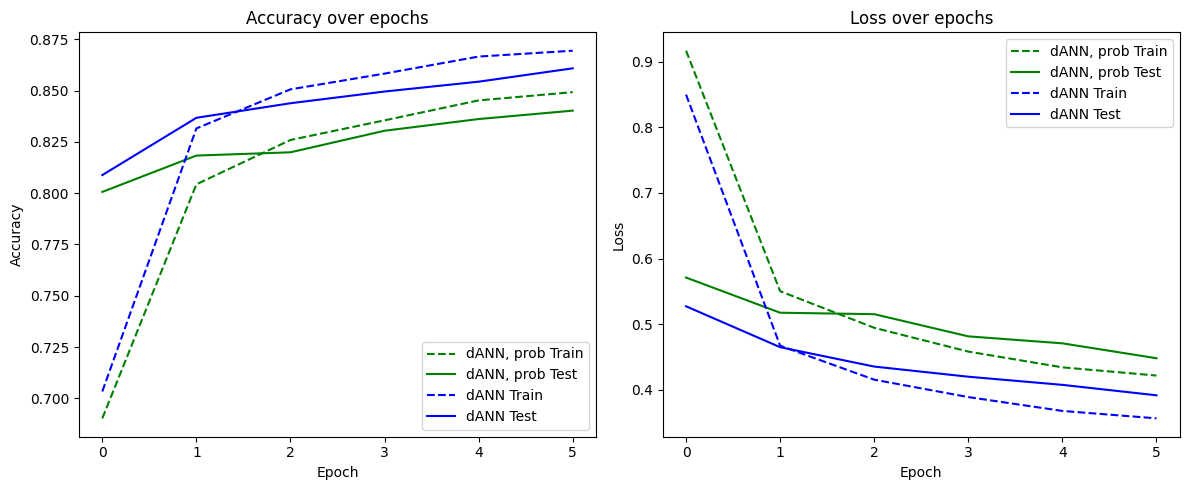

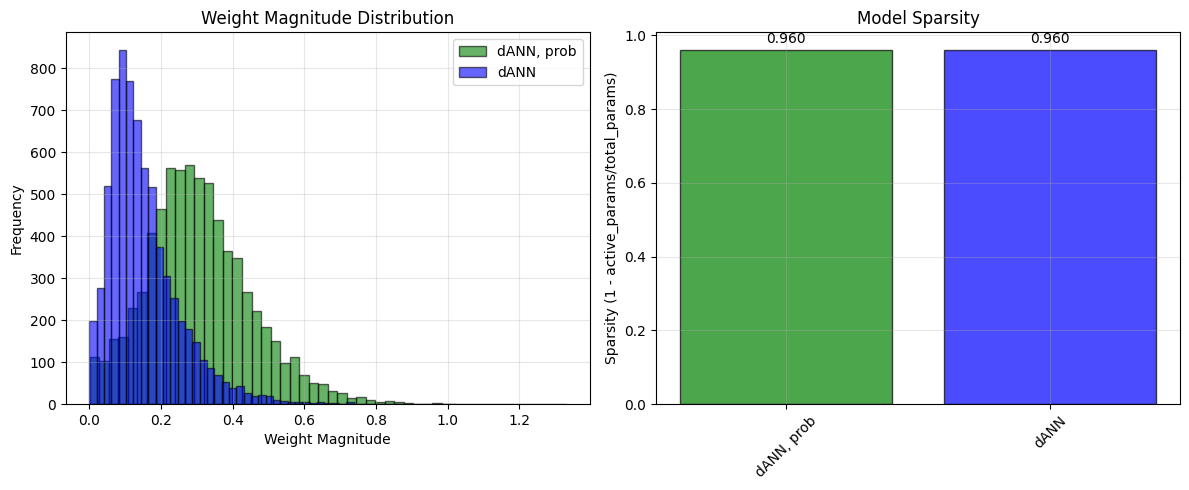


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.4215       0.4479       84.9       % 84.0       %
dANN                 0.3562       0.3913       86.9       % 86.1       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.1,
            steepness=0.05,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  40%|███▉      | 562/1410 [00:02<00:03, 252.74it/s, Epoch=3/6, Batch=95/235, Loss=0.4899] 

num of dendrite successful swaps: 3435


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 253.14it/s, Epoch=5/6, Batch=139/235, Loss=0.3345]

num of dendrite successful swaps: 2303


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 251.22it/s, Epoch=6/6, Batch=234/235, Loss=0.3811]


Number of mask updates: 3
Train loss dANN, prob model: 0.3903
Train accuracy dANN, prob model: 86.0%
Test accuracy dANN, prob model: 84.9%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 242.66it/s, Epoch=6/6, Batch=234/235, Loss=0.2957]


Number of mask updates: 11
Train loss dANN model: 0.3557
Train accuracy dANN model: 87.0%
Test accuracy dANN model: 86.1%


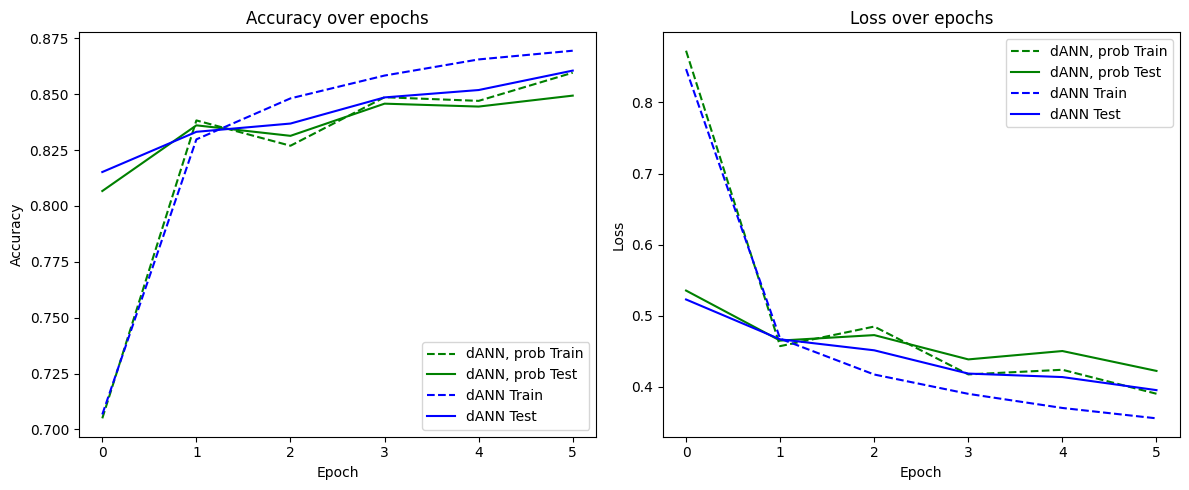

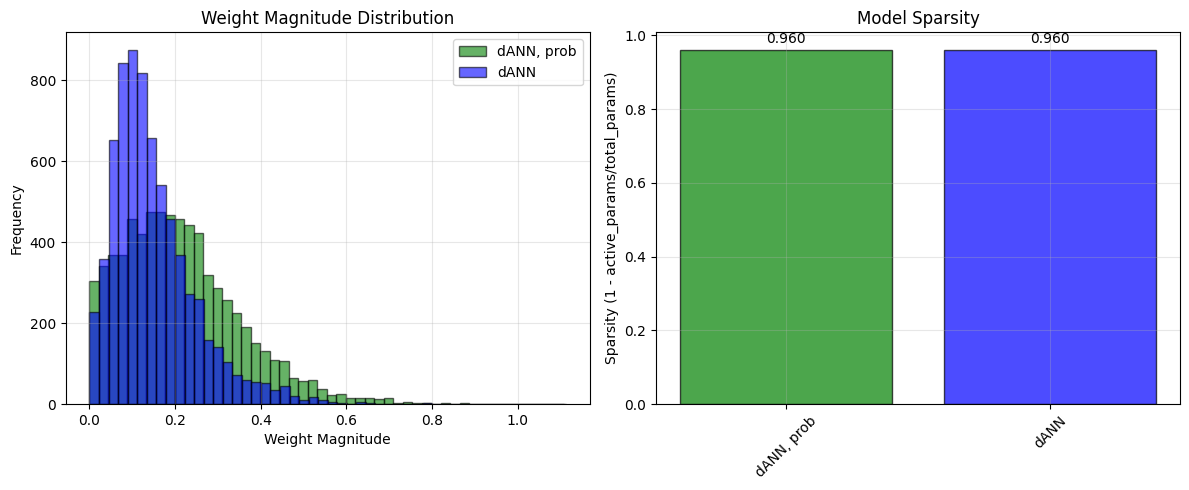


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3903       0.4224       86.0       % 84.9       %
dANN                 0.3557       0.3954       87.0       % 86.1       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=512,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.1,
            steepness=0.05,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  40%|███▉      | 562/1410 [00:02<00:03, 246.69it/s, Epoch=3/6, Batch=95/235, Loss=0.4417] 

num of dendrite successful swaps: 3654


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 247.20it/s, Epoch=5/6, Batch=139/235, Loss=0.3905]

num of dendrite successful swaps: 2316


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 242.68it/s, Epoch=6/6, Batch=234/235, Loss=0.3518]


Number of mask updates: 3
Train loss dANN, prob model: 0.3779
Train accuracy dANN, prob model: 86.3%
Test accuracy dANN, prob model: 85.1%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 252.02it/s, Epoch=6/6, Batch=234/235, Loss=0.3625]


Number of mask updates: 11
Train loss dANN model: 0.3554
Train accuracy dANN model: 86.9%
Test accuracy dANN model: 85.9%


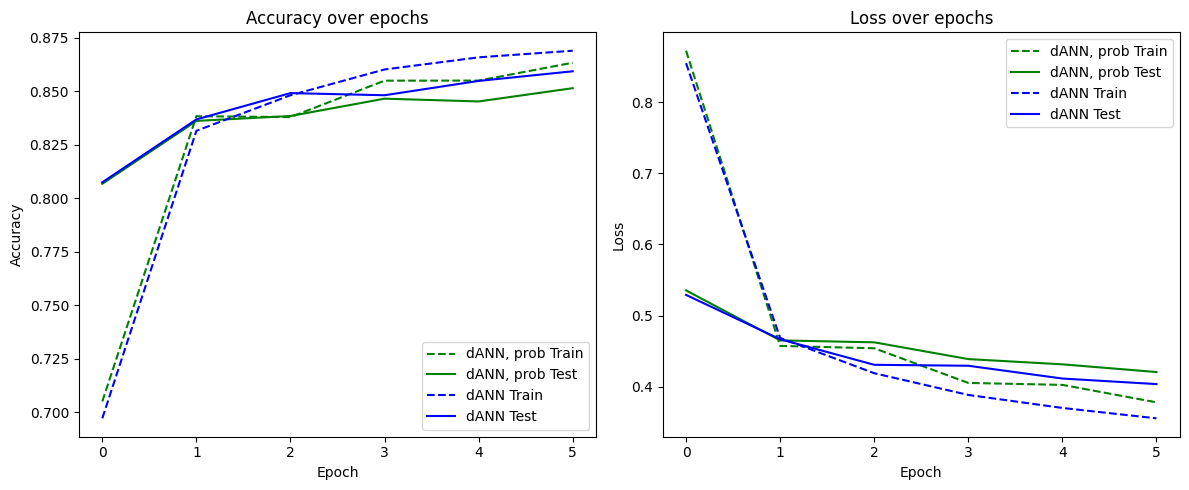

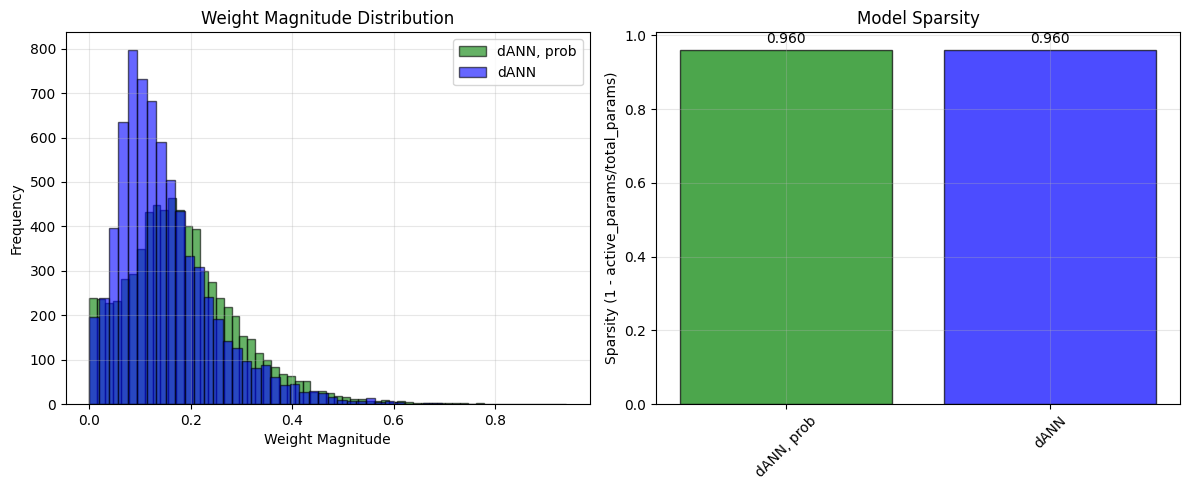


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3779       0.4205       86.3       % 85.1       %
dANN                 0.3554       0.4036       86.9       % 85.9       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=512,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.1,
            steepness=0.02,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  40%|███▉      | 560/1410 [00:02<00:03, 237.01it/s, Epoch=3/6, Batch=93/235, Loss=0.3579] 

num of dendrite successful swaps: 3654


Training :  76%|███████▌  | 1073/1410 [00:04<00:01, 253.04it/s, Epoch=5/6, Batch=138/235, Loss=0.4613]

num of dendrite successful swaps: 2316


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 247.01it/s, Epoch=6/6, Batch=234/235, Loss=0.3518]


Number of mask updates: 3
Train loss dANN, prob model: 0.3779
Train accuracy dANN, prob model: 86.3%
Test accuracy dANN, prob model: 85.1%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 246.95it/s, Epoch=6/6, Batch=234/235, Loss=0.2886]


Number of mask updates: 1
Train loss dANN model: 0.3664
Train accuracy dANN model: 86.7%
Test accuracy dANN model: 85.7%


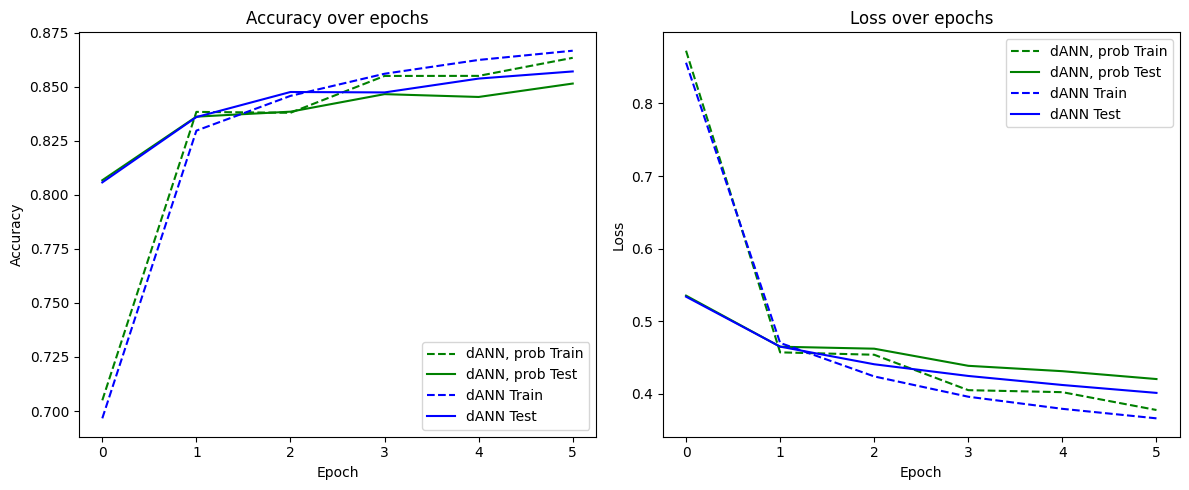

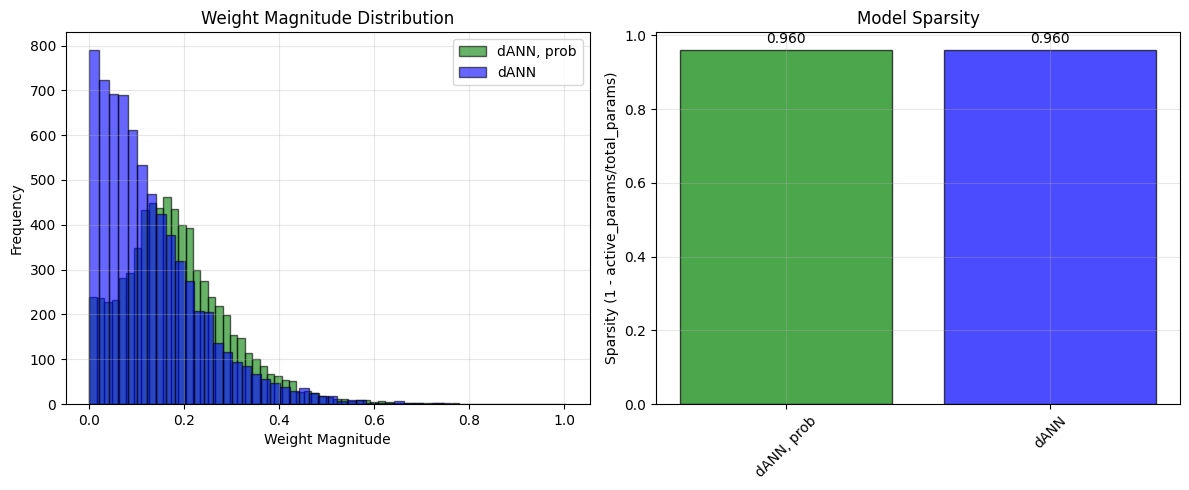


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3779       0.4205       86.3       % 85.1       %
dANN                 0.3664       0.4015       86.7       % 85.7       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=512,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.1,
            steepness=0.02,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Restarted .venv (Python 3.12.9)

Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  37%|███▋      | 526/1410 [00:02<00:05, 174.74it/s, Epoch=3/6, Batch=59/235, Loss=0.4519] 

num of dendrite successful swaps: 3654


Training :  76%|███████▋  | 1076/1410 [00:04<00:01, 250.43it/s, Epoch=5/6, Batch=141/235, Loss=0.3781]

num of dendrite successful swaps: 2745


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 240.87it/s, Epoch=6/6, Batch=234/235, Loss=0.4432]


Number of mask updates: 3
Train loss dANN, prob model: 0.3583
Train accuracy dANN, prob model: 86.9%
Test accuracy dANN, prob model: 85.6%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 254.01it/s, Epoch=6/6, Batch=234/235, Loss=0.4273]


Number of mask updates: 1
Train loss dANN model: 0.3655
Train accuracy dANN model: 86.7%
Test accuracy dANN model: 84.5%


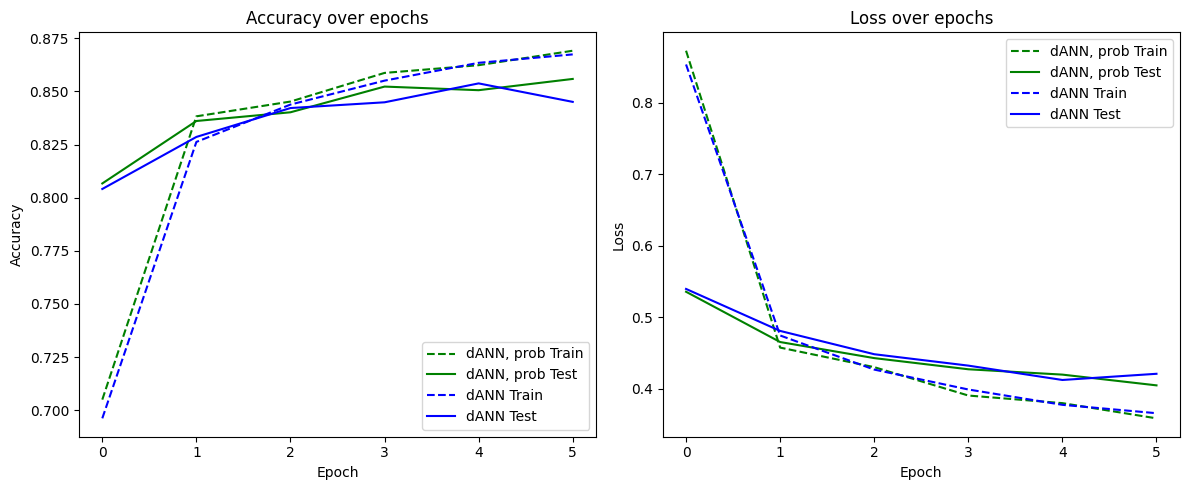

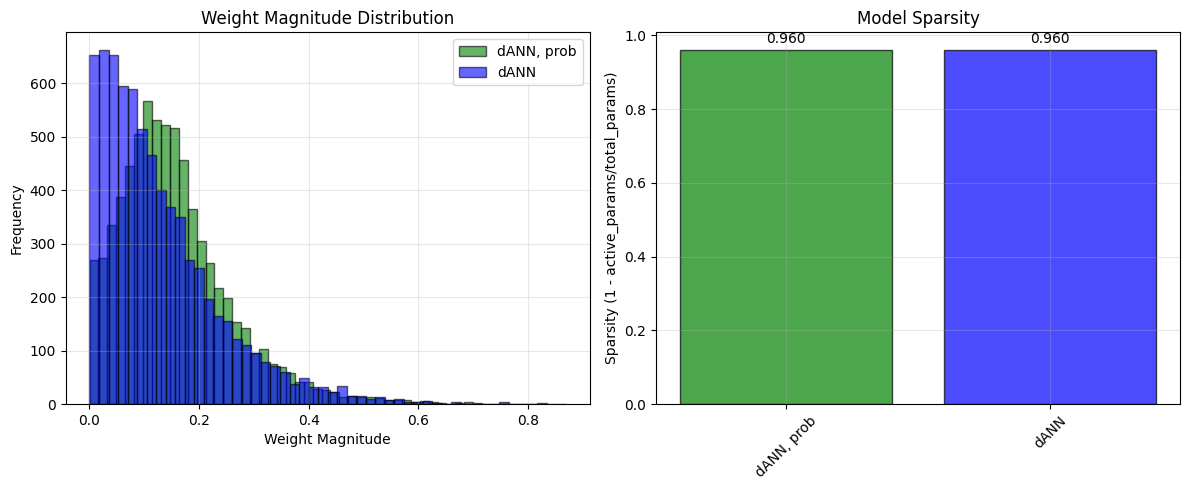


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3583       0.4045       86.9       % 85.6       %
dANN                 0.3655       0.4206       86.7       % 84.5       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=512,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.1,
            steepness=0.02,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 177/1410 [00:00<00:04, 255.18it/s, Epoch=1/6, Batch=178/235, Loss=0.7510]

num of dendrite successful swaps: 5629


Training :  22%|██▏       | 306/1410 [00:01<00:04, 242.10it/s, Epoch=2/6, Batch=73/235, Loss=0.5518] 

num of dendrite successful swaps: 3467


Training :  31%|███       | 435/1410 [00:01<00:03, 257.95it/s, Epoch=2/6, Batch=202/235, Loss=0.4734]

num of dendrite successful swaps: 2662


Training :  40%|███▉      | 563/1410 [00:02<00:03, 254.08it/s, Epoch=3/6, Batch=96/235, Loss=0.3650] 

num of dendrite successful swaps: 2275


Training :  49%|████▉     | 690/1410 [00:02<00:02, 260.51it/s, Epoch=3/6, Batch=223/235, Loss=0.4515]

num of dendrite successful swaps: 2012


Training :  58%|█████▊    | 819/1410 [00:03<00:02, 257.00it/s, Epoch=4/6, Batch=118/235, Loss=0.4359]

num of dendrite successful swaps: 1954


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 260.06it/s, Epoch=5/6, Batch=3/235, Loss=0.3832]  

num of dendrite successful swaps: 1792


Training :  76%|███████▌  | 1075/1410 [00:04<00:01, 255.22it/s, Epoch=5/6, Batch=140/235, Loss=0.3635]

num of dendrite successful swaps: 1692


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 238.01it/s, Epoch=6/6, Batch=25/235, Loss=0.4430] 

num of dendrite successful swaps: 1541


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 255.41it/s, Epoch=6/6, Batch=161/235, Loss=0.4406]

num of dendrite successful swaps: 1521


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 251.31it/s, Epoch=6/6, Batch=234/235, Loss=0.3257]


Number of mask updates: 11
Train loss dANN, prob model: 0.3576
Train accuracy dANN, prob model: 86.9%
Test accuracy dANN, prob model: 85.9%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 251.24it/s, Epoch=6/6, Batch=234/235, Loss=0.3725]


Number of mask updates: 1
Train loss dANN model: 0.3628
Train accuracy dANN model: 86.8%
Test accuracy dANN model: 85.8%


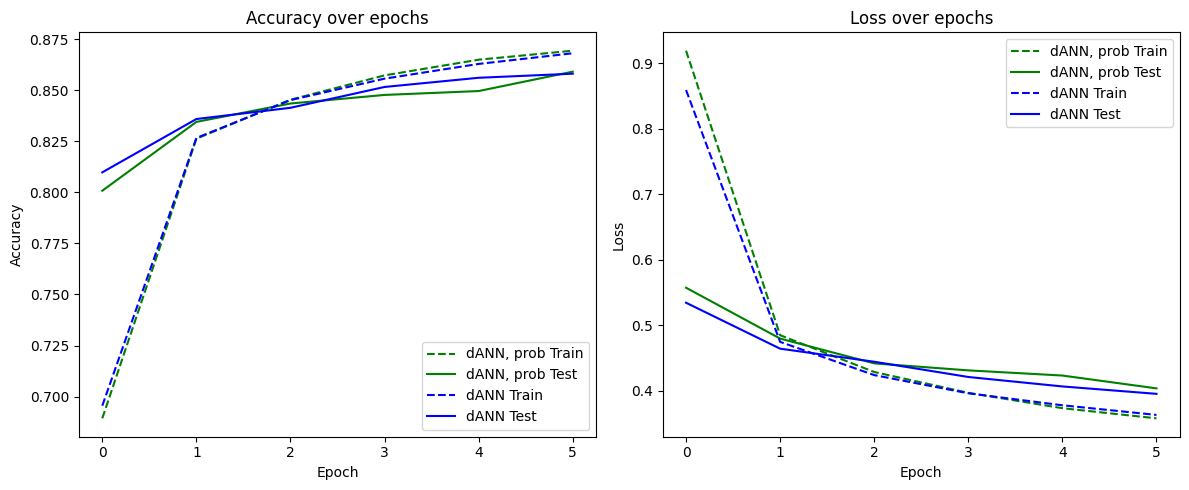

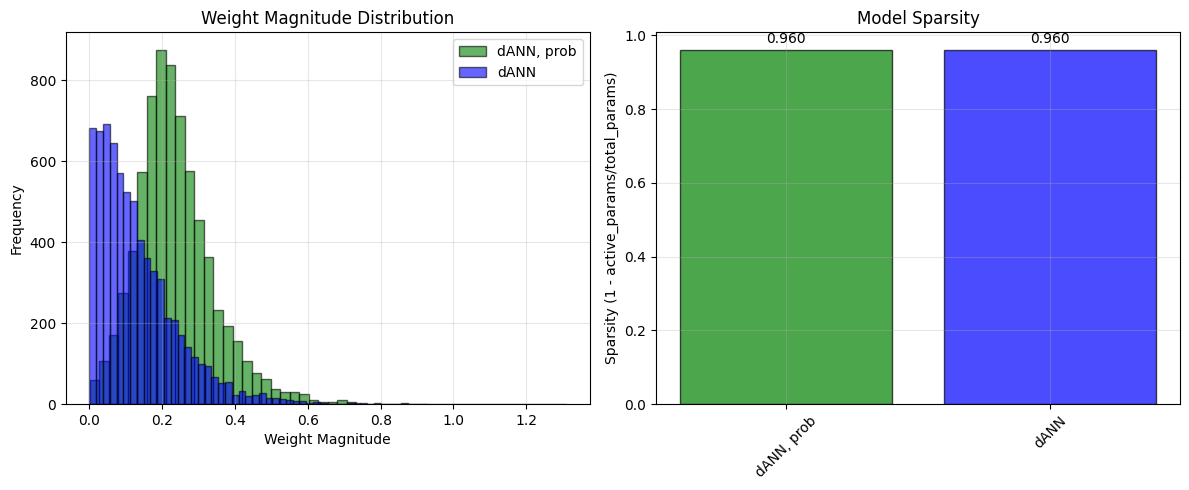


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3576       0.4033       86.9       % 85.9       %
dANN                 0.3628       0.3950       86.8       % 85.8       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.15,
            steepness=0.02,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 253.30it/s, Epoch=1/6, Batch=179/235, Loss=0.5214]

num of dendrite successful swaps: 5749


Training :  22%|██▏       | 305/1410 [00:01<00:04, 244.82it/s, Epoch=2/6, Batch=72/235, Loss=0.4289] 

num of dendrite successful swaps: 3414


Training :  30%|███       | 430/1410 [00:01<00:04, 240.14it/s, Epoch=2/6, Batch=196/235, Loss=0.4872]

num of dendrite successful swaps: 2459


Training :  40%|███▉      | 563/1410 [00:02<00:03, 250.08it/s, Epoch=3/6, Batch=96/235, Loss=0.3719] 

num of dendrite successful swaps: 2065


Training :  49%|████▉     | 691/1410 [00:02<00:02, 259.08it/s, Epoch=3/6, Batch=224/235, Loss=0.4856]

num of dendrite successful swaps: 1793


Training :  58%|█████▊    | 815/1410 [00:03<00:02, 243.54it/s, Epoch=4/6, Batch=114/235, Loss=0.3733]

num of dendrite successful swaps: 1582


Training :  67%|██████▋   | 939/1410 [00:03<00:01, 253.84it/s, Epoch=5/6, Batch=4/235, Loss=0.3405]  

num of dendrite successful swaps: 1408


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 252.52it/s, Epoch=5/6, Batch=139/235, Loss=0.3272]

num of dendrite successful swaps: 1294


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 236.03it/s, Epoch=6/6, Batch=25/235, Loss=0.3977] 

num of dendrite successful swaps: 1168


Training :  94%|█████████▍| 1329/1410 [00:05<00:00, 250.29it/s, Epoch=6/6, Batch=160/235, Loss=0.3381]

num of dendrite successful swaps: 1120


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 245.58it/s, Epoch=6/6, Batch=234/235, Loss=0.3399]


Number of mask updates: 11
Train loss dANN, prob model: 0.3525
Train accuracy dANN, prob model: 87.0%
Test accuracy dANN, prob model: 85.7%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 245.30it/s, Epoch=6/6, Batch=234/235, Loss=0.3564]


Number of mask updates: 1
Train loss dANN model: 0.365
Train accuracy dANN model: 86.7%
Test accuracy dANN model: 85.7%


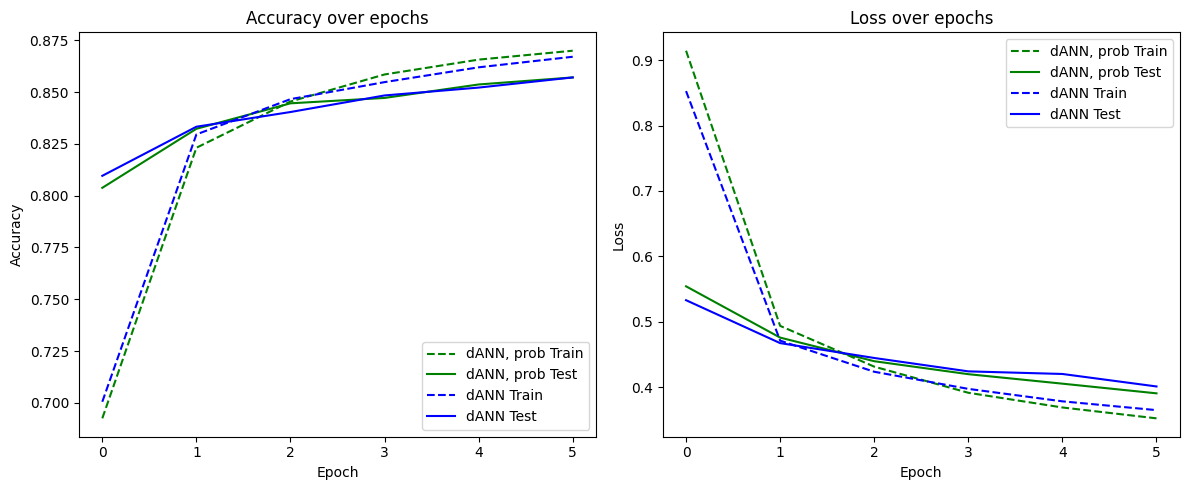

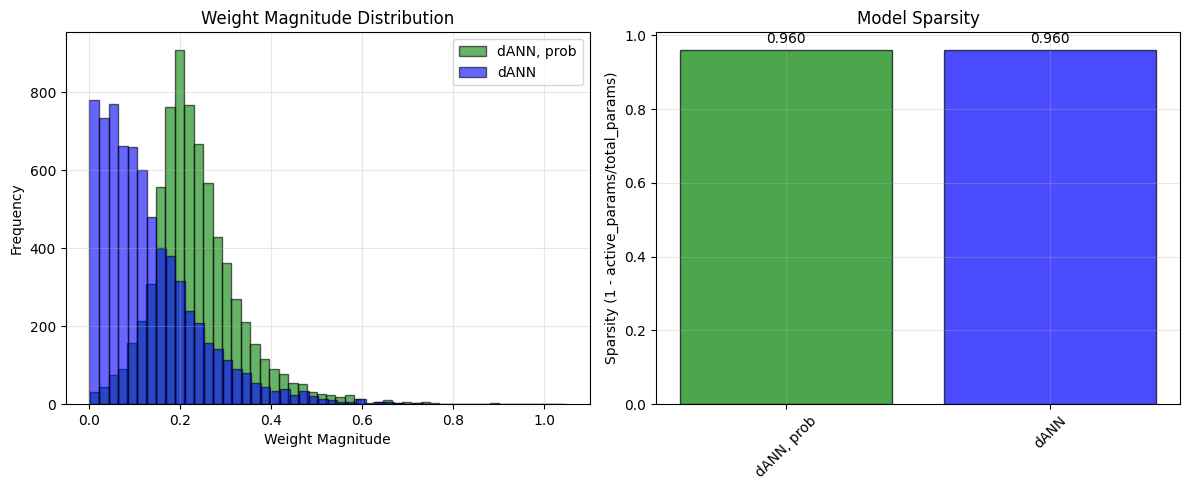


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3525       0.3907       87.0       % 85.7       %
dANN                 0.3650       0.4012       86.7       % 85.7       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.15,
            steepness=0.01,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   8%|▊         | 114/1410 [00:00<00:05, 246.84it/s, Epoch=1/6, Batch=115/235, Loss=0.6161]

num of dendrite successful swaps: 3918


Training :  12%|█▏        | 176/1410 [00:00<00:04, 251.36it/s, Epoch=1/6, Batch=177/235, Loss=0.5781]

num of dendrite successful swaps: 3268


Training :  17%|█▋        | 234/1410 [00:00<00:04, 254.00it/s, Epoch=2/6, Batch=1/235, Loss=0.5589]  

num of dendrite successful swaps: 2973


Training :  22%|██▏       | 306/1410 [00:01<00:04, 238.74it/s, Epoch=2/6, Batch=73/235, Loss=0.4647]

num of dendrite successful swaps: 2809


Training :  26%|██▌       | 370/1410 [00:01<00:04, 249.91it/s, Epoch=2/6, Batch=137/235, Loss=0.4362]

num of dendrite successful swaps: 2700


Training :  31%|███       | 434/1410 [00:01<00:03, 254.12it/s, Epoch=2/6, Batch=201/235, Loss=0.5606]

num of dendrite successful swaps: 2540


Training :  35%|███▍      | 491/1410 [00:02<00:03, 234.21it/s, Epoch=3/6, Batch=23/235, Loss=0.4265] 

num of dendrite successful swaps: 2605


Training :  40%|███▉      | 562/1410 [00:02<00:03, 245.45it/s, Epoch=3/6, Batch=95/235, Loss=0.5997]

num of dendrite successful swaps: 2554


Training :  44%|████▍     | 626/1410 [00:02<00:03, 254.05it/s, Epoch=3/6, Batch=159/235, Loss=0.5529]

num of dendrite successful swaps: 2493


Training :  49%|████▉     | 690/1410 [00:02<00:02, 255.37it/s, Epoch=3/6, Batch=223/235, Loss=0.3711]

num of dendrite successful swaps: 2500


Training :  53%|█████▎    | 754/1410 [00:03<00:02, 243.81it/s, Epoch=4/6, Batch=53/235, Loss=0.4613] 

num of dendrite successful swaps: 2449


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 251.47it/s, Epoch=4/6, Batch=117/235, Loss=0.3990]

num of dendrite successful swaps: 2399


Training :  63%|██████▎   | 882/1410 [00:03<00:02, 254.49it/s, Epoch=4/6, Batch=181/235, Loss=0.3649]

num of dendrite successful swaps: 2398


Training :  67%|██████▋   | 938/1410 [00:03<00:02, 234.92it/s, Epoch=5/6, Batch=2/235, Loss=0.3908]  

num of dendrite successful swaps: 2369


Training :  71%|███████▏  | 1006/1410 [00:04<00:01, 235.93it/s, Epoch=5/6, Batch=71/235, Loss=0.3936]

num of dendrite successful swaps: 2352


Training :  76%|███████▌  | 1072/1410 [00:04<00:01, 243.54it/s, Epoch=5/6, Batch=137/235, Loss=0.3483]

num of dendrite successful swaps: 2375


Training :  81%|████████  | 1137/1410 [00:04<00:01, 251.62it/s, Epoch=5/6, Batch=202/235, Loss=0.3845]

num of dendrite successful swaps: 2375


Training :  85%|████████▍ | 1193/1410 [00:04<00:00, 231.39it/s, Epoch=6/6, Batch=24/235, Loss=0.4085] 

num of dendrite successful swaps: 2354


Training :  90%|████████▉ | 1266/1410 [00:05<00:00, 244.40it/s, Epoch=6/6, Batch=97/235, Loss=0.3701]

num of dendrite successful swaps: 2322


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 252.45it/s, Epoch=6/6, Batch=161/235, Loss=0.3915]

num of dendrite successful swaps: 2344


Training :  99%|█████████▉| 1393/1410 [00:05<00:00, 253.30it/s, Epoch=6/6, Batch=224/235, Loss=0.3705]

num of dendrite successful swaps: 2352


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 245.61it/s, Epoch=6/6, Batch=234/235, Loss=0.3460]


Number of mask updates: 22
Train loss dANN, prob model: 0.412
Train accuracy dANN, prob model: 84.9%
Test accuracy dANN, prob model: 84.1%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 251.97it/s, Epoch=6/6, Batch=234/235, Loss=0.3501]


Number of mask updates: 1
Train loss dANN model: 0.3656
Train accuracy dANN model: 86.7%
Test accuracy dANN model: 85.4%


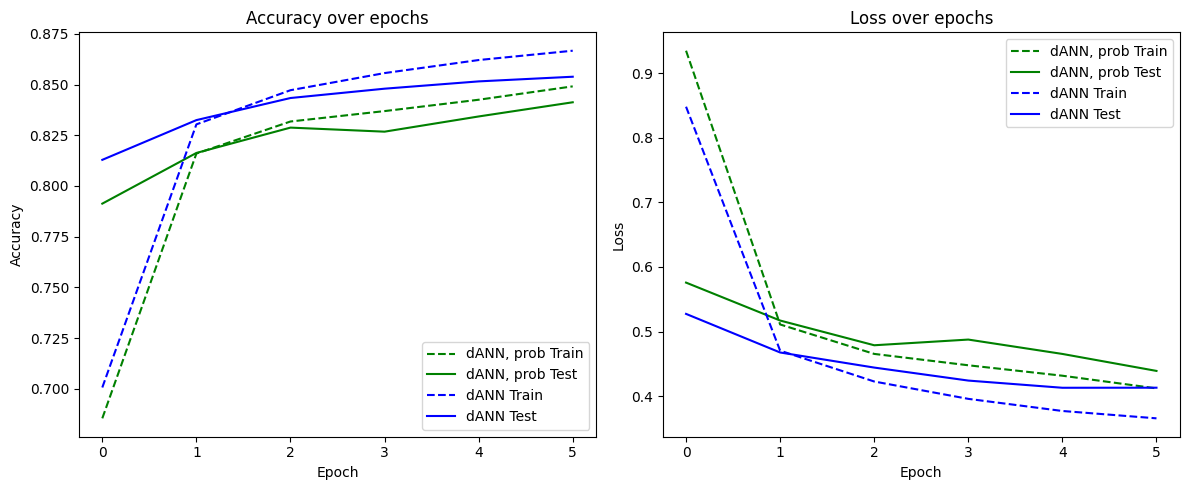

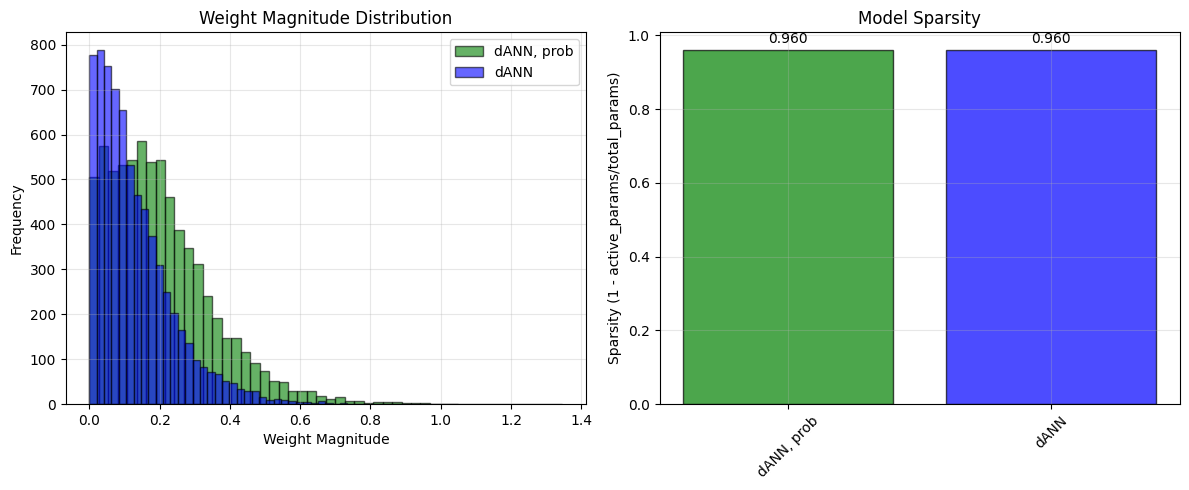


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.4120       0.4390       84.9       % 84.1       %
dANN                 0.3656       0.4130       86.7       % 85.4       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=64,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.1,
            steepness=0.1,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=64,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.1,
            steepness=0.3,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   8%|▊         | 112/1410 [00:00<00:05, 245.60it/s, Epoch=1/6, Batch=113/235, Loss=0.8470]

num of dendrite successful swaps: 3586


Training :  13%|█▎        | 178/1410 [00:00<00:04, 251.84it/s, Epoch=1/6, Batch=179/235, Loss=0.6187]

num of dendrite successful swaps: 3084


Training :  17%|█▋        | 234/1410 [00:00<00:04, 255.74it/s, Epoch=2/6, Batch=1/235, Loss=0.6215]  

num of dendrite successful swaps: 2734


Training :  22%|██▏       | 305/1410 [00:01<00:04, 244.21it/s, Epoch=2/6, Batch=72/235, Loss=0.5386]

num of dendrite successful swaps: 2637


Training :  26%|██▌       | 367/1410 [00:01<00:04, 245.82it/s, Epoch=2/6, Batch=134/235, Loss=0.5374]

num of dendrite successful swaps: 2478


Training :  31%|███       | 434/1410 [00:01<00:03, 251.96it/s, Epoch=2/6, Batch=201/235, Loss=0.5276]

num of dendrite successful swaps: 2448


Training :  35%|███▍      | 488/1410 [00:02<00:04, 229.38it/s, Epoch=3/6, Batch=21/235, Loss=0.4182] 

num of dendrite successful swaps: 2376


Training :  40%|███▉      | 562/1410 [00:02<00:03, 244.07it/s, Epoch=3/6, Batch=95/235, Loss=0.3874]

num of dendrite successful swaps: 2303


Training :  44%|████▍     | 626/1410 [00:02<00:03, 251.01it/s, Epoch=3/6, Batch=159/235, Loss=0.5320]

num of dendrite successful swaps: 2326


Training :  49%|████▉     | 689/1410 [00:02<00:02, 252.73it/s, Epoch=3/6, Batch=222/235, Loss=0.4911]

num of dendrite successful swaps: 2253


Training :  53%|█████▎    | 753/1410 [00:03<00:02, 239.52it/s, Epoch=4/6, Batch=52/235, Loss=0.5679] 

num of dendrite successful swaps: 2211


Training :  58%|█████▊    | 817/1410 [00:03<00:02, 247.83it/s, Epoch=4/6, Batch=116/235, Loss=0.5505]

num of dendrite successful swaps: 2257


Training :  62%|██████▏   | 881/1410 [00:03<00:02, 254.31it/s, Epoch=4/6, Batch=180/235, Loss=0.4846]

num of dendrite successful swaps: 2234


Training :  66%|██████▋   | 937/1410 [00:03<00:01, 252.58it/s, Epoch=5/6, Batch=2/235, Loss=0.4538]  

num of dendrite successful swaps: 2230


Training :  72%|███████▏  | 1010/1410 [00:04<00:01, 245.46it/s, Epoch=5/6, Batch=75/235, Loss=0.4788]

num of dendrite successful swaps: 2187


Training :  76%|███████▌  | 1072/1410 [00:04<00:01, 245.91it/s, Epoch=5/6, Batch=137/235, Loss=0.4754]

num of dendrite successful swaps: 2279


Training :  81%|████████  | 1138/1410 [00:04<00:01, 252.89it/s, Epoch=5/6, Batch=203/235, Loss=0.3880]

num of dendrite successful swaps: 2211


Training :  85%|████████▍ | 1193/1410 [00:04<00:00, 233.02it/s, Epoch=6/6, Batch=24/235, Loss=0.4743] 

num of dendrite successful swaps: 2171


Training :  90%|████████▉ | 1264/1410 [00:05<00:00, 242.65it/s, Epoch=6/6, Batch=95/235, Loss=0.5210]

num of dendrite successful swaps: 2136


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 249.42it/s, Epoch=6/6, Batch=161/235, Loss=0.4555]

num of dendrite successful swaps: 2186


Training :  99%|█████████▉| 1394/1410 [00:05<00:00, 253.40it/s, Epoch=6/6, Batch=225/235, Loss=0.5132]

num of dendrite successful swaps: 2135


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 244.54it/s, Epoch=6/6, Batch=234/235, Loss=0.5112]


Number of mask updates: 22
Train loss dANN, prob model: 0.4996
Train accuracy dANN, prob model: 81.7%
Test accuracy dANN, prob model: 82.1%

Training dANN model...


Training :  51%|█████     | 716/1410 [00:02<00:02, 241.64it/s, Epoch=4/6, Batch=14/235, Loss=0.4497] 


KeyboardInterrupt: 

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   8%|▊         | 114/1410 [00:00<00:05, 246.22it/s, Epoch=1/6, Batch=115/235, Loss=0.6535]

num of dendrite successful swaps: 6309


Training :  13%|█▎        | 178/1410 [00:00<00:04, 255.18it/s, Epoch=1/6, Batch=179/235, Loss=0.5099]

num of dendrite successful swaps: 3607


Training :  17%|█▋        | 234/1410 [00:00<00:04, 256.39it/s, Epoch=2/6, Batch=1/235, Loss=0.5242]  

num of dendrite successful swaps: 2412


Training :  22%|██▏       | 308/1410 [00:01<00:04, 249.17it/s, Epoch=2/6, Batch=74/235, Loss=0.4780]

num of dendrite successful swaps: 1898


Training :  26%|██▌       | 369/1410 [00:01<00:04, 252.55it/s, Epoch=2/6, Batch=136/235, Loss=0.4528]

num of dendrite successful swaps: 1655


Training :  31%|███       | 433/1410 [00:01<00:03, 252.25it/s, Epoch=2/6, Batch=200/235, Loss=0.4678]

num of dendrite successful swaps: 1478


Training :  35%|███▍      | 487/1410 [00:02<00:03, 246.44it/s, Epoch=3/6, Batch=20/235, Loss=0.4930] 

num of dendrite successful swaps: 1410


Training :  40%|███▉      | 562/1410 [00:02<00:03, 239.51it/s, Epoch=3/6, Batch=95/235, Loss=0.5011]

num of dendrite successful swaps: 1316


Training :  44%|████▍     | 626/1410 [00:02<00:03, 251.89it/s, Epoch=3/6, Batch=159/235, Loss=0.4875]

num of dendrite successful swaps: 1200


Training :  49%|████▉     | 689/1410 [00:02<00:02, 253.09it/s, Epoch=3/6, Batch=222/235, Loss=0.4611]

num of dendrite successful swaps: 1085


Training :  53%|█████▎    | 753/1410 [00:03<00:02, 239.46it/s, Epoch=4/6, Batch=52/235, Loss=0.3903] 

num of dendrite successful swaps: 977


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 248.03it/s, Epoch=4/6, Batch=117/235, Loss=0.3532]

num of dendrite successful swaps: 929


Training :  63%|██████▎   | 882/1410 [00:03<00:02, 254.35it/s, Epoch=4/6, Batch=181/235, Loss=0.4238]

num of dendrite successful swaps: 895


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 255.85it/s, Epoch=5/6, Batch=3/235, Loss=0.3495]  

num of dendrite successful swaps: 884


Training :  72%|███████▏  | 1009/1410 [00:04<00:01, 238.68it/s, Epoch=5/6, Batch=74/235, Loss=0.3827]

num of dendrite successful swaps: 824


Training :  76%|███████▌  | 1073/1410 [00:04<00:01, 249.94it/s, Epoch=5/6, Batch=138/235, Loss=0.3983]

num of dendrite successful swaps: 831


Training :  81%|████████  | 1137/1410 [00:04<00:01, 251.16it/s, Epoch=5/6, Batch=202/235, Loss=0.3955]

num of dendrite successful swaps: 806


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 252.75it/s, Epoch=6/6, Batch=25/235, Loss=0.2479] 

num of dendrite successful swaps: 784


Training :  90%|████████▉ | 1266/1410 [00:05<00:00, 243.30it/s, Epoch=6/6, Batch=97/235, Loss=0.2892]

num of dendrite successful swaps: 742


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 252.11it/s, Epoch=6/6, Batch=161/235, Loss=0.3857]

num of dendrite successful swaps: 715


Training :  99%|█████████▉| 1393/1410 [00:05<00:00, 253.09it/s, Epoch=6/6, Batch=224/235, Loss=0.3629]

num of dendrite successful swaps: 650


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 245.65it/s, Epoch=6/6, Batch=234/235, Loss=0.3199]


Number of mask updates: 22
Train loss dANN, prob model: 0.351
Train accuracy dANN, prob model: 87.3%
Test accuracy dANN, prob model: 85.7%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 245.65it/s, Epoch=6/6, Batch=234/235, Loss=0.3380]


Number of mask updates: 1
Train loss dANN model: 0.3628
Train accuracy dANN model: 86.8%
Test accuracy dANN model: 85.6%


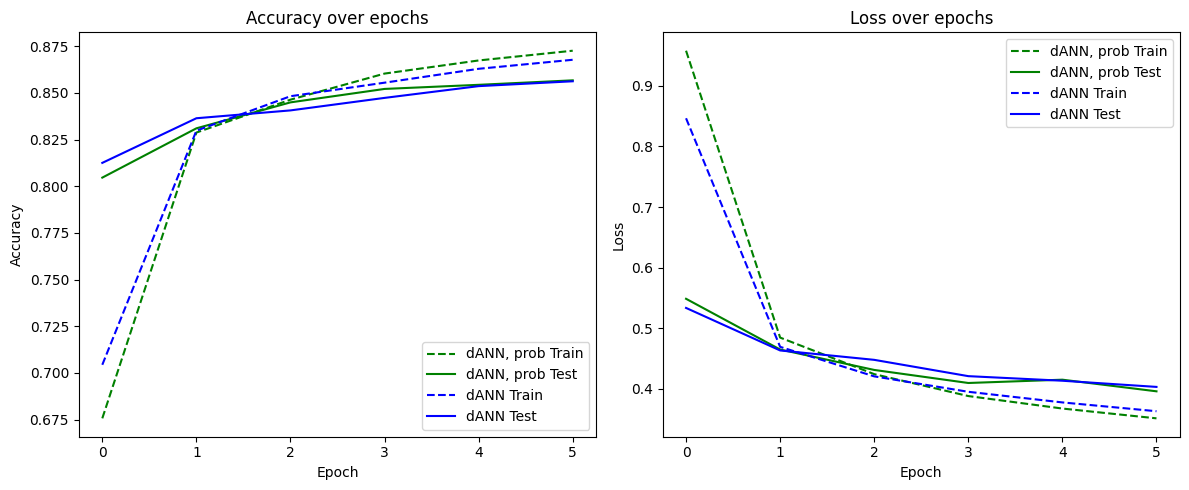

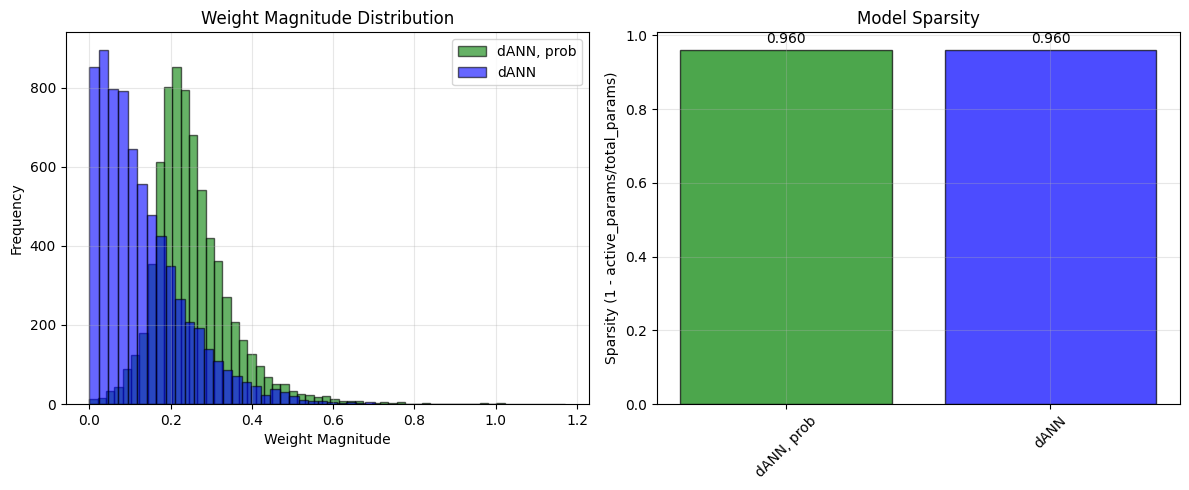


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3510       0.3956       87.3       % 85.7       %
dANN                 0.3628       0.4029       86.8       % 85.6       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=64,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.15,
            steepness=0.01,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=64,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.15,
            steepness=0.01,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   8%|▊         | 113/1410 [00:00<00:05, 241.07it/s, Epoch=1/6, Batch=114/235, Loss=0.6781]

num of dendrite successful swaps: 6309


Training :  12%|█▏        | 176/1410 [00:00<00:04, 248.96it/s, Epoch=1/6, Batch=177/235, Loss=0.6127]

num of dendrite successful swaps: 3607


Training :  17%|█▋        | 233/1410 [00:00<00:04, 244.54it/s, Epoch=1/6, Batch=234/235, Loss=0.5894]

num of dendrite successful swaps: 2412


Training :  22%|██▏       | 306/1410 [00:01<00:04, 240.65it/s, Epoch=2/6, Batch=73/235, Loss=0.5175] 

num of dendrite successful swaps: 1898


Training :  26%|██▌       | 365/1410 [00:01<00:04, 241.82it/s, Epoch=2/6, Batch=132/235, Loss=0.4925]

num of dendrite successful swaps: 1655


Training :  30%|███       | 427/1410 [00:01<00:04, 231.37it/s, Epoch=2/6, Batch=194/235, Loss=0.4381]

num of dendrite successful swaps: 1478


Training :  35%|███▍      | 490/1410 [00:02<00:04, 219.50it/s, Epoch=3/6, Batch=23/235, Loss=0.5000] 

num of dendrite successful swaps: 1410


Training :  40%|███▉      | 561/1410 [00:02<00:03, 244.25it/s, Epoch=3/6, Batch=94/235, Loss=0.4013]

num of dendrite successful swaps: 1316


Training :  44%|████▍     | 626/1410 [00:02<00:03, 248.97it/s, Epoch=3/6, Batch=159/235, Loss=0.4875]

num of dendrite successful swaps: 1200


Training :  49%|████▉     | 690/1410 [00:02<00:02, 255.28it/s, Epoch=3/6, Batch=223/235, Loss=0.3905]

num of dendrite successful swaps: 1085


Training :  53%|█████▎    | 754/1410 [00:03<00:02, 241.10it/s, Epoch=4/6, Batch=53/235, Loss=0.3455] 

num of dendrite successful swaps: 977


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 251.59it/s, Epoch=4/6, Batch=117/235, Loss=0.3532]

num of dendrite successful swaps: 929


Training :  62%|██████▏   | 881/1410 [00:03<00:02, 253.60it/s, Epoch=4/6, Batch=180/235, Loss=0.4158]

num of dendrite successful swaps: 895


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 255.13it/s, Epoch=5/6, Batch=3/235, Loss=0.3495]  

num of dendrite successful swaps: 884


Training :  72%|███████▏  | 1011/1410 [00:04<00:01, 247.83it/s, Epoch=5/6, Batch=76/235, Loss=0.3666]

num of dendrite successful swaps: 824


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 253.96it/s, Epoch=5/6, Batch=139/235, Loss=0.3317]

num of dendrite successful swaps: 831


Training :  81%|████████  | 1137/1410 [00:04<00:01, 254.97it/s, Epoch=5/6, Batch=202/235, Loss=0.3955]

num of dendrite successful swaps: 806


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 234.62it/s, Epoch=6/6, Batch=25/235, Loss=0.2479] 

num of dendrite successful swaps: 784


Training :  90%|████████▉ | 1266/1410 [00:05<00:00, 250.74it/s, Epoch=6/6, Batch=97/235, Loss=0.2892]

num of dendrite successful swaps: 742


Training :  94%|█████████▍| 1329/1410 [00:05<00:00, 253.46it/s, Epoch=6/6, Batch=160/235, Loss=0.3656]

num of dendrite successful swaps: 715


Training :  99%|█████████▉| 1393/1410 [00:05<00:00, 253.79it/s, Epoch=6/6, Batch=224/235, Loss=0.3629]

num of dendrite successful swaps: 650


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 243.82it/s, Epoch=6/6, Batch=234/235, Loss=0.3199]


Number of mask updates: 22
Train loss dANN, prob model: 0.351
Train accuracy dANN, prob model: 87.3%
Test accuracy dANN, prob model: 85.7%

Training dANN model...


Training :  70%|███████   | 990/1410 [00:04<00:01, 245.98it/s, Epoch=5/6, Batch=54/235, Loss=0.3917] 


KeyboardInterrupt: 

In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=64,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.15,
            steepness=0.1,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

: 

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   8%|▊         | 112/1410 [00:00<00:05, 243.13it/s, Epoch=1/6, Batch=113/235, Loss=0.7984]

num of dendrite successful swaps: 4658


Training :  13%|█▎        | 178/1410 [00:00<00:04, 251.39it/s, Epoch=1/6, Batch=179/235, Loss=0.5334]

num of dendrite successful swaps: 3624


Training :  17%|█▋        | 233/1410 [00:00<00:04, 249.88it/s, Epoch=1/6, Batch=234/235, Loss=0.6010]

num of dendrite successful swaps: 3303


Training :  21%|██▏       | 302/1410 [00:01<00:04, 231.01it/s, Epoch=2/6, Batch=69/235, Loss=0.5268] 

num of dendrite successful swaps: 2955


Training :  26%|██▌       | 365/1410 [00:01<00:04, 226.80it/s, Epoch=2/6, Batch=132/235, Loss=0.5309]

num of dendrite successful swaps: 2885


Training :  31%|███       | 434/1410 [00:01<00:03, 246.43it/s, Epoch=2/6, Batch=201/235, Loss=0.5167]

num of dendrite successful swaps: 2785


Training :  35%|███▍      | 489/1410 [00:02<00:03, 230.64it/s, Epoch=3/6, Batch=22/235, Loss=0.4626] 

num of dendrite successful swaps: 2722


Training :  40%|███▉      | 562/1410 [00:02<00:03, 247.61it/s, Epoch=3/6, Batch=95/235, Loss=0.4035]

num of dendrite successful swaps: 2604


Training :  44%|████▍     | 626/1410 [00:02<00:03, 252.80it/s, Epoch=3/6, Batch=159/235, Loss=0.4636]

num of dendrite successful swaps: 2560


Training :  49%|████▉     | 689/1410 [00:02<00:02, 255.50it/s, Epoch=3/6, Batch=222/235, Loss=0.3819]

num of dendrite successful swaps: 2599


Training :  53%|█████▎    | 751/1410 [00:03<00:02, 235.15it/s, Epoch=4/6, Batch=50/235, Loss=0.4931] 

num of dendrite successful swaps: 2490


Training :  58%|█████▊    | 816/1410 [00:03<00:02, 243.37it/s, Epoch=4/6, Batch=115/235, Loss=0.4449]

num of dendrite successful swaps: 2456


Training :  62%|██████▏   | 881/1410 [00:03<00:02, 248.33it/s, Epoch=4/6, Batch=180/235, Loss=0.4057]

num of dendrite successful swaps: 2420


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 250.14it/s, Epoch=5/6, Batch=3/235, Loss=0.3478]  

num of dendrite successful swaps: 2388


Training :  72%|███████▏  | 1010/1410 [00:04<00:01, 244.37it/s, Epoch=5/6, Batch=75/235, Loss=0.4300]

num of dendrite successful swaps: 2407


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 254.29it/s, Epoch=5/6, Batch=139/235, Loss=0.4462]

num of dendrite successful swaps: 2414


Training :  81%|████████  | 1138/1410 [00:04<00:01, 257.17it/s, Epoch=5/6, Batch=203/235, Loss=0.4305]

num of dendrite successful swaps: 2436


Training :  85%|████████▍ | 1193/1410 [00:04<00:00, 235.37it/s, Epoch=6/6, Batch=24/235, Loss=0.5112] 

num of dendrite successful swaps: 2411


Training :  90%|████████▉ | 1265/1410 [00:05<00:00, 246.28it/s, Epoch=6/6, Batch=96/235, Loss=0.4261]

num of dendrite successful swaps: 2399


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 251.95it/s, Epoch=6/6, Batch=161/235, Loss=0.4726]

num of dendrite successful swaps: 2344


Training :  99%|█████████▉| 1393/1410 [00:05<00:00, 256.35it/s, Epoch=6/6, Batch=224/235, Loss=0.4042]

num of dendrite successful swaps: 2341


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 243.28it/s, Epoch=6/6, Batch=234/235, Loss=0.5526]


Number of mask updates: 22
Train loss dANN, prob model: 0.4288
Train accuracy dANN, prob model: 84.5%
Test accuracy dANN, prob model: 83.5%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 245.12it/s, Epoch=6/6, Batch=234/235, Loss=0.3983]


Number of mask updates: 1
Train loss dANN model: 0.3639
Train accuracy dANN model: 86.8%
Test accuracy dANN model: 85.8%


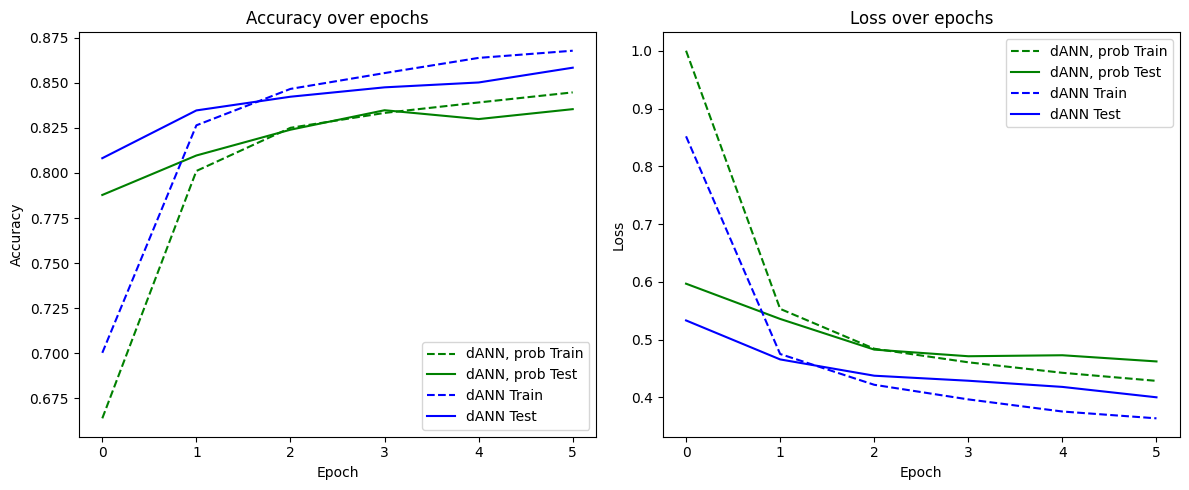

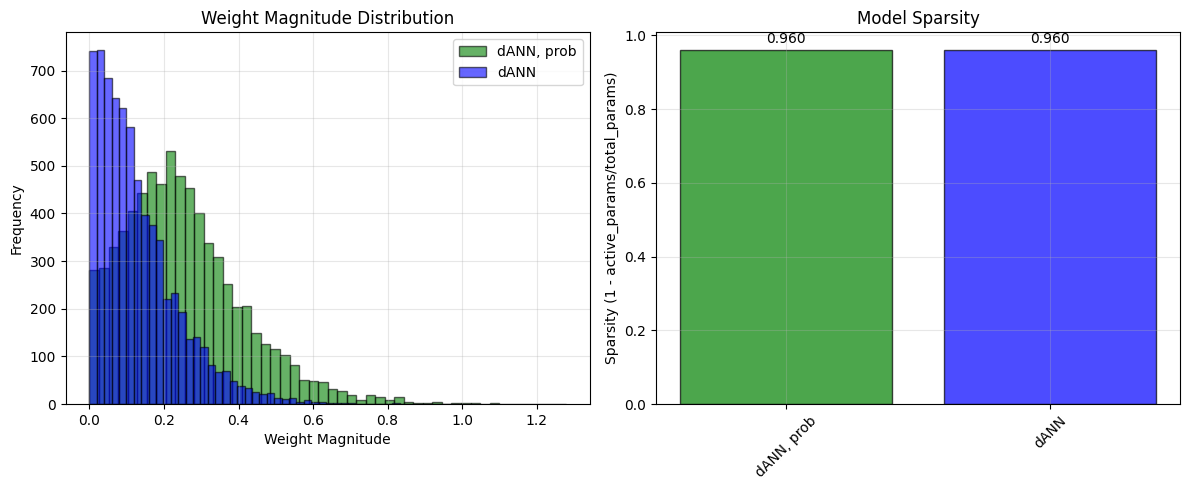


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.4288       0.4624       84.5       % 83.5       %
dANN                 0.3639       0.4003       86.8       % 85.8       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=64,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.15,
            steepness=0.1,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Restarted .venv (Python 3.12.9)

Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   8%|▊         | 109/1410 [00:00<00:05, 225.18it/s, Epoch=1/6, Batch=110/235, Loss=0.7538]

num of dendrite successful swaps: 4658


Training :  13%|█▎        | 178/1410 [00:00<00:05, 242.46it/s, Epoch=1/6, Batch=179/235, Loss=0.5412]

num of dendrite successful swaps: 3663


Training :  17%|█▋        | 233/1410 [00:01<00:04, 250.07it/s, Epoch=1/6, Batch=234/235, Loss=0.5420]

num of dendrite successful swaps: 3418


Training :  22%|██▏       | 306/1410 [00:01<00:04, 242.37it/s, Epoch=2/6, Batch=73/235, Loss=0.5578] 

num of dendrite successful swaps: 3215


Training :  26%|██▌       | 370/1410 [00:01<00:04, 252.68it/s, Epoch=2/6, Batch=137/235, Loss=0.4794]

num of dendrite successful swaps: 3143


Training :  31%|███       | 434/1410 [00:01<00:03, 254.78it/s, Epoch=2/6, Batch=201/235, Loss=0.4879]

num of dendrite successful swaps: 3068


Training :  35%|███▍      | 490/1410 [00:02<00:03, 233.89it/s, Epoch=3/6, Batch=23/235, Loss=0.5249] 

num of dendrite successful swaps: 3051


Training :  40%|███▉      | 562/1410 [00:02<00:03, 250.08it/s, Epoch=3/6, Batch=95/235, Loss=0.4447]

num of dendrite successful swaps: 3079


Training :  44%|████▍     | 625/1410 [00:02<00:03, 252.97it/s, Epoch=3/6, Batch=158/235, Loss=0.4786]

num of dendrite successful swaps: 3047


Training :  49%|████▉     | 690/1410 [00:02<00:02, 255.72it/s, Epoch=3/6, Batch=223/235, Loss=0.4612]

num of dendrite successful swaps: 3023


Training :  53%|█████▎    | 754/1410 [00:03<00:02, 241.32it/s, Epoch=4/6, Batch=53/235, Loss=0.4327] 

num of dendrite successful swaps: 3055


Training :  58%|█████▊    | 817/1410 [00:03<00:02, 251.06it/s, Epoch=4/6, Batch=116/235, Loss=0.4693]

num of dendrite successful swaps: 2980


Training :  63%|██████▎   | 882/1410 [00:03<00:02, 255.40it/s, Epoch=4/6, Batch=181/235, Loss=0.4517]

num of dendrite successful swaps: 2857


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 255.87it/s, Epoch=5/6, Batch=3/235, Loss=0.4565]  

num of dendrite successful swaps: 2923


Training :  72%|███████▏  | 1009/1410 [00:04<00:01, 242.62it/s, Epoch=5/6, Batch=74/235, Loss=0.4445]

num of dendrite successful swaps: 2937


Training :  76%|███████▌  | 1072/1410 [00:04<00:01, 244.76it/s, Epoch=5/6, Batch=137/235, Loss=0.4190]

num of dendrite successful swaps: 2948


Training :  81%|████████  | 1137/1410 [00:04<00:01, 251.31it/s, Epoch=5/6, Batch=202/235, Loss=0.5408]

num of dendrite successful swaps: 2932


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 231.41it/s, Epoch=6/6, Batch=25/235, Loss=0.4050] 

num of dendrite successful swaps: 2914


Training :  90%|████████▉ | 1266/1410 [00:05<00:00, 248.41it/s, Epoch=6/6, Batch=97/235, Loss=0.4183]

num of dendrite successful swaps: 2932


Training :  94%|█████████▍| 1329/1410 [00:05<00:00, 249.60it/s, Epoch=6/6, Batch=160/235, Loss=0.3907]

num of dendrite successful swaps: 2949


Training :  99%|█████████▉| 1393/1410 [00:05<00:00, 253.62it/s, Epoch=6/6, Batch=224/235, Loss=0.4357]

num of dendrite successful swaps: 2906


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 243.00it/s, Epoch=6/6, Batch=234/235, Loss=0.3674]


Number of mask updates: 22
Train loss dANN, prob model: 0.4262
Train accuracy dANN, prob model: 84.5%
Test accuracy dANN, prob model: 84.6%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 248.46it/s, Epoch=6/6, Batch=234/235, Loss=0.3374]


Number of mask updates: 1
Train loss dANN model: 0.3634
Train accuracy dANN model: 86.7%
Test accuracy dANN model: 85.9%


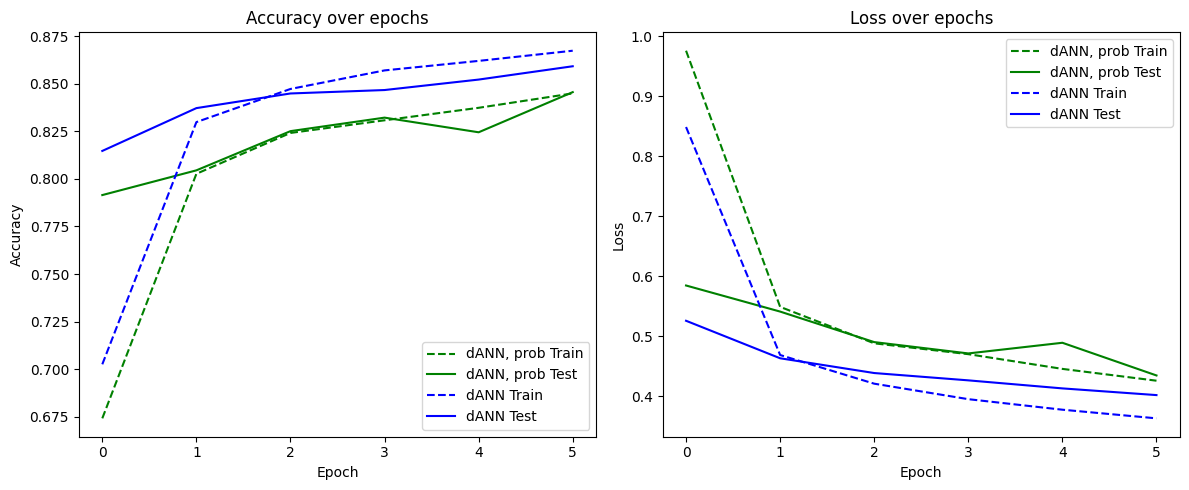

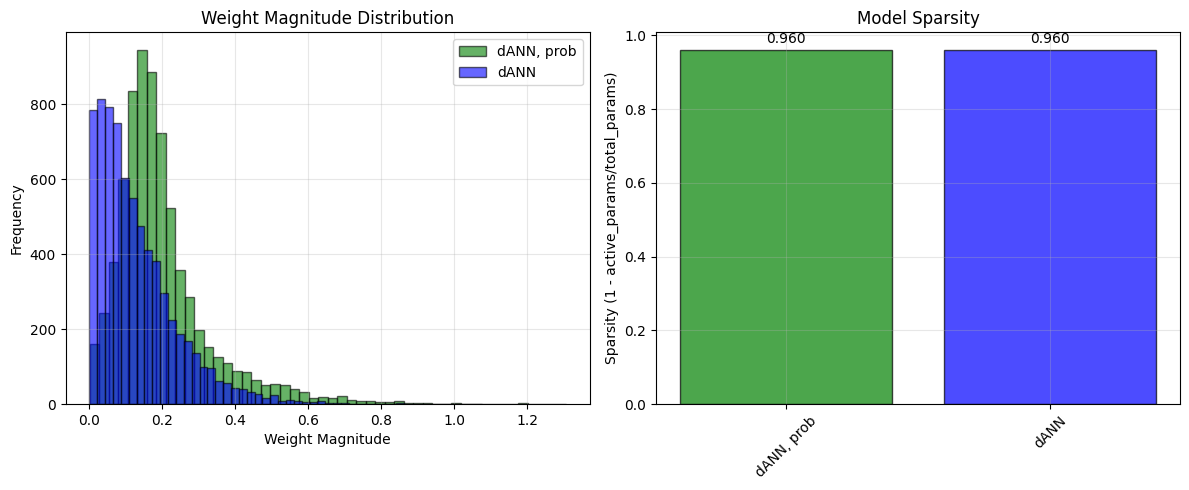


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.4262       0.4349       84.5       % 84.6       %
dANN                 0.3634       0.4022       86.7       % 85.9       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=64,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.15,
            steepness=0.1,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Restarted .venv (Python 3.12.9)

In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=64,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.15,
            steepness=0.1,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...


KeyboardInterrupt: 

In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=64,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.15,
            steepness=0.05,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   8%|▊         | 109/1410 [00:00<00:05, 221.59it/s, Epoch=1/6, Batch=110/235, Loss=0.7553]

num of dendrite successful swaps: 5496


Training :  13%|█▎        | 177/1410 [00:00<00:05, 241.97it/s, Epoch=1/6, Batch=178/235, Loss=0.6982]

num of dendrite successful swaps: 3691


Training :  17%|█▋        | 233/1410 [00:01<00:04, 250.95it/s, Epoch=1/6, Batch=234/235, Loss=0.5042]

num of dendrite successful swaps: 3203


Training :  22%|██▏       | 306/1410 [00:01<00:04, 237.68it/s, Epoch=2/6, Batch=73/235, Loss=0.4867] 

num of dendrite successful swaps: 2891


Training :  26%|██▌       | 369/1410 [00:01<00:04, 247.59it/s, Epoch=2/6, Batch=136/235, Loss=0.5226]

num of dendrite successful swaps: 2817


Training :  31%|███       | 434/1410 [00:01<00:03, 254.14it/s, Epoch=2/6, Batch=201/235, Loss=0.4549]

num of dendrite successful swaps: 2763


Training :  35%|███▍      | 490/1410 [00:02<00:03, 254.73it/s, Epoch=3/6, Batch=23/235, Loss=0.4769] 

num of dendrite successful swaps: 2695


Training :  40%|███▉      | 562/1410 [00:02<00:03, 246.84it/s, Epoch=3/6, Batch=95/235, Loss=0.4690]

num of dendrite successful swaps: 2690


Training :  44%|████▍     | 627/1410 [00:02<00:03, 255.64it/s, Epoch=3/6, Batch=160/235, Loss=0.3495]

num of dendrite successful swaps: 2544


Training :  49%|████▉     | 690/1410 [00:02<00:02, 257.66it/s, Epoch=3/6, Batch=223/235, Loss=0.4197]

num of dendrite successful swaps: 2601


Training :  53%|█████▎    | 754/1410 [00:03<00:02, 243.09it/s, Epoch=4/6, Batch=53/235, Loss=0.4552] 

num of dendrite successful swaps: 2507


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 252.87it/s, Epoch=4/6, Batch=117/235, Loss=0.4460]

num of dendrite successful swaps: 2456


Training :  62%|██████▏   | 881/1410 [00:03<00:02, 254.92it/s, Epoch=4/6, Batch=180/235, Loss=0.4603]

num of dendrite successful swaps: 2476


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 254.74it/s, Epoch=5/6, Batch=3/235, Loss=0.4398]  

num of dendrite successful swaps: 2490


Training :  72%|███████▏  | 1010/1410 [00:04<00:01, 244.68it/s, Epoch=5/6, Batch=75/235, Loss=0.4313]

num of dendrite successful swaps: 2391


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 253.77it/s, Epoch=5/6, Batch=139/235, Loss=0.3689]

num of dendrite successful swaps: 2445


Training :  81%|████████  | 1138/1410 [00:04<00:01, 255.77it/s, Epoch=5/6, Batch=203/235, Loss=0.4419]

num of dendrite successful swaps: 2398


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 235.21it/s, Epoch=6/6, Batch=25/235, Loss=0.4495] 

num of dendrite successful swaps: 2371


Training :  90%|████████▉ | 1265/1410 [00:05<00:00, 247.33it/s, Epoch=6/6, Batch=96/235, Loss=0.4170]

num of dendrite successful swaps: 2334


Training :  94%|█████████▍| 1329/1410 [00:05<00:00, 251.74it/s, Epoch=6/6, Batch=160/235, Loss=0.3456]

num of dendrite successful swaps: 2307


Training :  99%|█████████▉| 1394/1410 [00:05<00:00, 255.25it/s, Epoch=6/6, Batch=225/235, Loss=0.3613]

num of dendrite successful swaps: 2341


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 243.63it/s, Epoch=6/6, Batch=234/235, Loss=0.3909]


Number of mask updates: 22
Train loss dANN, prob model: 0.3905
Train accuracy dANN, prob model: 85.6%
Test accuracy dANN, prob model: 85.1%

Training dANN model...


Training :  22%|██▏       | 305/1410 [00:01<00:04, 250.18it/s, Epoch=2/6, Batch=71/235, Loss=0.4769] 


KeyboardInterrupt: 

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 255.32it/s, Epoch=1/6, Batch=179/235, Loss=0.5236]

num of dendrite successful swaps: 5055


Training :  22%|██▏       | 306/1410 [00:01<00:04, 242.69it/s, Epoch=2/6, Batch=73/235, Loss=0.5468] 

num of dendrite successful swaps: 3596


Training :  31%|███       | 434/1410 [00:01<00:03, 255.41it/s, Epoch=2/6, Batch=201/235, Loss=0.3687]

num of dendrite successful swaps: 3220


Training :  40%|███▉      | 562/1410 [00:02<00:03, 247.68it/s, Epoch=3/6, Batch=95/235, Loss=0.3880] 

num of dendrite successful swaps: 2908


Training :  49%|████▉     | 690/1410 [00:02<00:02, 255.87it/s, Epoch=3/6, Batch=223/235, Loss=0.4725]

num of dendrite successful swaps: 2804


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 249.26it/s, Epoch=4/6, Batch=117/235, Loss=0.4143]

num of dendrite successful swaps: 2645


Training :  66%|██████▋   | 936/1410 [00:03<00:01, 241.60it/s, Epoch=5/6, Batch=1/235, Loss=0.3943]  

num of dendrite successful swaps: 2499


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 249.99it/s, Epoch=5/6, Batch=139/235, Loss=0.4095]

num of dendrite successful swaps: 2532


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 234.94it/s, Epoch=6/6, Batch=25/235, Loss=0.4320] 

num of dendrite successful swaps: 2429


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 253.87it/s, Epoch=6/6, Batch=161/235, Loss=0.3184]

num of dendrite successful swaps: 2483


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 246.66it/s, Epoch=6/6, Batch=234/235, Loss=0.3401]


Number of mask updates: 11
Train loss dANN, prob model: 0.3723
Train accuracy dANN, prob model: 86.5%
Test accuracy dANN, prob model: 86.1%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 246.01it/s, Epoch=6/6, Batch=234/235, Loss=0.3105]


Number of mask updates: 1
Train loss dANN model: 0.3639
Train accuracy dANN model: 86.7%
Test accuracy dANN model: 85.5%


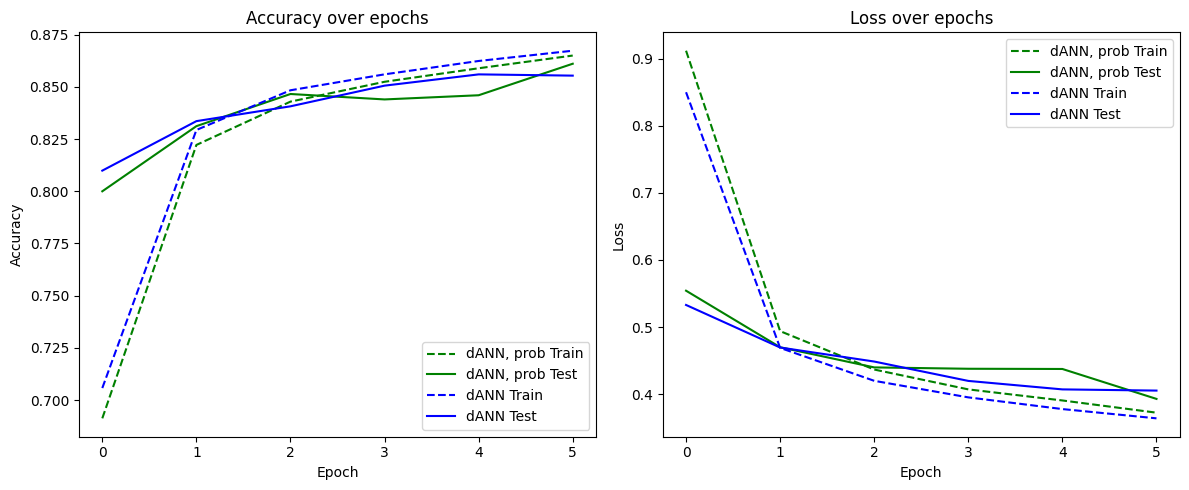

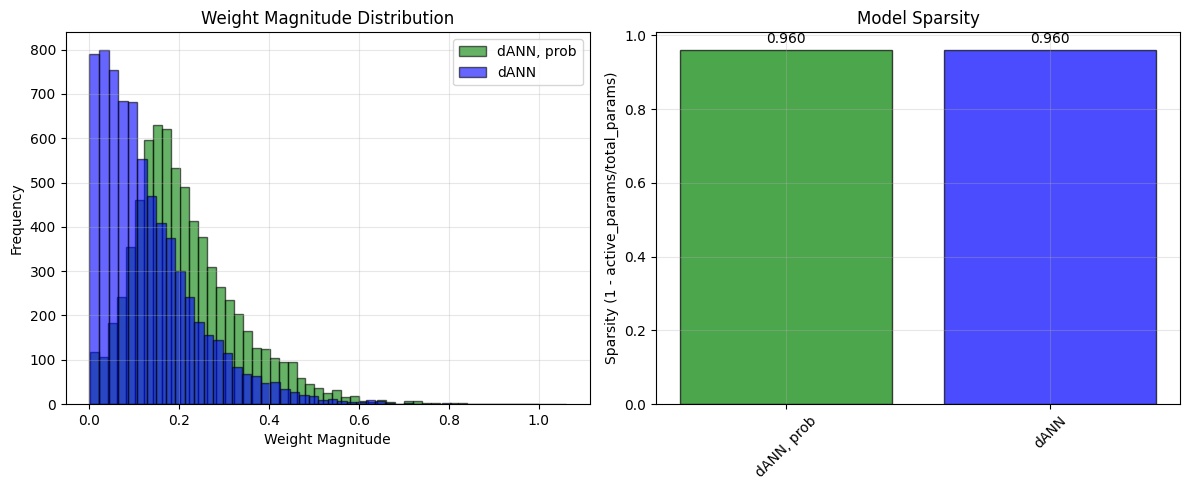


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3723       0.3929       86.5       % 86.1       %
dANN                 0.3639       0.4053       86.7       % 85.5       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.15,
            steepness=0.05,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 254.96it/s, Epoch=1/6, Batch=179/235, Loss=0.4877]

num of dendrite successful swaps: 3684


Training :  22%|██▏       | 306/1410 [00:01<00:04, 246.35it/s, Epoch=2/6, Batch=73/235, Loss=0.4965] 

num of dendrite successful swaps: 2997


Training :  31%|███       | 434/1410 [00:01<00:03, 255.36it/s, Epoch=2/6, Batch=201/235, Loss=0.4256]

num of dendrite successful swaps: 2747


Training :  40%|███▉      | 562/1410 [00:02<00:03, 247.21it/s, Epoch=3/6, Batch=95/235, Loss=0.4244] 

num of dendrite successful swaps: 2654


Training :  49%|████▉     | 689/1410 [00:02<00:02, 256.86it/s, Epoch=3/6, Batch=222/235, Loss=0.4631]

num of dendrite successful swaps: 2517


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 251.62it/s, Epoch=4/6, Batch=117/235, Loss=0.3316]

num of dendrite successful swaps: 2450


Training :  67%|██████▋   | 939/1410 [00:03<00:01, 238.00it/s, Epoch=5/6, Batch=3/235, Loss=0.3674]  

num of dendrite successful swaps: 2321


Training :  76%|███████▌  | 1072/1410 [00:04<00:01, 244.51it/s, Epoch=5/6, Batch=137/235, Loss=0.3971]

num of dendrite successful swaps: 2352


Training :  85%|████████▍ | 1192/1410 [00:04<00:00, 226.57it/s, Epoch=6/6, Batch=23/235, Loss=0.4329] 

num of dendrite successful swaps: 2282


Training :  94%|█████████▍| 1328/1410 [00:05<00:00, 246.86it/s, Epoch=6/6, Batch=159/235, Loss=0.2982]

num of dendrite successful swaps: 2282


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 246.00it/s, Epoch=6/6, Batch=234/235, Loss=0.2988]


Number of mask updates: 11
Train loss dANN, prob model: 0.3653
Train accuracy dANN, prob model: 86.7%
Test accuracy dANN, prob model: 85.5%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 249.18it/s, Epoch=6/6, Batch=234/235, Loss=0.3644]


Number of mask updates: 1
Train loss dANN model: 0.3653
Train accuracy dANN model: 86.7%
Test accuracy dANN model: 85.3%


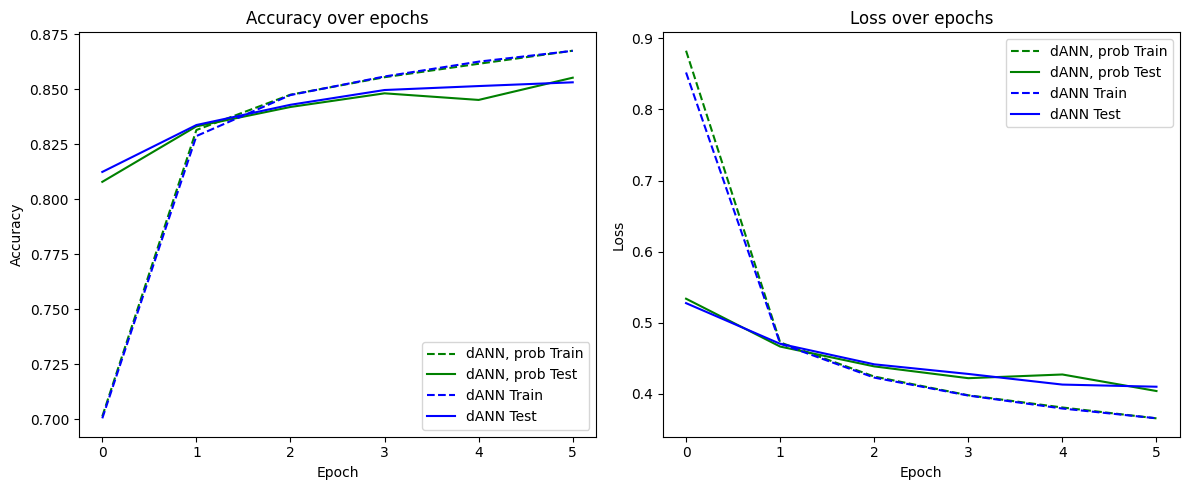

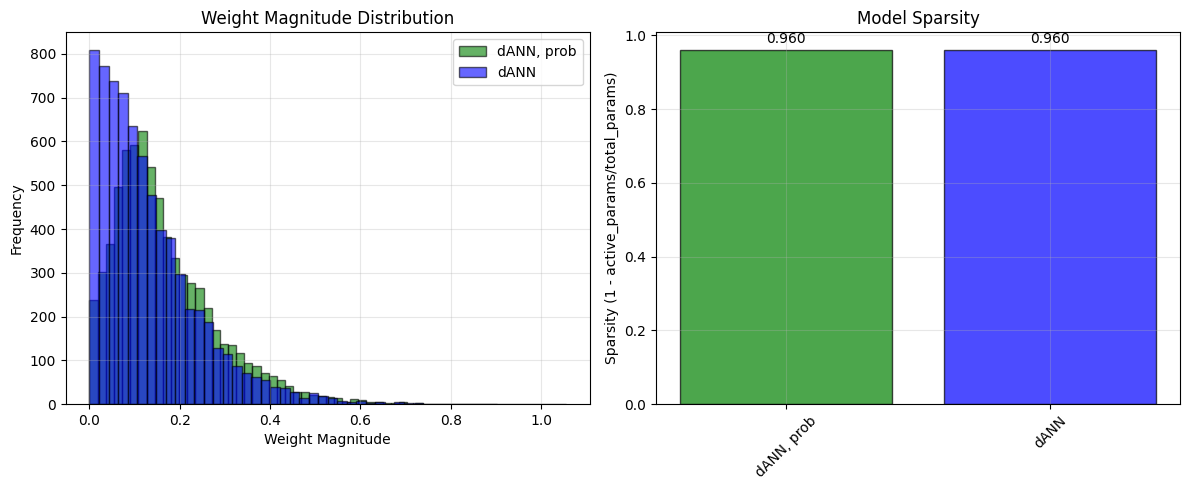


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3653       0.4037       86.7       % 85.5       %
dANN                 0.3653       0.4098       86.7       % 85.3       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.90,
            threshold_w=0.10,
            steepness=0.05,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 177/1410 [00:00<00:04, 254.13it/s, Epoch=1/6, Batch=178/235, Loss=0.6854]

num of dendrite successful swaps: 4796


Training :  21%|██▏       | 300/1410 [00:01<00:04, 229.82it/s, Epoch=2/6, Batch=67/235, Loss=0.5590] 

num of dendrite successful swaps: 3411


Training :  31%|███       | 433/1410 [00:01<00:03, 251.21it/s, Epoch=2/6, Batch=200/235, Loss=0.4888]

num of dendrite successful swaps: 3048


Training :  40%|███▉      | 560/1410 [00:02<00:03, 239.53it/s, Epoch=3/6, Batch=93/235, Loss=0.3586] 

num of dendrite successful swaps: 2837


Training :  49%|████▉     | 688/1410 [00:02<00:02, 253.19it/s, Epoch=3/6, Batch=221/235, Loss=0.3593]

num of dendrite successful swaps: 2667


Training :  58%|█████▊    | 817/1410 [00:03<00:02, 246.48it/s, Epoch=4/6, Batch=116/235, Loss=0.4036]

num of dendrite successful swaps: 2588


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 253.84it/s, Epoch=5/6, Batch=3/235, Loss=0.3519]  

num of dendrite successful swaps: 2523


Training :  76%|███████▌  | 1073/1410 [00:04<00:01, 251.60it/s, Epoch=5/6, Batch=138/235, Loss=0.3447]

num of dendrite successful swaps: 2345


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 235.54it/s, Epoch=6/6, Batch=25/235, Loss=0.3770] 

num of dendrite successful swaps: 2383


Training :  94%|█████████▍| 1329/1410 [00:05<00:00, 251.23it/s, Epoch=6/6, Batch=160/235, Loss=0.3956]

num of dendrite successful swaps: 2257


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 245.69it/s, Epoch=6/6, Batch=234/235, Loss=0.3096]


Number of mask updates: 11
Train loss dANN, prob model: 0.3763
Train accuracy dANN, prob model: 86.4%
Test accuracy dANN, prob model: 85.5%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 248.46it/s, Epoch=6/6, Batch=234/235, Loss=0.3352]


Number of mask updates: 1
Train loss dANN model: 0.3642
Train accuracy dANN model: 86.7%
Test accuracy dANN model: 85.5%


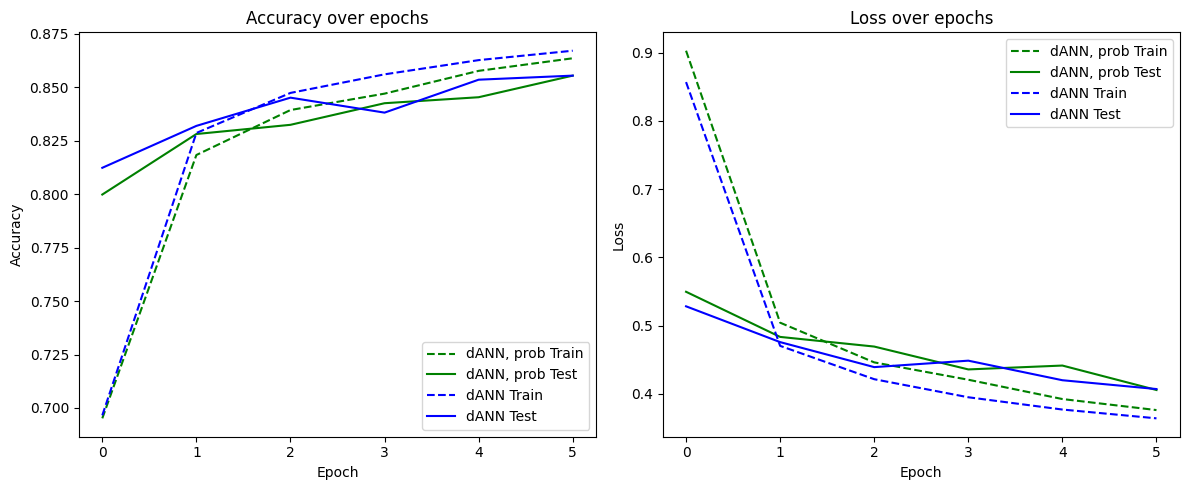

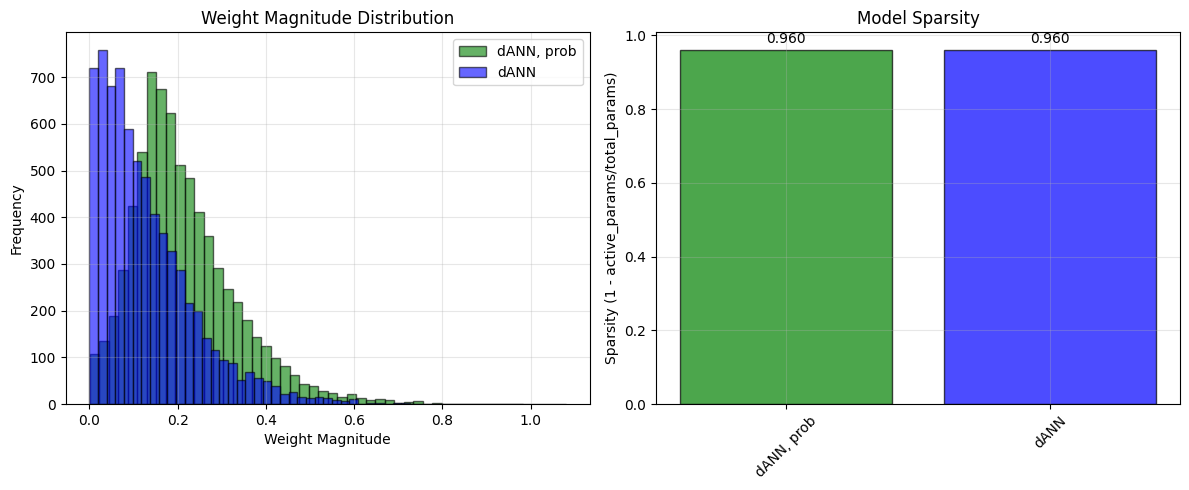


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3763       0.4057       86.4       % 85.5       %
dANN                 0.3642       0.4071       86.7       % 85.5       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.90,
            threshold_w=0.15,
            steepness=0.05,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 177/1410 [00:00<00:04, 252.38it/s, Epoch=1/6, Batch=178/235, Loss=0.7239]

num of dendrite successful swaps: 5304


Training :  22%|██▏       | 304/1410 [00:01<00:04, 241.78it/s, Epoch=2/6, Batch=71/235, Loss=0.4466] 

num of dendrite successful swaps: 3384


Training :  31%|███       | 432/1410 [00:01<00:03, 247.20it/s, Epoch=2/6, Batch=199/235, Loss=0.3832]

num of dendrite successful swaps: 2655


Training :  40%|███▉      | 561/1410 [00:02<00:03, 240.37it/s, Epoch=3/6, Batch=93/235, Loss=0.4501] 

num of dendrite successful swaps: 2384


Training :  49%|████▉     | 688/1410 [00:02<00:02, 245.49it/s, Epoch=3/6, Batch=221/235, Loss=0.4554]

num of dendrite successful swaps: 2136


Training :  58%|█████▊    | 816/1410 [00:03<00:02, 244.57it/s, Epoch=4/6, Batch=115/235, Loss=0.3302]

num of dendrite successful swaps: 1972


Training :  66%|██████▋   | 936/1410 [00:03<00:01, 246.96it/s, Epoch=5/6, Batch=1/235, Loss=0.4015]  

num of dendrite successful swaps: 1818


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 251.88it/s, Epoch=5/6, Batch=139/235, Loss=0.3052]

num of dendrite successful swaps: 1691


Training :  85%|████████▍ | 1193/1410 [00:04<00:00, 233.93it/s, Epoch=6/6, Batch=24/235, Loss=0.3995] 

num of dendrite successful swaps: 1646


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 252.86it/s, Epoch=6/6, Batch=161/235, Loss=0.3446]

num of dendrite successful swaps: 1498


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 244.07it/s, Epoch=6/6, Batch=234/235, Loss=0.3757]


Number of mask updates: 11
Train loss dANN, prob model: 0.3589
Train accuracy dANN, prob model: 86.9%
Test accuracy dANN, prob model: 85.5%


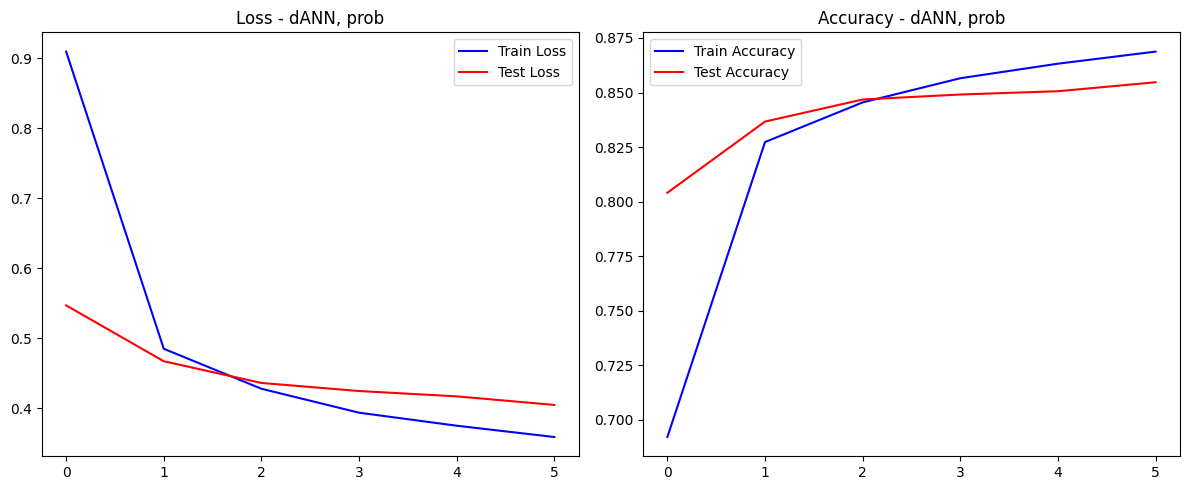


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.359
Test loss: 0.405
Train accuracy: 0.869
Test accuracy: 0.855


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.90,
            threshold_w=0.15,
            steepness=0.02,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 179/1410 [00:00<00:04, 257.84it/s, Epoch=1/6, Batch=180/235, Loss=0.5509]

num of dendrite successful swaps: 1212


Training :  22%|██▏       | 306/1410 [00:01<00:04, 243.39it/s, Epoch=2/6, Batch=73/235, Loss=0.4324] 

num of dendrite successful swaps: 1021


Training :  31%|███       | 434/1410 [00:01<00:03, 257.88it/s, Epoch=2/6, Batch=201/235, Loss=0.3986]

num of dendrite successful swaps: 950


Training :  40%|███▉      | 562/1410 [00:02<00:03, 251.44it/s, Epoch=3/6, Batch=95/235, Loss=0.3804] 

num of dendrite successful swaps: 804


Training :  49%|████▉     | 690/1410 [00:02<00:02, 256.95it/s, Epoch=3/6, Batch=223/235, Loss=0.4949]

num of dendrite successful swaps: 834


Training :  58%|█████▊    | 819/1410 [00:03<00:02, 255.77it/s, Epoch=4/6, Batch=118/235, Loss=0.4156]

num of dendrite successful swaps: 804


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 257.59it/s, Epoch=5/6, Batch=3/235, Loss=0.3415]  

num of dendrite successful swaps: 724


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 256.10it/s, Epoch=5/6, Batch=139/235, Loss=0.3559]

num of dendrite successful swaps: 689


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 237.64it/s, Epoch=6/6, Batch=25/235, Loss=0.3638] 

num of dendrite successful swaps: 645


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 255.88it/s, Epoch=6/6, Batch=161/235, Loss=0.4189]

num of dendrite successful swaps: 637


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 250.70it/s, Epoch=6/6, Batch=234/235, Loss=0.3383]


Number of mask updates: 11
Train loss dANN, prob model: 0.3582
Train accuracy dANN, prob model: 86.9%
Test accuracy dANN, prob model: 85.9%


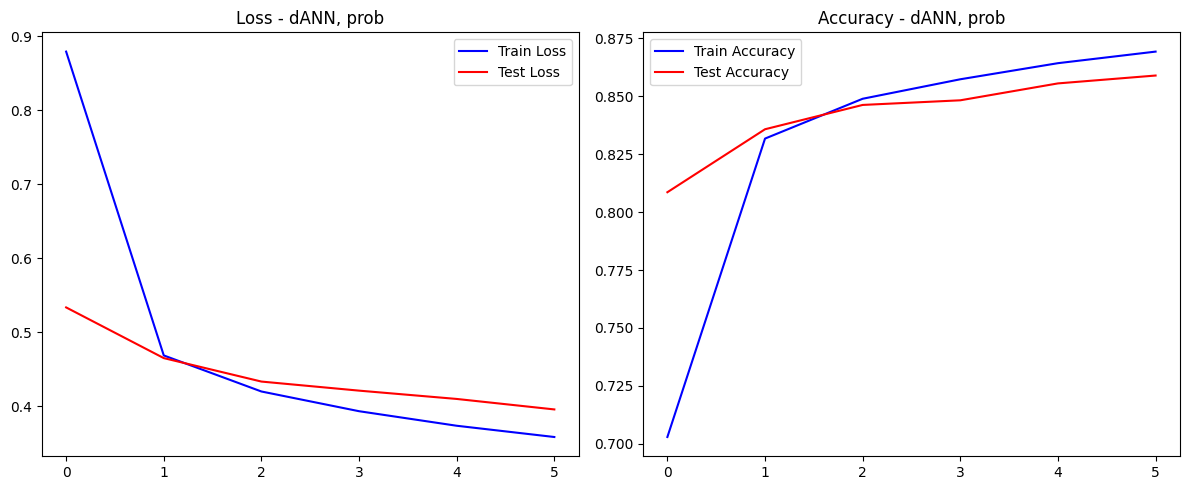


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.358
Test loss: 0.395
Train accuracy: 0.869
Test accuracy: 0.859


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.2,
            threshold_w=0.15,
            steepness=0.02,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 177/1410 [00:00<00:04, 253.55it/s, Epoch=1/6, Batch=178/235, Loss=0.7041]

num of dendrite successful swaps: 2927


Training :  22%|██▏       | 306/1410 [00:01<00:04, 242.73it/s, Epoch=2/6, Batch=73/235, Loss=0.4279] 

num of dendrite successful swaps: 2316


Training :  31%|███       | 434/1410 [00:01<00:03, 256.27it/s, Epoch=2/6, Batch=201/235, Loss=0.4213]

num of dendrite successful swaps: 1857


Training :  40%|███▉      | 561/1410 [00:02<00:03, 248.21it/s, Epoch=3/6, Batch=94/235, Loss=0.4150] 

num of dendrite successful swaps: 1686


Training :  49%|████▉     | 690/1410 [00:02<00:02, 257.94it/s, Epoch=3/6, Batch=223/235, Loss=0.4383]

num of dendrite successful swaps: 1517


Training :  58%|█████▊    | 817/1410 [00:03<00:02, 248.23it/s, Epoch=4/6, Batch=116/235, Loss=0.4310]

num of dendrite successful swaps: 1415


Training :  67%|██████▋   | 939/1410 [00:03<00:01, 254.03it/s, Epoch=5/6, Batch=4/235, Loss=0.3297]  

num of dendrite successful swaps: 1342


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 254.03it/s, Epoch=5/6, Batch=139/235, Loss=0.3833]

num of dendrite successful swaps: 1271


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 235.49it/s, Epoch=6/6, Batch=25/235, Loss=0.3689] 

num of dendrite successful swaps: 1214


Training :  94%|█████████▍| 1329/1410 [00:05<00:00, 254.17it/s, Epoch=6/6, Batch=160/235, Loss=0.3558]

num of dendrite successful swaps: 1117


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 248.09it/s, Epoch=6/6, Batch=234/235, Loss=0.3665]


Number of mask updates: 11
Train loss dANN, prob model: 0.3574
Train accuracy dANN, prob model: 86.8%
Test accuracy dANN, prob model: 85.8%


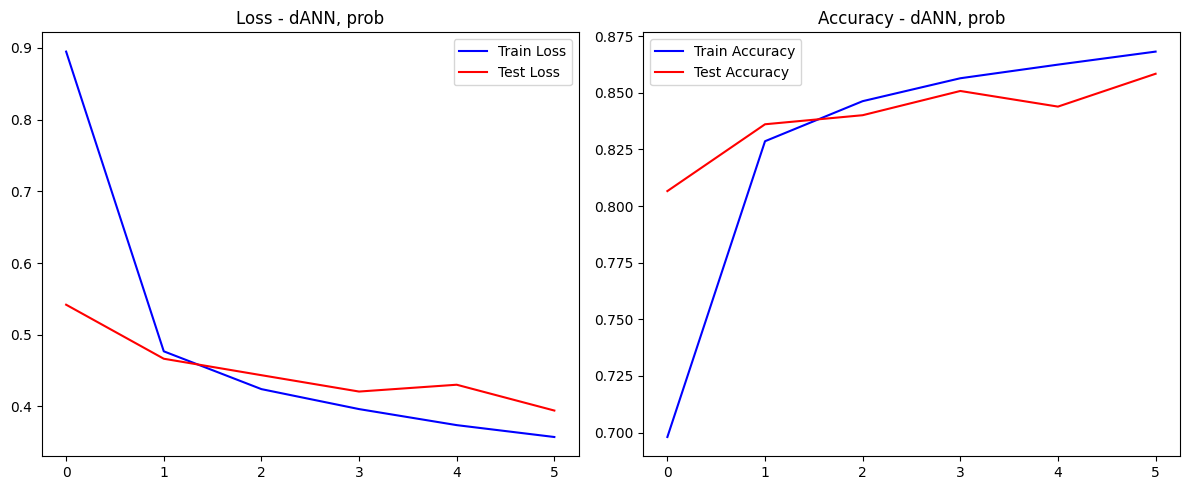


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.357
Test loss: 0.394
Train accuracy: 0.868
Test accuracy: 0.858


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.5,
            threshold_w=0.15,
            steepness=0.02,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 256.80it/s, Epoch=1/6, Batch=179/235, Loss=0.5383]

num of dendrite successful swaps: 3321


Training :  22%|██▏       | 307/1410 [00:01<00:04, 242.19it/s, Epoch=2/6, Batch=74/235, Loss=0.4803] 

num of dendrite successful swaps: 2568


Training :  31%|███       | 434/1410 [00:01<00:03, 258.98it/s, Epoch=2/6, Batch=201/235, Loss=0.4652]

num of dendrite successful swaps: 2048


Training :  40%|███▉      | 563/1410 [00:02<00:03, 252.30it/s, Epoch=3/6, Batch=96/235, Loss=0.4327] 

num of dendrite successful swaps: 1872


Training :  49%|████▊     | 687/1410 [00:02<00:02, 254.48it/s, Epoch=3/6, Batch=220/235, Loss=0.4676]

num of dendrite successful swaps: 1668


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 244.11it/s, Epoch=4/6, Batch=117/235, Loss=0.5148]

num of dendrite successful swaps: 1500


Training :  67%|██████▋   | 939/1410 [00:03<00:02, 235.34it/s, Epoch=5/6, Batch=4/235, Loss=0.3794]  

num of dendrite successful swaps: 1417


Training :  76%|███████▌  | 1073/1410 [00:04<00:01, 250.02it/s, Epoch=5/6, Batch=138/235, Loss=0.3374]

num of dendrite successful swaps: 1255


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 231.04it/s, Epoch=6/6, Batch=25/235, Loss=0.3799] 

num of dendrite successful swaps: 1240


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 254.39it/s, Epoch=6/6, Batch=161/235, Loss=0.4255]

num of dendrite successful swaps: 1145


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 247.42it/s, Epoch=6/6, Batch=234/235, Loss=0.3445]


Number of mask updates: 11
Train loss dANN, prob model: 0.3678
Train accuracy dANN, prob model: 86.5%
Test accuracy dANN, prob model: 85.4%


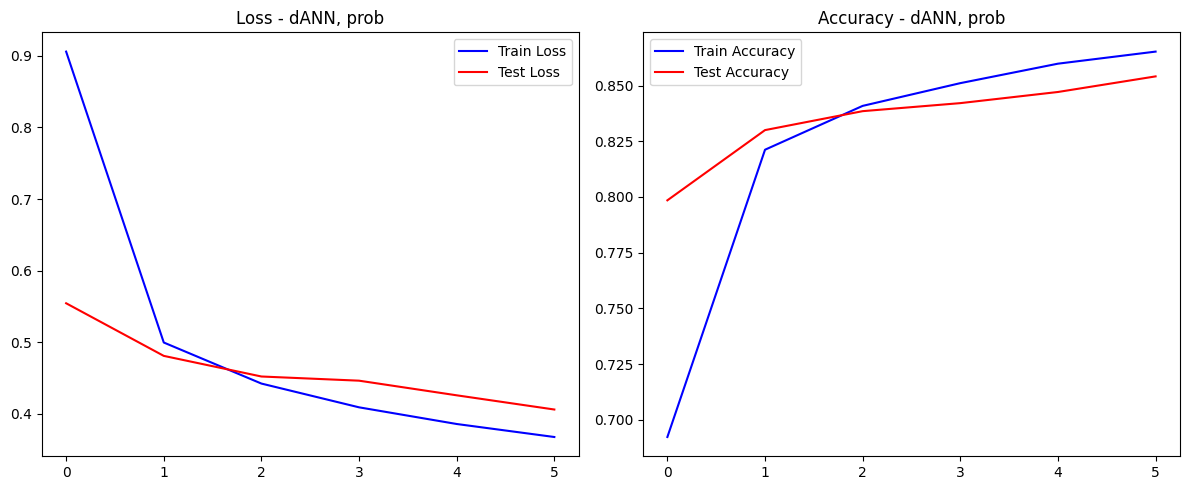


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.368
Test loss: 0.406
Train accuracy: 0.865
Test accuracy: 0.854


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.5,
            threshold_w=0.2,
            steepness=0.02,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  12%|█▏        | 176/1410 [00:00<00:04, 249.32it/s, Epoch=1/6, Batch=177/235, Loss=0.6263]

num of dendrite successful swaps: 5308


Training :  21%|██▏       | 303/1410 [00:01<00:04, 237.19it/s, Epoch=2/6, Batch=69/235, Loss=0.4986] 

num of dendrite successful swaps: 3448


Training :  31%|███       | 431/1410 [00:01<00:04, 242.17it/s, Epoch=2/6, Batch=198/235, Loss=0.4848]

num of dendrite successful swaps: 2779


Training :  40%|███▉      | 562/1410 [00:02<00:03, 246.44it/s, Epoch=3/6, Batch=95/235, Loss=0.3684] 

num of dendrite successful swaps: 2323


Training :  49%|████▉     | 689/1410 [00:02<00:02, 251.83it/s, Epoch=3/6, Batch=221/235, Loss=0.3596]

num of dendrite successful swaps: 1999


Training :  58%|█████▊    | 817/1410 [00:03<00:02, 248.55it/s, Epoch=4/6, Batch=116/235, Loss=0.3525]

num of dendrite successful swaps: 1856


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 254.04it/s, Epoch=5/6, Batch=3/235, Loss=0.4091]  

num of dendrite successful swaps: 1698


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 249.31it/s, Epoch=5/6, Batch=139/235, Loss=0.3600]

num of dendrite successful swaps: 1581


Training :  84%|████████▍ | 1188/1410 [00:04<00:00, 222.36it/s, Epoch=6/6, Batch=19/235, Loss=0.4352] 

num of dendrite successful swaps: 1547


Training :  94%|█████████▍| 1327/1410 [00:05<00:00, 228.80it/s, Epoch=6/6, Batch=158/235, Loss=0.2148]

num of dendrite successful swaps: 1455


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 241.91it/s, Epoch=6/6, Batch=234/235, Loss=0.3124]


Number of mask updates: 11
Train loss dANN, prob model: 0.3631
Train accuracy dANN, prob model: 86.8%
Test accuracy dANN, prob model: 85.6%


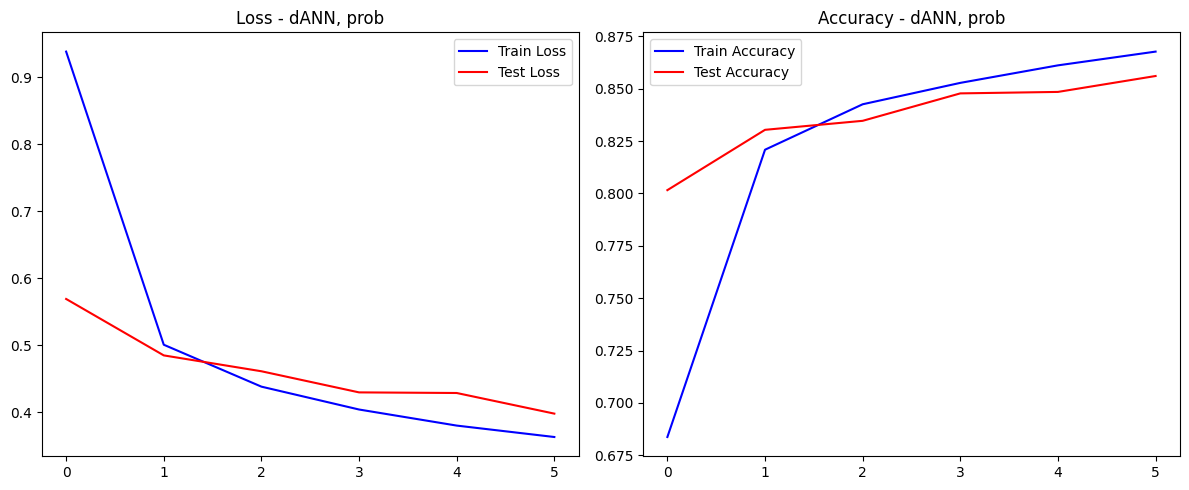


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.363
Test loss: 0.398
Train accuracy: 0.868
Test accuracy: 0.856


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.8,
            threshold_w=0.2,
            steepness=0.02,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 179/1410 [00:00<00:04, 258.26it/s, Epoch=1/6, Batch=180/235, Loss=0.5524]

num of dendrite successful swaps: 3596


Training :  22%|██▏       | 306/1410 [00:01<00:04, 244.99it/s, Epoch=2/6, Batch=73/235, Loss=0.4043] 

num of dendrite successful swaps: 2617


Training :  31%|███       | 435/1410 [00:01<00:03, 260.25it/s, Epoch=2/6, Batch=202/235, Loss=0.4222]

num of dendrite successful swaps: 2189


Training :  40%|███▉      | 560/1410 [00:02<00:03, 250.39it/s, Epoch=3/6, Batch=93/235, Loss=0.3876] 

num of dendrite successful swaps: 1908


Training :  49%|████▉     | 688/1410 [00:02<00:03, 238.23it/s, Epoch=3/6, Batch=221/235, Loss=0.4579]

num of dendrite successful swaps: 1697


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 248.86it/s, Epoch=4/6, Batch=117/235, Loss=0.3891]

num of dendrite successful swaps: 1611


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 256.70it/s, Epoch=5/6, Batch=3/235, Loss=0.3846]  

num of dendrite successful swaps: 1510


Training :  76%|███████▌  | 1075/1410 [00:04<00:01, 256.21it/s, Epoch=5/6, Batch=139/235, Loss=0.3476]

num of dendrite successful swaps: 1435


Training :  84%|████████▍ | 1189/1410 [00:04<00:00, 224.92it/s, Epoch=6/6, Batch=20/235, Loss=0.3820] 

num of dendrite successful swaps: 1381


Training :  94%|█████████▍| 1325/1410 [00:05<00:00, 238.76it/s, Epoch=6/6, Batch=156/235, Loss=0.3671]

num of dendrite successful swaps: 1327


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 243.14it/s, Epoch=6/6, Batch=234/235, Loss=0.3741]


Number of mask updates: 11
Train loss dANN, prob model: 0.3524
Train accuracy dANN, prob model: 87.1%
Test accuracy dANN, prob model: 85.7%


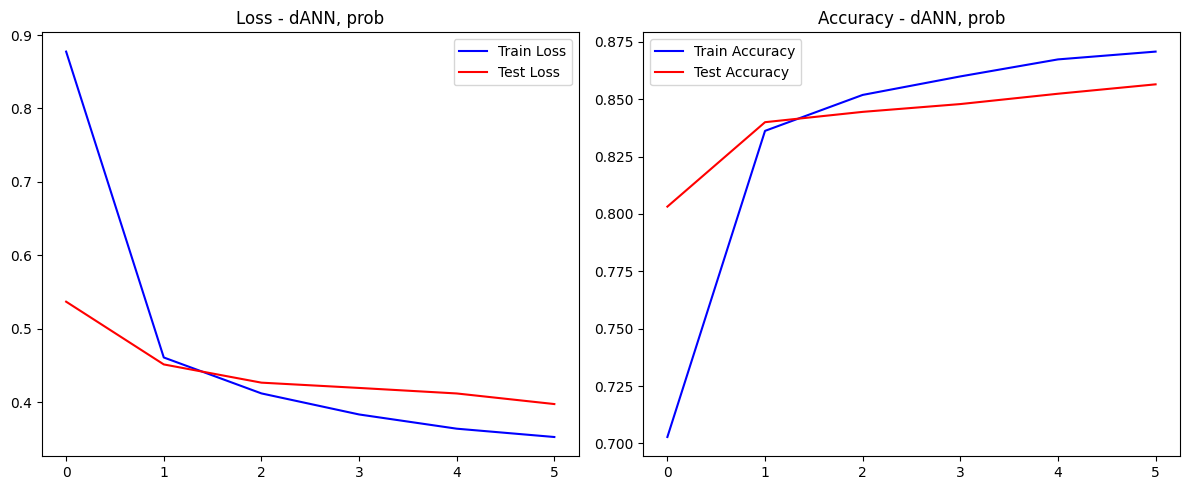


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.352
Test loss: 0.397
Train accuracy: 0.871
Test accuracy: 0.857


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.8,
            threshold_w=0.1,
            steepness=0.02,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 177/1410 [00:00<00:04, 255.19it/s, Epoch=1/6, Batch=178/235, Loss=0.6689]

num of dendrite successful swaps: 3707


Training :  22%|██▏       | 306/1410 [00:01<00:04, 243.57it/s, Epoch=2/6, Batch=72/235, Loss=0.4603] 

num of dendrite successful swaps: 2532


Training :  31%|███       | 433/1410 [00:01<00:03, 252.34it/s, Epoch=2/6, Batch=200/235, Loss=0.4781]

num of dendrite successful swaps: 1893


Training :  40%|███▉      | 562/1410 [00:02<00:03, 245.86it/s, Epoch=3/6, Batch=95/235, Loss=0.5278] 

num of dendrite successful swaps: 1543


Training :  49%|████▉     | 689/1410 [00:02<00:02, 254.76it/s, Epoch=3/6, Batch=222/235, Loss=0.3631]

num of dendrite successful swaps: 1277


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 246.48it/s, Epoch=4/6, Batch=117/235, Loss=0.3545]

num of dendrite successful swaps: 1181


Training :  66%|██████▋   | 936/1410 [00:03<00:01, 249.72it/s, Epoch=5/6, Batch=1/235, Loss=0.2967]  

num of dendrite successful swaps: 1046


Training :  76%|███████▌  | 1073/1410 [00:04<00:01, 249.87it/s, Epoch=5/6, Batch=138/235, Loss=0.3606]

num of dendrite successful swaps: 924


Training :  85%|████████▍ | 1193/1410 [00:04<00:00, 233.69it/s, Epoch=6/6, Batch=24/235, Loss=0.3712] 

num of dendrite successful swaps: 850


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 254.14it/s, Epoch=6/6, Batch=160/235, Loss=0.3266]

num of dendrite successful swaps: 837


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 247.21it/s, Epoch=6/6, Batch=234/235, Loss=0.3142]


Number of mask updates: 11
Train loss dANN, prob model: 0.3463
Train accuracy dANN, prob model: 87.4%
Test accuracy dANN, prob model: 86.2%


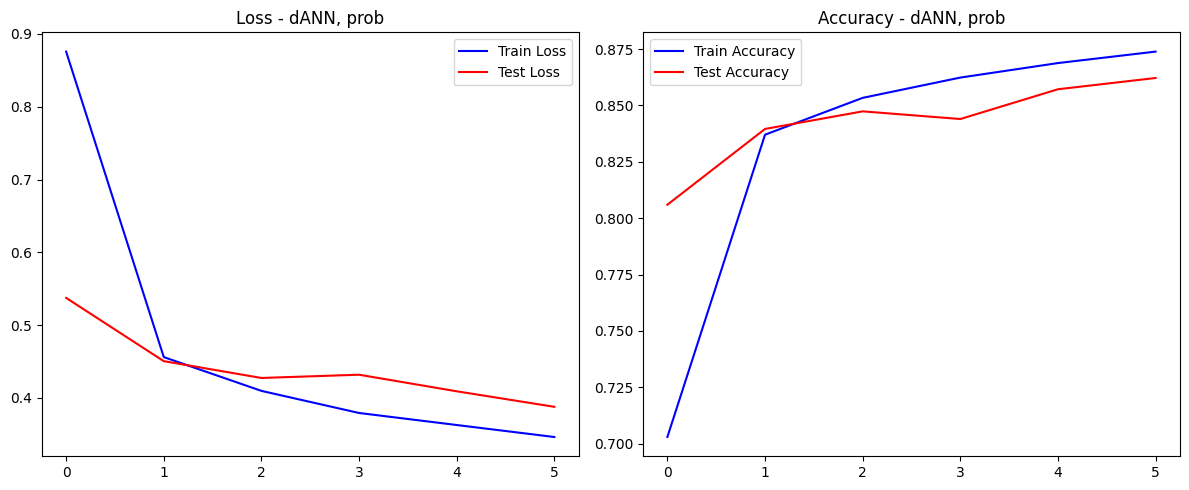


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.346
Test loss: 0.388
Train accuracy: 0.874
Test accuracy: 0.862


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.8,
            threshold_w=0.1,
            steepness=0.005,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 177/1410 [00:00<00:04, 254.84it/s, Epoch=1/6, Batch=178/235, Loss=0.6571]

num of dendrite successful swaps: 3718


Training :  22%|██▏       | 305/1410 [00:01<00:04, 243.86it/s, Epoch=2/6, Batch=72/235, Loss=0.4836] 

num of dendrite successful swaps: 2507


Training :  31%|███       | 432/1410 [00:01<00:04, 242.92it/s, Epoch=2/6, Batch=199/235, Loss=0.3628]

num of dendrite successful swaps: 1891


Training :  40%|███▉      | 561/1410 [00:02<00:03, 238.46it/s, Epoch=3/6, Batch=94/235, Loss=0.4074] 

num of dendrite successful swaps: 1517


Training :  49%|████▉     | 688/1410 [00:02<00:02, 250.75it/s, Epoch=3/6, Batch=221/235, Loss=0.4335]

num of dendrite successful swaps: 1303


Training :  58%|█████▊    | 812/1410 [00:03<00:02, 232.86it/s, Epoch=4/6, Batch=111/235, Loss=0.3948]

num of dendrite successful swaps: 1104


Training :  66%|██████▋   | 937/1410 [00:03<00:01, 250.79it/s, Epoch=5/6, Batch=2/235, Loss=0.3050]  

num of dendrite successful swaps: 953


Training :  76%|███████▌  | 1070/1410 [00:04<00:01, 230.58it/s, Epoch=5/6, Batch=135/235, Loss=0.3753]

num of dendrite successful swaps: 880


Training :  85%|████████▍ | 1193/1410 [00:04<00:00, 231.78it/s, Epoch=6/6, Batch=24/235, Loss=0.3527] 

num of dendrite successful swaps: 800


Training :  94%|█████████▍| 1328/1410 [00:05<00:00, 245.15it/s, Epoch=6/6, Batch=159/235, Loss=0.3253]

num of dendrite successful swaps: 750


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 241.70it/s, Epoch=6/6, Batch=234/235, Loss=0.3611]


Number of mask updates: 11
Train loss dANN, prob model: 0.3442
Train accuracy dANN, prob model: 87.5%
Test accuracy dANN, prob model: 86.0%


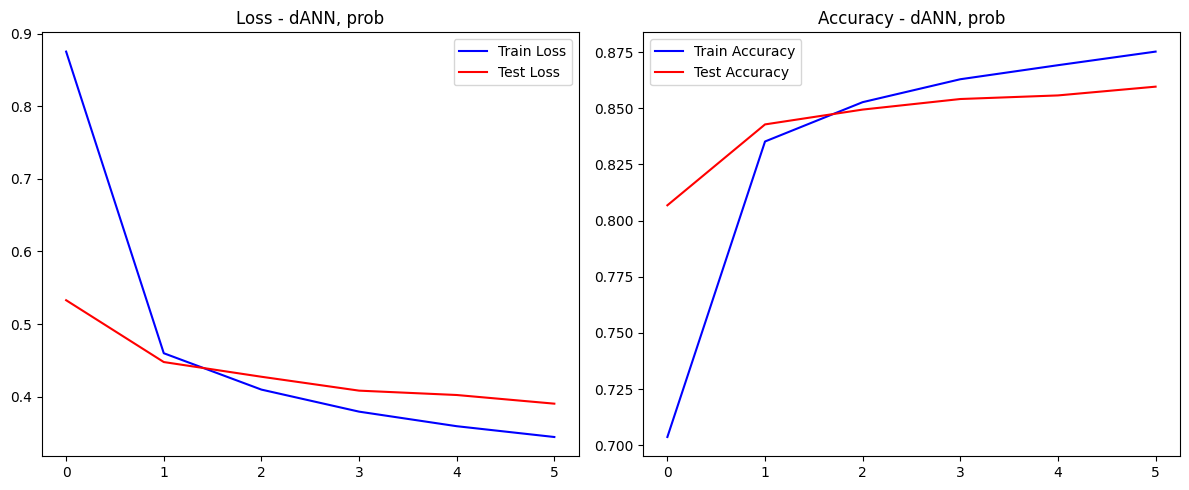


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.344
Test loss: 0.390
Train accuracy: 0.875
Test accuracy: 0.860


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.8,
            threshold_w=0.1,
            steepness=0.002,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  12%|█▏        | 176/1410 [00:00<00:04, 249.17it/s, Epoch=1/6, Batch=177/235, Loss=0.5821]

num of dendrite successful swaps: 4816


Training :  22%|██▏       | 306/1410 [00:01<00:04, 246.69it/s, Epoch=2/6, Batch=73/235, Loss=0.4589] 

num of dendrite successful swaps: 3155


Training :  31%|███       | 434/1410 [00:01<00:03, 254.69it/s, Epoch=2/6, Batch=201/235, Loss=0.4073]

num of dendrite successful swaps: 2291


Training :  40%|███▉      | 562/1410 [00:02<00:03, 247.29it/s, Epoch=3/6, Batch=95/235, Loss=0.4550] 

num of dendrite successful swaps: 1793


Training :  49%|████▊     | 687/1410 [00:02<00:02, 250.14it/s, Epoch=3/6, Batch=220/235, Loss=0.3027]

num of dendrite successful swaps: 1532


Training :  58%|█████▊    | 817/1410 [00:03<00:02, 239.93it/s, Epoch=4/6, Batch=116/235, Loss=0.3887]

num of dendrite successful swaps: 1273


Training :  66%|██████▋   | 937/1410 [00:03<00:01, 250.22it/s, Epoch=5/6, Batch=2/235, Loss=0.3475]  

num of dendrite successful swaps: 1110


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 248.24it/s, Epoch=5/6, Batch=139/235, Loss=0.3830]

num of dendrite successful swaps: 1022


Training :  84%|████████▍ | 1191/1410 [00:04<00:00, 226.44it/s, Epoch=6/6, Batch=22/235, Loss=0.3659] 

num of dendrite successful swaps: 921


Training :  94%|█████████▍| 1329/1410 [00:05<00:00, 244.82it/s, Epoch=6/6, Batch=160/235, Loss=0.2430]

num of dendrite successful swaps: 906


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 243.73it/s, Epoch=6/6, Batch=234/235, Loss=0.2892]


Number of mask updates: 11
Train loss dANN, prob model: 0.3458
Train accuracy dANN, prob model: 87.4%
Test accuracy dANN, prob model: 86.1%


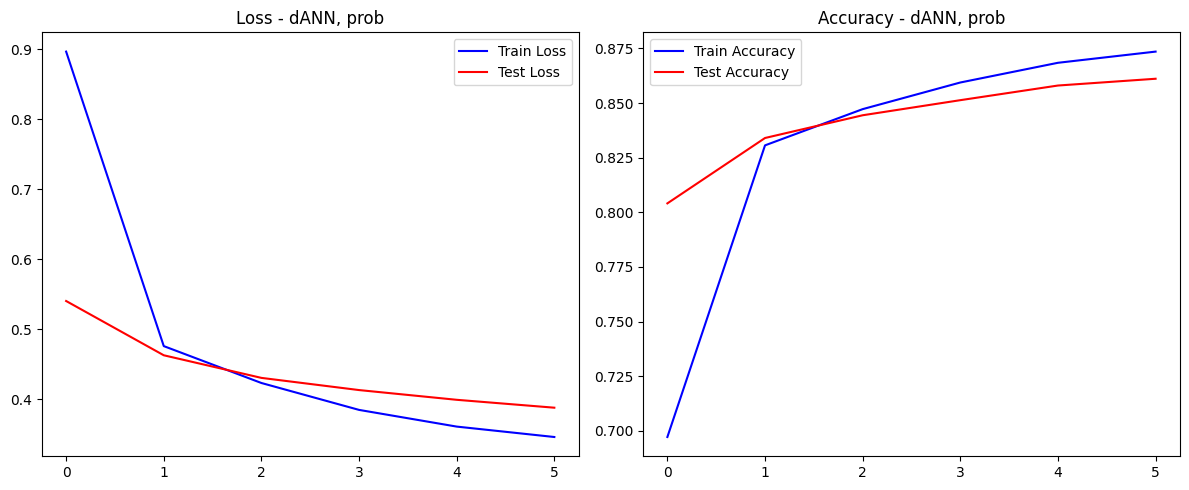


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.346
Test loss: 0.388
Train accuracy: 0.874
Test accuracy: 0.861


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.8,
            threshold_w=0.15,
            steepness=0.002,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  12%|█▏        | 175/1410 [00:00<00:05, 244.76it/s, Epoch=1/6, Batch=176/235, Loss=0.5048]

num of dendrite successful swaps: 4221


Training :  22%|██▏       | 306/1410 [00:01<00:04, 242.93it/s, Epoch=2/6, Batch=73/235, Loss=0.3993] 

num of dendrite successful swaps: 2834


Training :  31%|███       | 433/1410 [00:01<00:03, 252.95it/s, Epoch=2/6, Batch=200/235, Loss=0.4763]

num of dendrite successful swaps: 2029


Training :  40%|███▉      | 562/1410 [00:02<00:03, 249.42it/s, Epoch=3/6, Batch=95/235, Loss=0.4098] 

num of dendrite successful swaps: 1681


Training :  49%|████▉     | 690/1410 [00:02<00:02, 257.18it/s, Epoch=3/6, Batch=223/235, Loss=0.4187]

num of dendrite successful swaps: 1394


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 250.31it/s, Epoch=4/6, Batch=117/235, Loss=0.3569]

num of dendrite successful swaps: 1231


Training :  66%|██████▋   | 937/1410 [00:03<00:01, 255.63it/s, Epoch=5/6, Batch=2/235, Loss=0.3483]  

num of dendrite successful swaps: 1037


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 251.20it/s, Epoch=5/6, Batch=139/235, Loss=0.3566]

num of dendrite successful swaps: 973


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 235.95it/s, Epoch=6/6, Batch=25/235, Loss=0.3937] 

num of dendrite successful swaps: 856


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 254.72it/s, Epoch=6/6, Batch=161/235, Loss=0.3588]

num of dendrite successful swaps: 848


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 247.07it/s, Epoch=6/6, Batch=234/235, Loss=0.4416]


Number of mask updates: 11
Train loss dANN, prob model: 0.3471
Train accuracy dANN, prob model: 87.4%
Test accuracy dANN, prob model: 86.0%


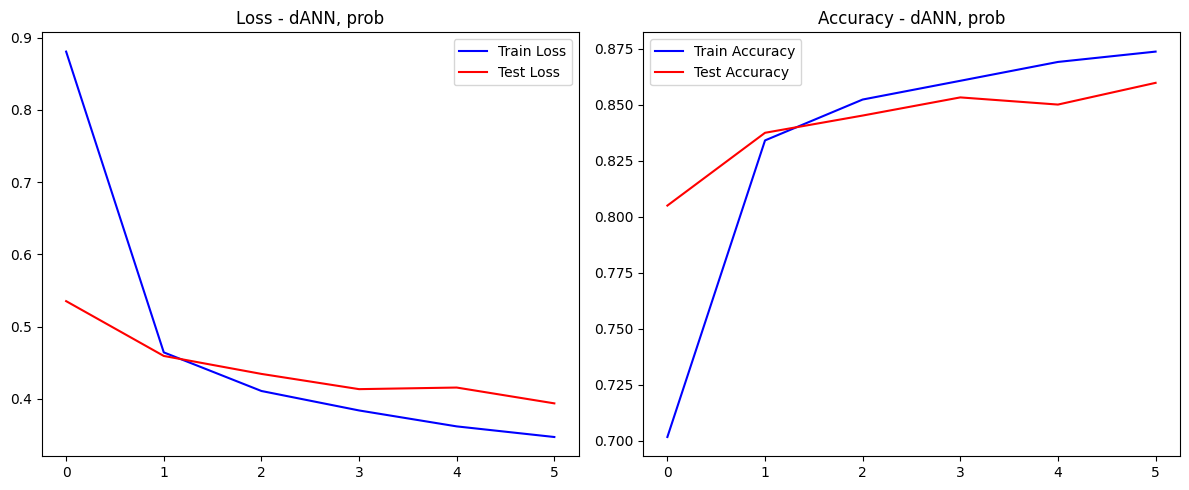


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.347
Test loss: 0.394
Train accuracy: 0.874
Test accuracy: 0.860


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.8,
            threshold_w=0.12,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 254.56it/s, Epoch=1/6, Batch=178/235, Loss=0.6670]

num of dendrite successful swaps: 4223


Training :  22%|██▏       | 306/1410 [00:01<00:04, 243.51it/s, Epoch=2/6, Batch=73/235, Loss=0.4802] 

num of dendrite successful swaps: 2783


Training :  31%|███       | 434/1410 [00:01<00:03, 256.68it/s, Epoch=2/6, Batch=201/235, Loss=0.4191]

num of dendrite successful swaps: 2133


Training :  40%|███▉      | 562/1410 [00:02<00:03, 251.62it/s, Epoch=3/6, Batch=95/235, Loss=0.4664] 

num of dendrite successful swaps: 1660


Training :  49%|████▉     | 690/1410 [00:02<00:02, 260.66it/s, Epoch=3/6, Batch=223/235, Loss=0.4299]

num of dendrite successful swaps: 1438


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 254.08it/s, Epoch=4/6, Batch=117/235, Loss=0.4384]

num of dendrite successful swaps: 1250


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 257.16it/s, Epoch=5/6, Batch=3/235, Loss=0.3806]  

num of dendrite successful swaps: 1034


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 253.05it/s, Epoch=5/6, Batch=139/235, Loss=0.2745]

num of dendrite successful swaps: 981


Training :  85%|████████▍ | 1193/1410 [00:04<00:00, 232.31it/s, Epoch=6/6, Batch=24/235, Loss=0.4215] 

num of dendrite successful swaps: 882


Training :  94%|█████████▍| 1329/1410 [00:05<00:00, 253.03it/s, Epoch=6/6, Batch=160/235, Loss=0.3533]

num of dendrite successful swaps: 801


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 249.58it/s, Epoch=6/6, Batch=234/235, Loss=0.3130]


Number of mask updates: 11
Train loss dANN, prob model: 0.3476
Train accuracy dANN, prob model: 87.3%
Test accuracy dANN, prob model: 86.0%


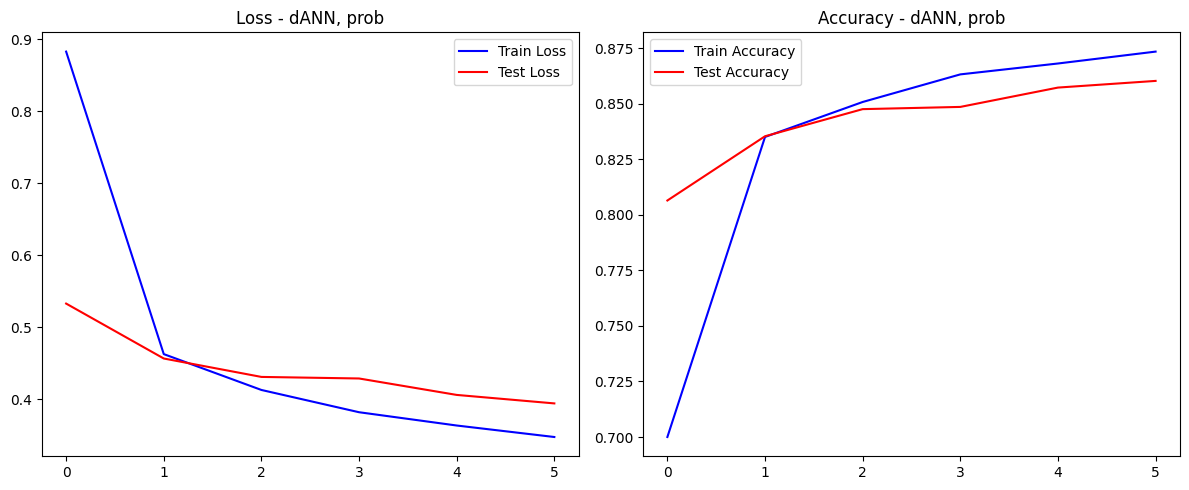


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.348
Test loss: 0.394
Train accuracy: 0.873
Test accuracy: 0.860


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.8,
            threshold_w=0.12,
            steepness=0.0005,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 256.59it/s, Epoch=1/6, Batch=179/235, Loss=0.4646]

num of dendrite successful swaps: 4803


Training :  22%|██▏       | 307/1410 [00:01<00:04, 244.78it/s, Epoch=2/6, Batch=73/235, Loss=0.4397] 

num of dendrite successful swaps: 2939


Training :  31%|███       | 434/1410 [00:01<00:03, 257.15it/s, Epoch=2/6, Batch=201/235, Loss=0.4544]

num of dendrite successful swaps: 2167


Training :  40%|███▉      | 562/1410 [00:02<00:03, 250.37it/s, Epoch=3/6, Batch=95/235, Loss=0.3925] 

num of dendrite successful swaps: 1646


Training :  49%|████▉     | 690/1410 [00:02<00:02, 255.83it/s, Epoch=3/6, Batch=223/235, Loss=0.4576]

num of dendrite successful swaps: 1364


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 254.30it/s, Epoch=4/6, Batch=117/235, Loss=0.3922]

num of dendrite successful swaps: 1188


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 259.20it/s, Epoch=5/6, Batch=3/235, Loss=0.3039]  

num of dendrite successful swaps: 1037


Training :  76%|███████▌  | 1075/1410 [00:04<00:01, 255.35it/s, Epoch=5/6, Batch=140/235, Loss=0.4193]

num of dendrite successful swaps: 923


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 237.30it/s, Epoch=6/6, Batch=25/235, Loss=0.3572] 

num of dendrite successful swaps: 852


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 255.19it/s, Epoch=6/6, Batch=161/235, Loss=0.4089]

num of dendrite successful swaps: 757


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 250.20it/s, Epoch=6/6, Batch=234/235, Loss=0.3728]


Number of mask updates: 11
Train loss dANN, prob model: 0.3447
Train accuracy dANN, prob model: 87.5%
Test accuracy dANN, prob model: 86.2%


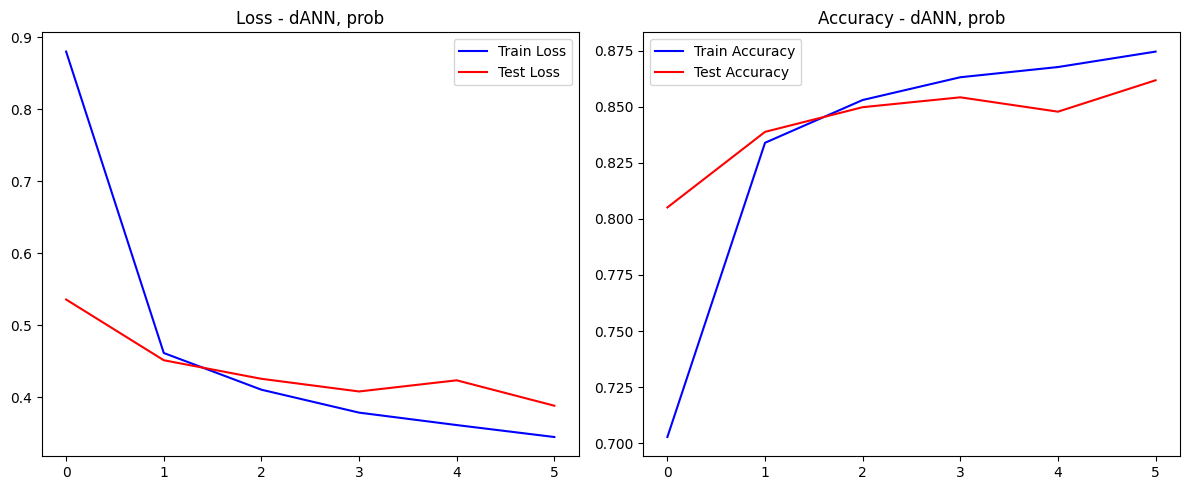


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.345
Test loss: 0.388
Train accuracy: 0.875
Test accuracy: 0.862


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.9,
            threshold_w=0.12,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 253.97it/s, Epoch=1/6, Batch=179/235, Loss=0.5043]

num of dendrite successful swaps: 3707


Training :  22%|██▏       | 306/1410 [00:01<00:04, 247.75it/s, Epoch=2/6, Batch=73/235, Loss=0.4155] 

num of dendrite successful swaps: 2576


Training :  31%|███       | 434/1410 [00:01<00:03, 255.41it/s, Epoch=2/6, Batch=201/235, Loss=0.4190]

num of dendrite successful swaps: 1893


Training :  40%|███▉      | 560/1410 [00:02<00:03, 245.41it/s, Epoch=3/6, Batch=93/235, Loss=0.4937] 

num of dendrite successful swaps: 1599


Training :  49%|████▉     | 689/1410 [00:02<00:02, 255.10it/s, Epoch=3/6, Batch=222/235, Loss=0.4519]

num of dendrite successful swaps: 1328


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 250.15it/s, Epoch=4/6, Batch=117/235, Loss=0.3600]

num of dendrite successful swaps: 1152


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 255.83it/s, Epoch=5/6, Batch=3/235, Loss=0.3641]  

num of dendrite successful swaps: 988


Training :  76%|███████▌  | 1073/1410 [00:04<00:01, 252.84it/s, Epoch=5/6, Batch=138/235, Loss=0.3914]

num of dendrite successful swaps: 927


Training :  84%|████████▍ | 1190/1410 [00:04<00:00, 229.71it/s, Epoch=6/6, Batch=21/235, Loss=0.3208] 

num of dendrite successful swaps: 827


Training :  94%|█████████▍| 1329/1410 [00:05<00:00, 249.46it/s, Epoch=6/6, Batch=160/235, Loss=0.2756]

num of dendrite successful swaps: 757


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 245.68it/s, Epoch=6/6, Batch=234/235, Loss=0.4701]


Number of mask updates: 11
Train loss dANN, prob model: 0.3492
Train accuracy dANN, prob model: 87.1%
Test accuracy dANN, prob model: 86.1%


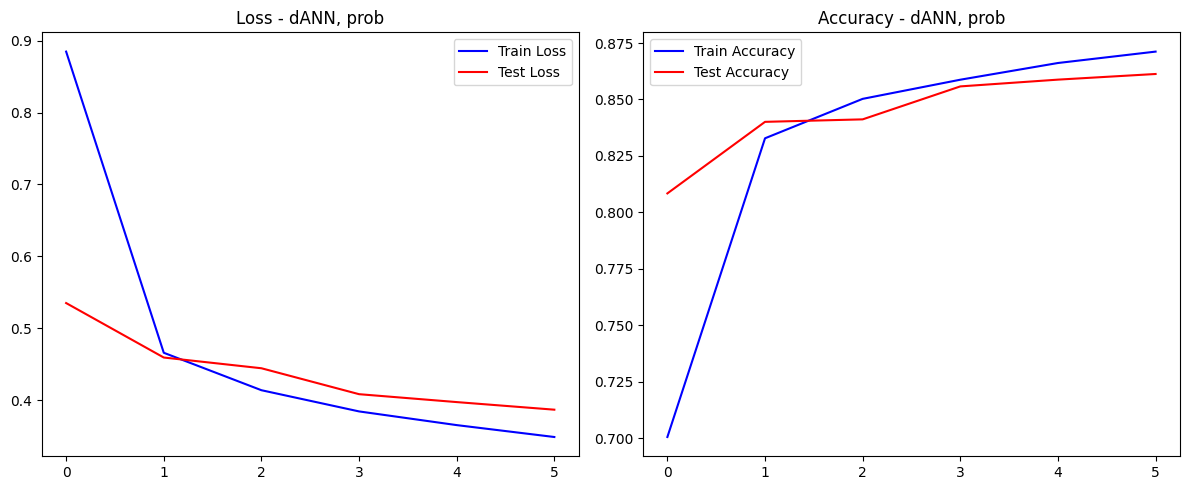


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.349
Test loss: 0.387
Train accuracy: 0.871
Test accuracy: 0.861


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.7,
            threshold_w=0.12,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 177/1410 [00:00<00:05, 245.75it/s, Epoch=1/6, Batch=178/235, Loss=0.6685]

num of dendrite successful swaps: 4221


Training :  22%|██▏       | 304/1410 [00:01<00:04, 236.63it/s, Epoch=2/6, Batch=71/235, Loss=0.4457] 

num of dendrite successful swaps: 2834


Training :  31%|███       | 434/1410 [00:01<00:03, 253.96it/s, Epoch=2/6, Batch=201/235, Loss=0.5096]

num of dendrite successful swaps: 2029


Training :  40%|███▉      | 562/1410 [00:02<00:03, 251.86it/s, Epoch=3/6, Batch=95/235, Loss=0.4098] 

num of dendrite successful swaps: 1681


Training :  49%|████▉     | 689/1410 [00:02<00:02, 257.56it/s, Epoch=3/6, Batch=222/235, Loss=0.4601]

num of dendrite successful swaps: 1394


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 244.88it/s, Epoch=4/6, Batch=117/235, Loss=0.3569]

num of dendrite successful swaps: 1231


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 257.61it/s, Epoch=5/6, Batch=3/235, Loss=0.4635]  

num of dendrite successful swaps: 1037


Training :  76%|███████▌  | 1070/1410 [00:04<00:01, 246.74it/s, Epoch=5/6, Batch=135/235, Loss=0.4475]

num of dendrite successful swaps: 973


Training :  85%|████████▍ | 1195/1410 [00:04<00:00, 236.42it/s, Epoch=6/6, Batch=26/235, Loss=0.3366] 

num of dendrite successful swaps: 856


Training :  94%|█████████▍| 1329/1410 [00:05<00:00, 252.83it/s, Epoch=6/6, Batch=160/235, Loss=0.3868]

num of dendrite successful swaps: 848


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 245.57it/s, Epoch=6/6, Batch=234/235, Loss=0.4416]


Number of mask updates: 11
Train loss dANN, prob model: 0.3471
Train accuracy dANN, prob model: 87.4%
Test accuracy dANN, prob model: 86.0%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 249.91it/s, Epoch=6/6, Batch=234/235, Loss=0.3124]


Number of mask updates: 1
Train loss dANN model: 0.3636
Train accuracy dANN model: 86.8%
Test accuracy dANN model: 85.6%


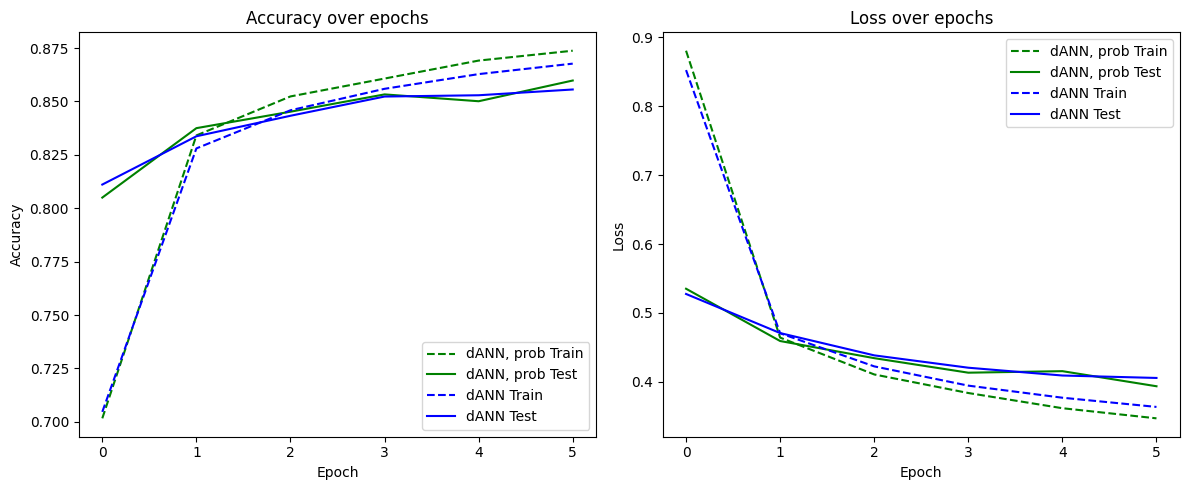

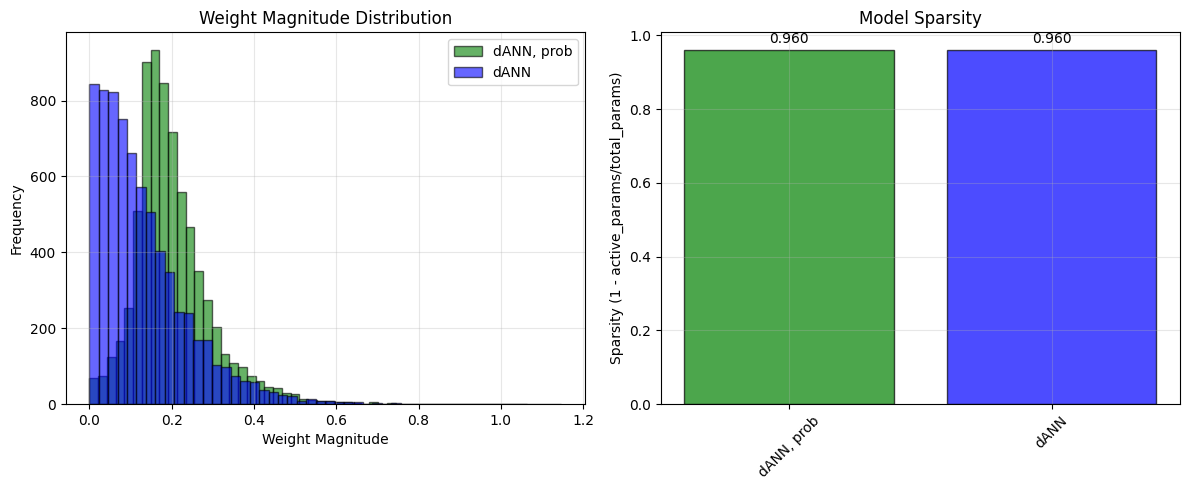


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3471       0.3937       87.4       % 86.0       %
dANN                 0.3636       0.4057       86.8       % 85.6       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.8,
            threshold_w=0.12,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   6%|▋         | 179/2820 [00:00<00:10, 258.66it/s, Epoch=1/12, Batch=179/235, Loss=0.4636]

num of dendrite successful swaps: 4221


Training :  11%|█         | 306/2820 [00:01<00:10, 244.31it/s, Epoch=2/12, Batch=73/235, Loss=0.3993] 

num of dendrite successful swaps: 2834


Training :  15%|█▌        | 435/2820 [00:01<00:09, 259.54it/s, Epoch=2/12, Batch=202/235, Loss=0.4485]

num of dendrite successful swaps: 2029


Training :  20%|█▉        | 563/2820 [00:02<00:08, 254.16it/s, Epoch=3/12, Batch=96/235, Loss=0.4626] 

num of dendrite successful swaps: 1681


Training :  24%|██▍       | 690/2820 [00:02<00:08, 257.97it/s, Epoch=3/12, Batch=223/235, Loss=0.4187]

num of dendrite successful swaps: 1394


Training :  29%|██▉       | 818/2820 [00:03<00:07, 254.55it/s, Epoch=4/12, Batch=117/235, Loss=0.3569]

num of dendrite successful swaps: 1231


Training :  33%|███▎      | 938/2820 [00:03<00:07, 257.69it/s, Epoch=5/12, Batch=3/235, Loss=0.4635]  

num of dendrite successful swaps: 1037


Training :  38%|███▊      | 1074/2820 [00:04<00:06, 254.73it/s, Epoch=5/12, Batch=139/235, Loss=0.3566]

num of dendrite successful swaps: 973


Training :  42%|████▏     | 1195/2820 [00:04<00:06, 240.06it/s, Epoch=6/12, Batch=26/235, Loss=0.3366] 

num of dendrite successful swaps: 856


Training :  47%|████▋     | 1329/2820 [00:05<00:05, 253.61it/s, Epoch=6/12, Batch=160/235, Loss=0.3868]

num of dendrite successful swaps: 848


Training :  52%|█████▏    | 1457/2820 [00:05<00:05, 244.71it/s, Epoch=7/12, Batch=54/235, Loss=0.3055] 

num of dendrite successful swaps: 764


Training :  56%|█████▌    | 1586/2820 [00:06<00:04, 253.81it/s, Epoch=7/12, Batch=183/235, Loss=0.3370]

num of dendrite successful swaps: 740


Training :  61%|██████    | 1715/2820 [00:06<00:04, 248.64it/s, Epoch=8/12, Batch=78/235, Loss=0.3323] 

num of dendrite successful swaps: 685


Training :  65%|██████▌   | 1843/2820 [00:07<00:03, 260.45it/s, Epoch=8/12, Batch=206/235, Loss=0.3774]

num of dendrite successful swaps: 639


Training :  70%|██████▉   | 1970/2820 [00:07<00:03, 252.23it/s, Epoch=9/12, Batch=99/235, Loss=0.3348] 

num of dendrite successful swaps: 634


Training :  74%|███████▍  | 2098/2820 [00:08<00:02, 258.36it/s, Epoch=9/12, Batch=227/235, Loss=0.3061]

num of dendrite successful swaps: 591


Training :  79%|███████▉  | 2227/2820 [00:08<00:02, 253.16it/s, Epoch=10/12, Batch=122/235, Loss=0.2879]

num of dendrite successful swaps: 578


Training :  83%|████████▎ | 2347/2820 [00:09<00:01, 259.94it/s, Epoch=11/12, Batch=8/235, Loss=0.3312]  

num of dendrite successful swaps: 543


Training :  88%|████████▊ | 2483/2820 [00:09<00:01, 256.90it/s, Epoch=11/12, Batch=144/235, Loss=0.2810]

num of dendrite successful swaps: 535


Training :  92%|█████████▏| 2603/2820 [00:10<00:00, 248.67it/s, Epoch=12/12, Batch=30/235, Loss=0.2960] 

num of dendrite successful swaps: 515


Training :  97%|█████████▋| 2739/2820 [00:10<00:00, 260.46it/s, Epoch=12/12, Batch=166/235, Loss=0.3486]

num of dendrite successful swaps: 536


Training : 100%|█████████▉| 2808/2820 [00:11<00:00, 252.14it/s, Epoch=12/12, Batch=234/235, Loss=0.3008]


Number of mask updates: 22
Train loss dANN, prob model: 0.2996
Train accuracy dANN, prob model: 88.9%
Test accuracy dANN, prob model: 86.9%

Training dANN model...


Training : 100%|█████████▉| 2808/2820 [00:11<00:00, 251.62it/s, Epoch=12/12, Batch=234/235, Loss=0.2906]


Number of mask updates: 1
Train loss dANN model: 0.3181
Train accuracy dANN model: 88.4%
Test accuracy dANN model: 86.5%


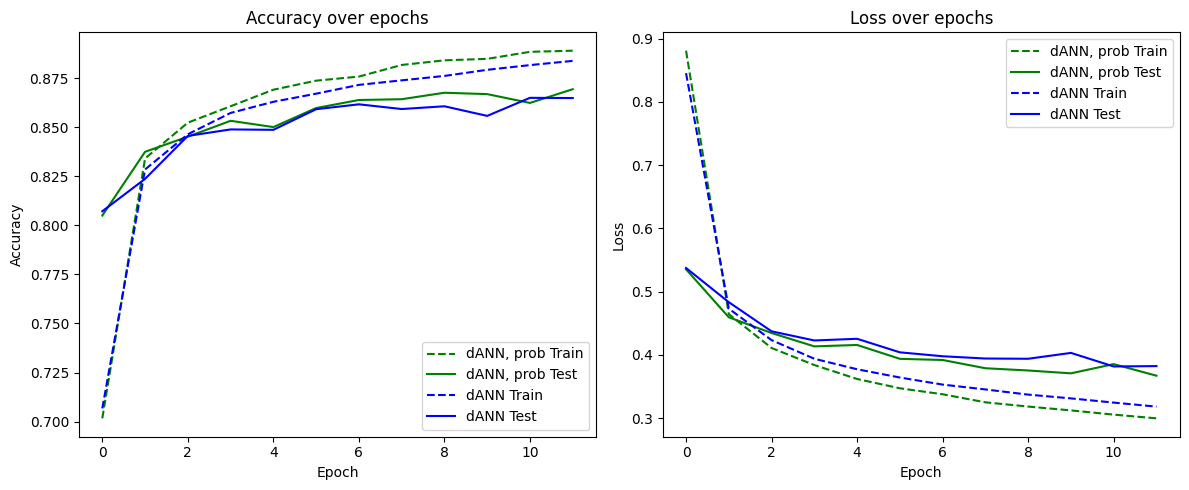

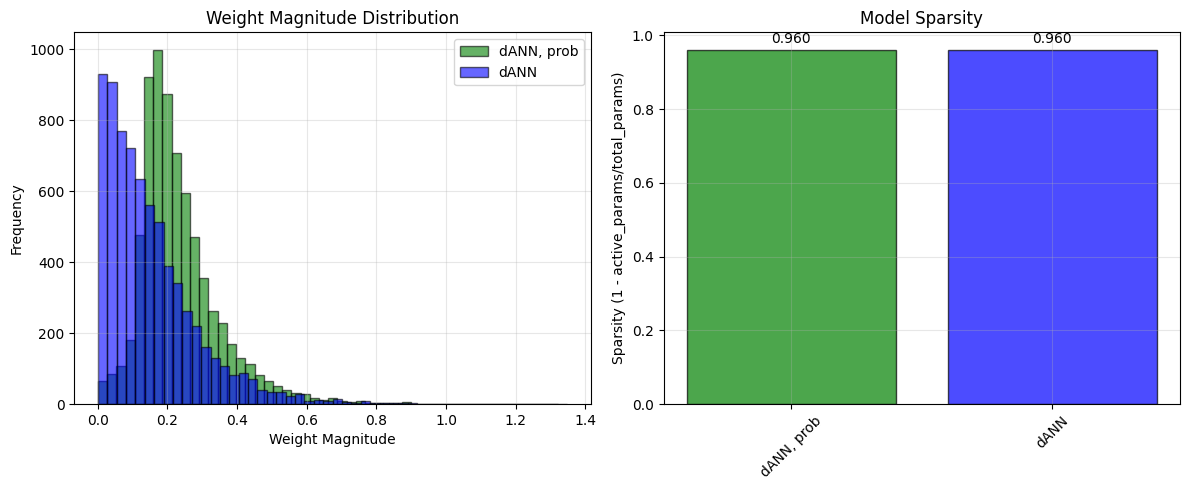


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.2996       0.3670       88.9       % 86.9       %
dANN                 0.3181       0.3822       88.4       % 86.5       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 12  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.8,
            threshold_w=0.12,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   6%|▋         | 177/2820 [00:00<00:10, 250.03it/s, Epoch=1/12, Batch=178/235, Loss=0.8391]

num of dendrite successful swaps: 4832


Training :  11%|█         | 303/2820 [00:01<00:10, 236.92it/s, Epoch=2/12, Batch=70/235, Loss=0.5798] 

num of dendrite successful swaps: 2997


Training :  15%|█▌        | 434/2820 [00:01<00:09, 252.88it/s, Epoch=2/12, Batch=201/235, Loss=0.3853]

num of dendrite successful swaps: 2231


Training :  20%|█▉        | 562/2820 [00:02<00:09, 247.52it/s, Epoch=3/12, Batch=95/235, Loss=0.4627] 

num of dendrite successful swaps: 1683


Training :  24%|██▍       | 690/2820 [00:02<00:08, 258.39it/s, Epoch=3/12, Batch=223/235, Loss=0.4007]

num of dendrite successful swaps: 1343


Training :  29%|██▉       | 816/2820 [00:03<00:08, 247.07it/s, Epoch=4/12, Batch=115/235, Loss=0.4668]

num of dendrite successful swaps: 1093


Training :  33%|███▎      | 937/2820 [00:03<00:07, 253.28it/s, Epoch=5/12, Batch=2/235, Loss=0.3257]  

num of dendrite successful swaps: 941


Training :  38%|███▊      | 1074/2820 [00:04<00:06, 253.08it/s, Epoch=5/12, Batch=139/235, Loss=0.4309]

num of dendrite successful swaps: 846


Training :  42%|████▏     | 1195/2820 [00:04<00:06, 234.68it/s, Epoch=6/12, Batch=25/235, Loss=0.3829] 

num of dendrite successful swaps: 768


Training :  47%|████▋     | 1331/2820 [00:05<00:05, 257.41it/s, Epoch=6/12, Batch=162/235, Loss=0.3619]

num of dendrite successful swaps: 715


Training :  52%|█████▏    | 1459/2820 [00:05<00:05, 242.08it/s, Epoch=7/12, Batch=56/235, Loss=0.3575] 

num of dendrite successful swaps: 680


Training :  56%|█████▌    | 1585/2820 [00:06<00:04, 250.76it/s, Epoch=7/12, Batch=182/235, Loss=0.3559]

num of dendrite successful swaps: 619


Training :  61%|██████    | 1714/2820 [00:06<00:04, 246.92it/s, Epoch=8/12, Batch=77/235, Loss=0.3748] 

num of dendrite successful swaps: 628


Training :  65%|██████▌   | 1842/2820 [00:07<00:03, 256.60it/s, Epoch=8/12, Batch=205/235, Loss=0.3430]

num of dendrite successful swaps: 567


Training :  70%|██████▉   | 1970/2820 [00:07<00:03, 250.97it/s, Epoch=9/12, Batch=99/235, Loss=0.4328] 

num of dendrite successful swaps: 590


Training :  74%|███████▍  | 2099/2820 [00:08<00:02, 260.43it/s, Epoch=9/12, Batch=228/235, Loss=0.3987]

num of dendrite successful swaps: 535


Training :  79%|███████▉  | 2226/2820 [00:08<00:02, 253.50it/s, Epoch=10/12, Batch=121/235, Loss=0.3242]

num of dendrite successful swaps: 559


Training :  83%|████████▎ | 2347/2820 [00:09<00:01, 259.41it/s, Epoch=11/12, Batch=8/235, Loss=0.3145]  

num of dendrite successful swaps: 520


Training :  88%|████████▊ | 2481/2820 [00:09<00:01, 252.06it/s, Epoch=11/12, Batch=142/235, Loss=0.2959]

num of dendrite successful swaps: 506


Training :  92%|█████████▏| 2602/2820 [00:10<00:00, 237.67it/s, Epoch=12/12, Batch=29/235, Loss=0.2642] 

num of dendrite successful swaps: 484


Training :  97%|█████████▋| 2738/2820 [00:10<00:00, 257.52it/s, Epoch=12/12, Batch=165/235, Loss=0.3212]

num of dendrite successful swaps: 465


Training : 100%|█████████▉| 2808/2820 [00:11<00:00, 249.11it/s, Epoch=12/12, Batch=234/235, Loss=0.3100]


Number of mask updates: 22
Train loss dANN, prob model: 0.3283
Train accuracy dANN, prob model: 87.9%
Test accuracy dANN, prob model: 86.4%

Training dANN model...


Training : 100%|█████████▉| 2808/2820 [00:11<00:00, 248.23it/s, Epoch=12/12, Batch=234/235, Loss=0.3919]


Number of mask updates: 1
Train loss dANN model: 0.347
Train accuracy dANN model: 87.6%
Test accuracy dANN model: 86.0%


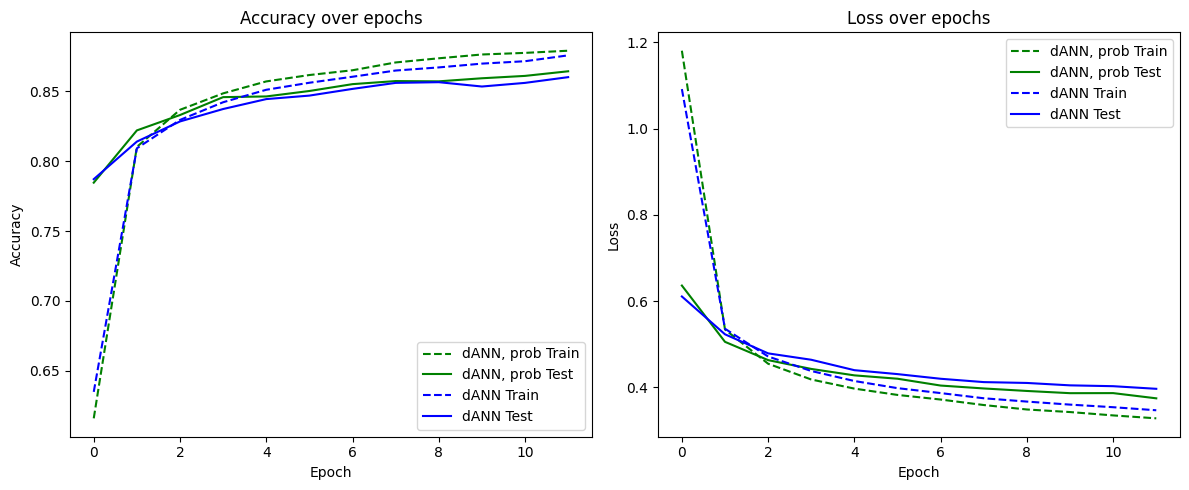

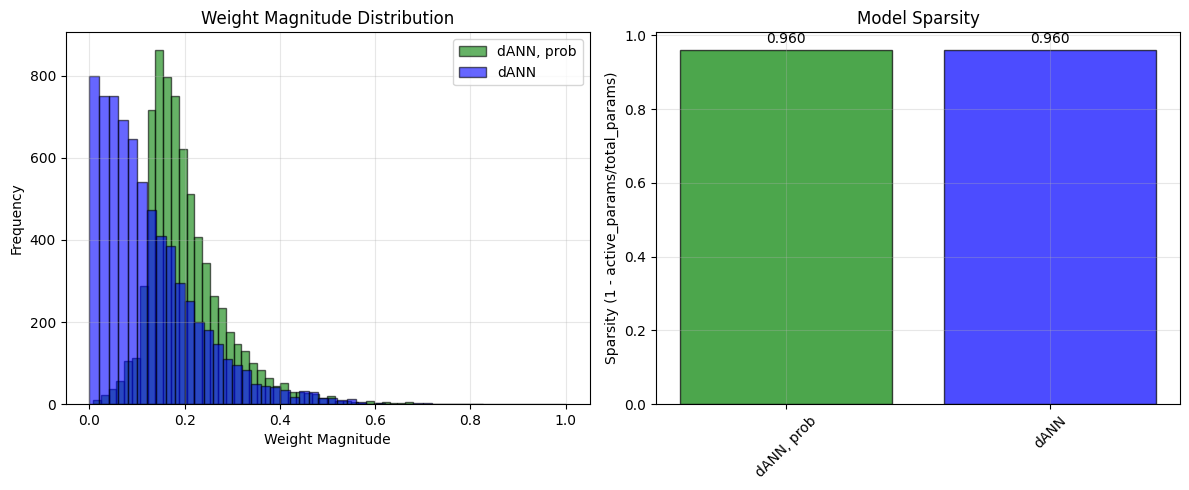


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3283       0.3747       87.9       % 86.4       %
dANN                 0.3470       0.3968       87.6       % 86.0       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 12  # 15 MNIST, 20 Fashion-MNIST
lr = 0.001  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.8,
            threshold_w=0.12,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Restarted .venv (Python 3.12.9)

Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  11%|█         | 174/1645 [00:00<00:06, 240.46it/s, Epoch=1/7, Batch=175/235, Loss=0.5593]

num of dendrite successful swaps: 2826


Training :  19%|█▊        | 306/1645 [00:01<00:05, 246.39it/s, Epoch=2/7, Batch=73/235, Loss=0.5036] 

num of dendrite successful swaps: 2032


Training :  26%|██▋       | 432/1645 [00:01<00:04, 251.03it/s, Epoch=2/7, Batch=199/235, Loss=0.4313]

num of dendrite successful swaps: 1577


Training :  34%|███▍      | 562/1645 [00:02<00:04, 249.83it/s, Epoch=3/7, Batch=95/235, Loss=0.4421] 

num of dendrite successful swaps: 1307


Training :  42%|████▏     | 686/1645 [00:02<00:03, 245.11it/s, Epoch=3/7, Batch=219/235, Loss=0.3499]

num of dendrite successful swaps: 1095


Training :  50%|████▉     | 817/1645 [00:03<00:03, 241.61it/s, Epoch=4/7, Batch=116/235, Loss=0.4320]

num of dendrite successful swaps: 927


Training :  57%|█████▋    | 938/1645 [00:03<00:02, 254.62it/s, Epoch=5/7, Batch=3/235, Loss=0.4615]  

num of dendrite successful swaps: 850


Training :  65%|██████▌   | 1073/1645 [00:04<00:02, 247.61it/s, Epoch=5/7, Batch=138/235, Loss=0.3508]

num of dendrite successful swaps: 771


Training :  73%|███████▎  | 1194/1645 [00:04<00:01, 233.72it/s, Epoch=6/7, Batch=25/235, Loss=0.3086] 

num of dendrite successful swaps: 746


Training :  81%|████████  | 1330/1645 [00:05<00:01, 250.91it/s, Epoch=6/7, Batch=161/235, Loss=0.3926]

num of dendrite successful swaps: 662


Training :  89%|████████▊ | 1458/1645 [00:06<00:00, 243.64it/s, Epoch=7/7, Batch=55/235, Loss=0.2839] 

num of dendrite successful swaps: 608


Training :  96%|█████████▋| 1586/1645 [00:06<00:00, 256.67it/s, Epoch=7/7, Batch=183/235, Loss=0.4005]

num of dendrite successful swaps: 575


Training : 100%|█████████▉| 1638/1645 [00:06<00:00, 243.19it/s, Epoch=7/7, Batch=234/235, Loss=0.2975]


Number of mask updates: 13
Train loss dANN, prob model: 0.3463
Train accuracy dANN, prob model: 87.3%
Test accuracy dANN, prob model: 86.1%

Training dANN model...


Training : 100%|█████████▉| 1638/1645 [00:06<00:00, 245.79it/s, Epoch=7/7, Batch=234/235, Loss=0.3435]


Number of mask updates: 1
Train loss dANN model: 0.3496
Train accuracy dANN model: 87.3%
Test accuracy dANN model: 85.7%


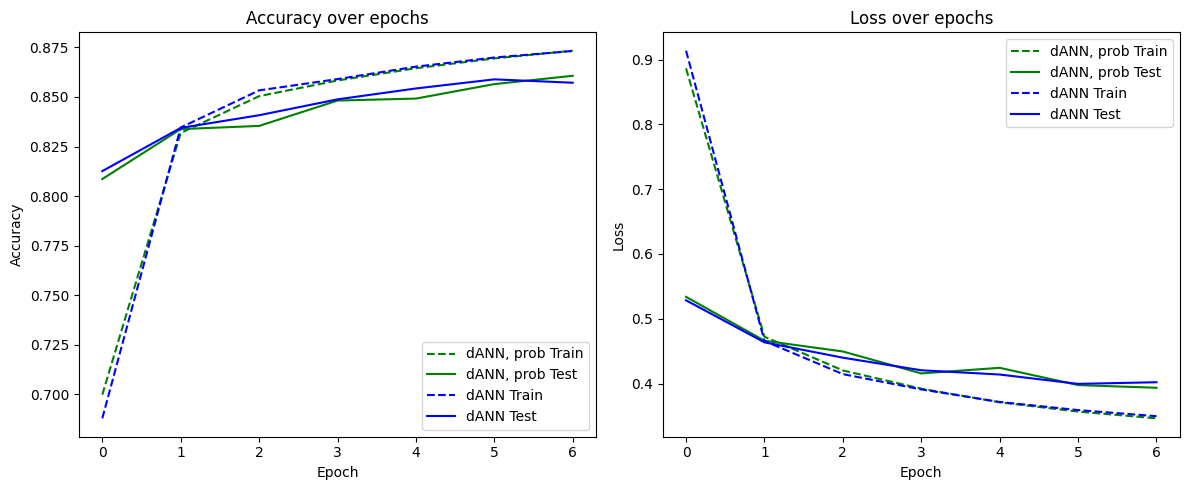

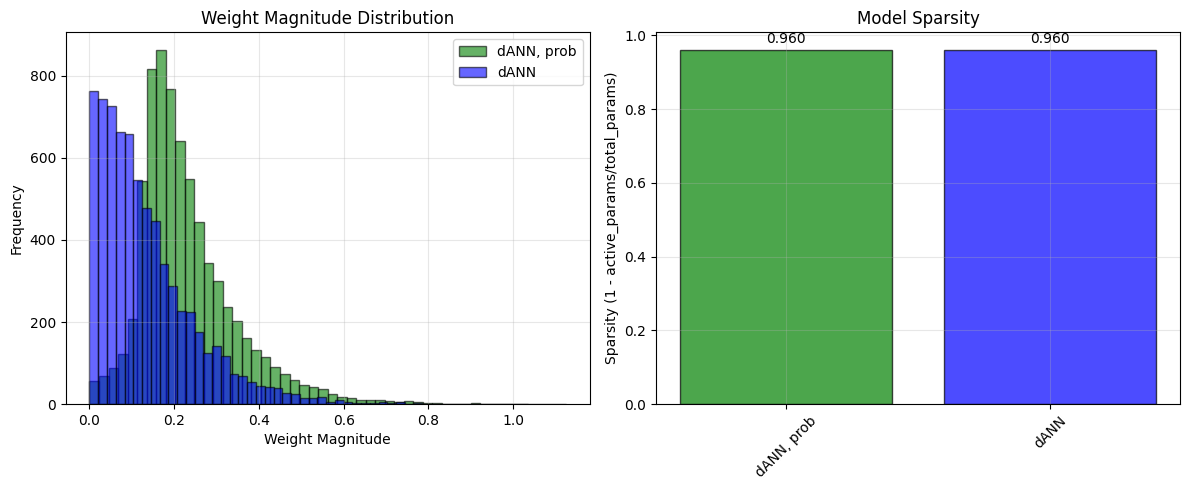


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3463       0.3935       87.3       % 86.1       %
dANN                 0.3496       0.4020       87.3       % 85.7       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 7  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.8,
            threshold_w=0.12,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 258.07it/s, Epoch=1/6, Batch=179/235, Loss=0.5305]

num of dendrite successful swaps: 3334


Training :  22%|██▏       | 307/1410 [00:01<00:04, 247.16it/s, Epoch=2/6, Batch=73/235, Loss=0.5895] 

num of dendrite successful swaps: 2207


Training :  31%|███       | 434/1410 [00:01<00:03, 256.18it/s, Epoch=2/6, Batch=201/235, Loss=0.4558]

num of dendrite successful swaps: 1706


Training :  40%|███▉      | 563/1410 [00:02<00:03, 249.94it/s, Epoch=3/6, Batch=96/235, Loss=0.4957] 

num of dendrite successful swaps: 1365


Training :  49%|████▉     | 688/1410 [00:02<00:02, 253.05it/s, Epoch=3/6, Batch=221/235, Loss=0.3831]

num of dendrite successful swaps: 1121


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 252.44it/s, Epoch=4/6, Batch=117/235, Loss=0.4092]

num of dendrite successful swaps: 964


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 255.76it/s, Epoch=5/6, Batch=3/235, Loss=0.4432]  

num of dendrite successful swaps: 904


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 252.91it/s, Epoch=5/6, Batch=139/235, Loss=0.5184]

num of dendrite successful swaps: 822


Training :  85%|████████▍ | 1195/1410 [00:04<00:00, 239.63it/s, Epoch=6/6, Batch=26/235, Loss=0.2930] 

num of dendrite successful swaps: 755


Training :  94%|█████████▍| 1327/1410 [00:05<00:00, 251.86it/s, Epoch=6/6, Batch=158/235, Loss=0.4973]

num of dendrite successful swaps: 703


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 249.18it/s, Epoch=6/6, Batch=234/235, Loss=0.4019]


Number of mask updates: 11
Train loss dANN, prob model: 0.3573
Train accuracy dANN, prob model: 87.0%
Test accuracy dANN, prob model: 85.6%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 246.01it/s, Epoch=6/6, Batch=234/235, Loss=0.3423]


Number of mask updates: 1
Train loss dANN model: 0.3608
Train accuracy dANN model: 86.9%
Test accuracy dANN model: 86.1%


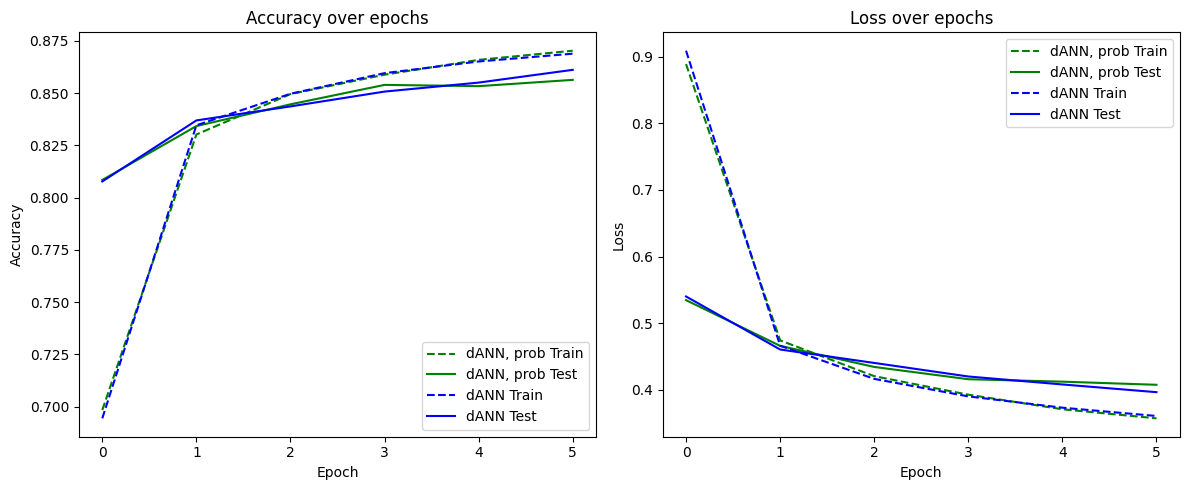

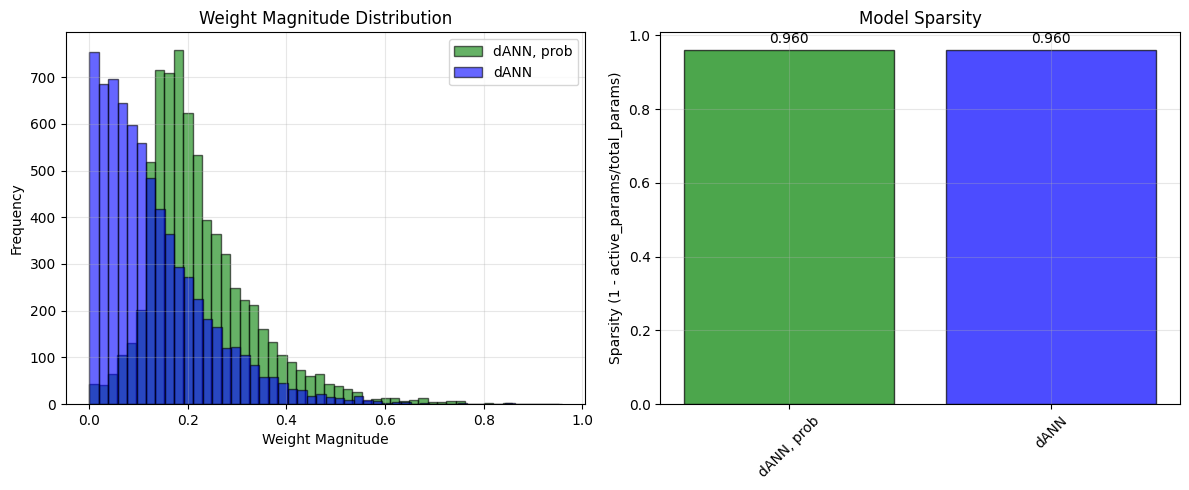


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3573       0.4076       87.0       % 85.6       %
dANN                 0.3608       0.3965       86.9       % 86.1       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.12,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.12,
            steepness=0.05,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 179/1410 [00:00<00:04, 258.88it/s, Epoch=1/6, Batch=180/235, Loss=0.4897]

num of dendrite successful swaps: 3223


Training :  22%|██▏       | 307/1410 [00:01<00:04, 246.65it/s, Epoch=2/6, Batch=74/235, Loss=0.4607] 

num of dendrite successful swaps: 2698


Training :  31%|███       | 434/1410 [00:01<00:03, 260.26it/s, Epoch=2/6, Batch=201/235, Loss=0.4358]

num of dendrite successful swaps: 2613


Training :  40%|███▉      | 563/1410 [00:02<00:03, 254.78it/s, Epoch=3/6, Batch=96/235, Loss=0.4225] 

num of dendrite successful swaps: 2489


Training :  49%|████▉     | 690/1410 [00:02<00:02, 259.56it/s, Epoch=3/6, Batch=223/235, Loss=0.4698]

num of dendrite successful swaps: 2434


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 252.12it/s, Epoch=4/6, Batch=117/235, Loss=0.3826]

num of dendrite successful swaps: 2363


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 262.66it/s, Epoch=5/6, Batch=3/235, Loss=0.4030]  

num of dendrite successful swaps: 2282


Training :  76%|███████▌  | 1072/1410 [00:04<00:01, 246.76it/s, Epoch=5/6, Batch=137/235, Loss=0.4293]

num of dendrite successful swaps: 2278


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 235.42it/s, Epoch=6/6, Batch=25/235, Loss=0.4143] 

num of dendrite successful swaps: 2215


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 254.28it/s, Epoch=6/6, Batch=161/235, Loss=0.4008]

num of dendrite successful swaps: 2235


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 250.65it/s, Epoch=6/6, Batch=234/235, Loss=0.3218]


Number of mask updates: 11
Train loss dANN, prob model: 0.3754
Train accuracy dANN, prob model: 86.3%
Test accuracy dANN, prob model: 85.1%

Training dANN model...


Training :  43%|████▎     | 611/1410 [00:02<00:03, 251.63it/s, Epoch=3/6, Batch=143/235, Loss=0.3775]


KeyboardInterrupt: 

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 248.94it/s, Epoch=1/6, Batch=179/235, Loss=0.5544]

num of dendrite successful swaps: 3333


Training :  21%|██▏       | 301/1410 [00:01<00:04, 233.20it/s, Epoch=2/6, Batch=68/235, Loss=0.3968] 

num of dendrite successful swaps: 2386


Training :  30%|███       | 430/1410 [00:01<00:04, 234.09it/s, Epoch=2/6, Batch=197/235, Loss=0.3456]

num of dendrite successful swaps: 1862


Training :  40%|███▉      | 559/1410 [00:02<00:03, 232.94it/s, Epoch=3/6, Batch=92/235, Loss=0.4488] 

num of dendrite successful swaps: 1605


Training :  49%|████▉     | 690/1410 [00:02<00:02, 252.93it/s, Epoch=3/6, Batch=223/235, Loss=0.3666]

num of dendrite successful swaps: 1388


Training :  58%|█████▊    | 817/1410 [00:03<00:02, 247.43it/s, Epoch=4/6, Batch=116/235, Loss=0.3961]

num of dendrite successful swaps: 1257


Training :  67%|██████▋   | 939/1410 [00:03<00:01, 259.72it/s, Epoch=5/6, Batch=4/235, Loss=0.3247]  

num of dendrite successful swaps: 1148


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 256.40it/s, Epoch=5/6, Batch=139/235, Loss=0.3754]

num of dendrite successful swaps: 1062


Training :  85%|████████▍ | 1193/1410 [00:04<00:00, 228.24it/s, Epoch=6/6, Batch=24/235, Loss=0.3247] 

num of dendrite successful swaps: 997


Training :  94%|█████████▍| 1329/1410 [00:05<00:00, 252.97it/s, Epoch=6/6, Batch=160/235, Loss=0.4844]

num of dendrite successful swaps: 988


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 242.44it/s, Epoch=6/6, Batch=234/235, Loss=0.2878]


Number of mask updates: 11
Train loss dANN, prob model: 0.3634
Train accuracy dANN, prob model: 86.8%
Test accuracy dANN, prob model: 85.4%


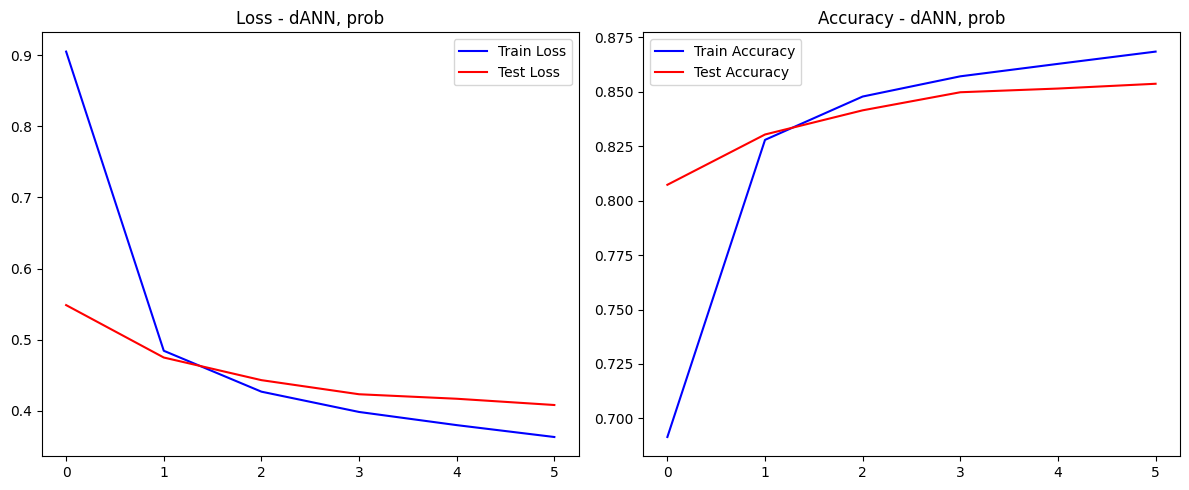


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.363
Test loss: 0.408
Train accuracy: 0.868
Test accuracy: 0.854


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.95,
            threshold_w=0.15,
            steepness=0.01,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 179/1410 [00:00<00:04, 257.90it/s, Epoch=1/6, Batch=180/235, Loss=0.4804]

num of dendrite successful swaps: 3050


Training :  22%|██▏       | 306/1410 [00:01<00:04, 246.51it/s, Epoch=2/6, Batch=73/235, Loss=0.4978] 

num of dendrite successful swaps: 2137


Training :  30%|███       | 430/1410 [00:01<00:03, 249.79it/s, Epoch=2/6, Batch=197/235, Loss=0.4363]

num of dendrite successful swaps: 1660


Training :  40%|███▉      | 561/1410 [00:02<00:03, 245.28it/s, Epoch=3/6, Batch=94/235, Loss=0.4164] 

num of dendrite successful swaps: 1421


Training :  49%|████▊     | 686/1410 [00:02<00:03, 240.18it/s, Epoch=3/6, Batch=219/235, Loss=0.4277]

num of dendrite successful swaps: 1255


Training :  58%|█████▊    | 814/1410 [00:03<00:02, 235.10it/s, Epoch=4/6, Batch=113/235, Loss=0.4167]

num of dendrite successful swaps: 1127


Training :  66%|██████▋   | 935/1410 [00:03<00:01, 241.79it/s, Epoch=4/6, Batch=234/235, Loss=0.4295]

num of dendrite successful swaps: 1014


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 244.38it/s, Epoch=5/6, Batch=139/235, Loss=0.3920]

num of dendrite successful swaps: 945


Training :  84%|████████▍ | 1191/1410 [00:04<00:00, 220.67it/s, Epoch=6/6, Batch=22/235, Loss=0.2917] 

num of dendrite successful swaps: 907


Training :  94%|█████████▍| 1329/1410 [00:05<00:00, 249.66it/s, Epoch=6/6, Batch=160/235, Loss=0.3712]

num of dendrite successful swaps: 827


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 242.00it/s, Epoch=6/6, Batch=234/235, Loss=0.2950]


Number of mask updates: 11
Train loss dANN, prob model: 0.3552
Train accuracy dANN, prob model: 86.9%
Test accuracy dANN, prob model: 85.7%


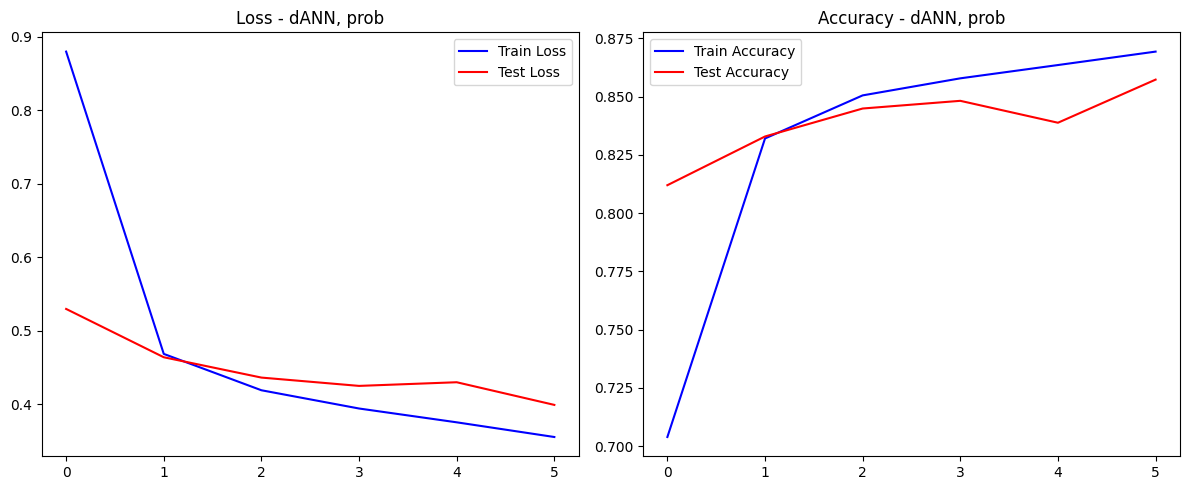


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.355
Test loss: 0.399
Train accuracy: 0.869
Test accuracy: 0.857


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.9,
            threshold_w=0.1,
            steepness=0.01,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 253.65it/s, Epoch=1/6, Batch=179/235, Loss=0.5057]

num of dendrite successful swaps: 3050


Training :  22%|██▏       | 307/1410 [00:01<00:04, 247.65it/s, Epoch=2/6, Batch=73/235, Loss=0.4978] 

num of dendrite successful swaps: 2137


Training :  31%|███       | 435/1410 [00:01<00:03, 256.68it/s, Epoch=2/6, Batch=202/235, Loss=0.4583]

num of dendrite successful swaps: 1660


Training :  40%|███▉      | 561/1410 [00:02<00:03, 246.33it/s, Epoch=3/6, Batch=94/235, Loss=0.4164] 

num of dendrite successful swaps: 1421


Training :  49%|████▉     | 690/1410 [00:02<00:02, 259.71it/s, Epoch=3/6, Batch=223/235, Loss=0.4535]

num of dendrite successful swaps: 1255


Training :  58%|█████▊    | 816/1410 [00:03<00:02, 248.69it/s, Epoch=4/6, Batch=115/235, Loss=0.3358]

num of dendrite successful swaps: 1127


Training :  66%|██████▋   | 937/1410 [00:03<00:01, 249.93it/s, Epoch=5/6, Batch=2/235, Loss=0.4229]  

num of dendrite successful swaps: 1014


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 243.71it/s, Epoch=5/6, Batch=139/235, Loss=0.3920]

num of dendrite successful swaps: 945


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 254.82it/s, Epoch=6/6, Batch=25/235, Loss=0.3541] 

num of dendrite successful swaps: 907


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 254.42it/s, Epoch=6/6, Batch=161/235, Loss=0.3581]

num of dendrite successful swaps: 827


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 246.76it/s, Epoch=6/6, Batch=234/235, Loss=0.2950]


Number of mask updates: 11
Train loss dANN, prob model: 0.3552
Train accuracy dANN, prob model: 86.9%
Test accuracy dANN, prob model: 85.7%


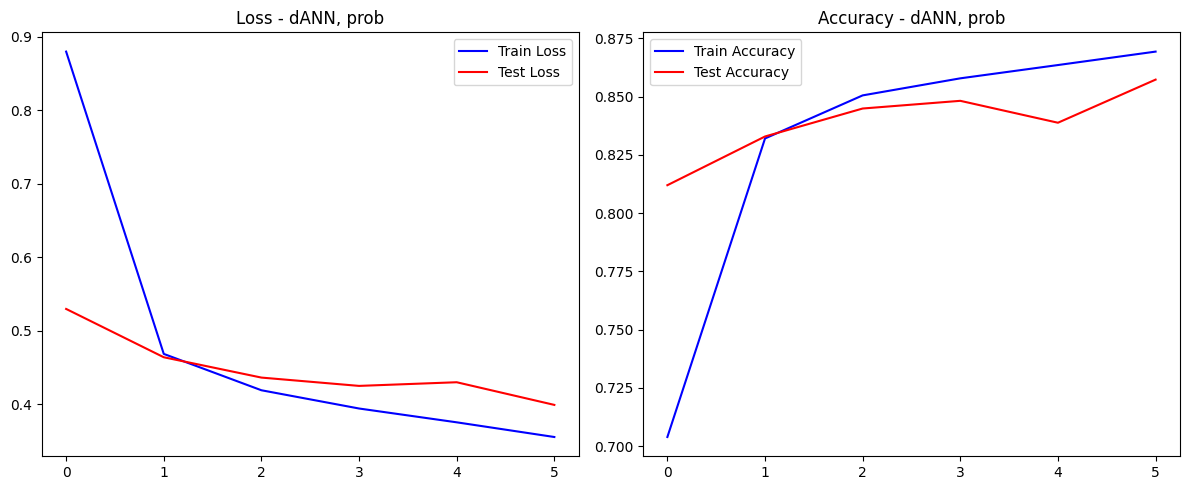


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.355
Test loss: 0.399
Train accuracy: 0.869
Test accuracy: 0.857


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.9,
            threshold_w=0.1,
            steepness=0.01,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f23e0e6df70>>
Traceback (most recent call last):
  File "/home/luca/Coding/projects/dendritic-computation/.venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 177/1410 [00:00<00:04, 248.66it/s, Epoch=1/6, Batch=178/235, Loss=0.5733]

num of dendrite successful swaps: 3068


Training :  22%|██▏       | 307/1410 [00:01<00:04, 251.11it/s, Epoch=2/6, Batch=74/235, Loss=0.4230] 

num of dendrite successful swaps: 2071


Training :  31%|███       | 434/1410 [00:01<00:03, 258.31it/s, Epoch=2/6, Batch=201/235, Loss=0.4784]

num of dendrite successful swaps: 1553


Training :  40%|███▉      | 562/1410 [00:02<00:03, 249.21it/s, Epoch=3/6, Batch=95/235, Loss=0.3803] 

num of dendrite successful swaps: 1271


Training :  49%|████▉     | 690/1410 [00:02<00:02, 258.31it/s, Epoch=3/6, Batch=223/235, Loss=0.4451]

num of dendrite successful swaps: 1039


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 250.18it/s, Epoch=4/6, Batch=117/235, Loss=0.4056]

num of dendrite successful swaps: 876


Training :  66%|██████▋   | 937/1410 [00:03<00:01, 252.19it/s, Epoch=5/6, Batch=2/235, Loss=0.3604]  

num of dendrite successful swaps: 779


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 253.40it/s, Epoch=5/6, Batch=139/235, Loss=0.3444]

num of dendrite successful swaps: 724


Training :  85%|████████▍ | 1193/1410 [00:04<00:00, 232.98it/s, Epoch=6/6, Batch=24/235, Loss=0.4908] 

num of dendrite successful swaps: 655


Training :  94%|█████████▍| 1329/1410 [00:05<00:00, 252.92it/s, Epoch=6/6, Batch=160/235, Loss=0.3294]

num of dendrite successful swaps: 662


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 247.98it/s, Epoch=6/6, Batch=234/235, Loss=0.3088]


Number of mask updates: 11
Train loss dANN, prob model: 0.3563
Train accuracy dANN, prob model: 87.1%
Test accuracy dANN, prob model: 85.4%


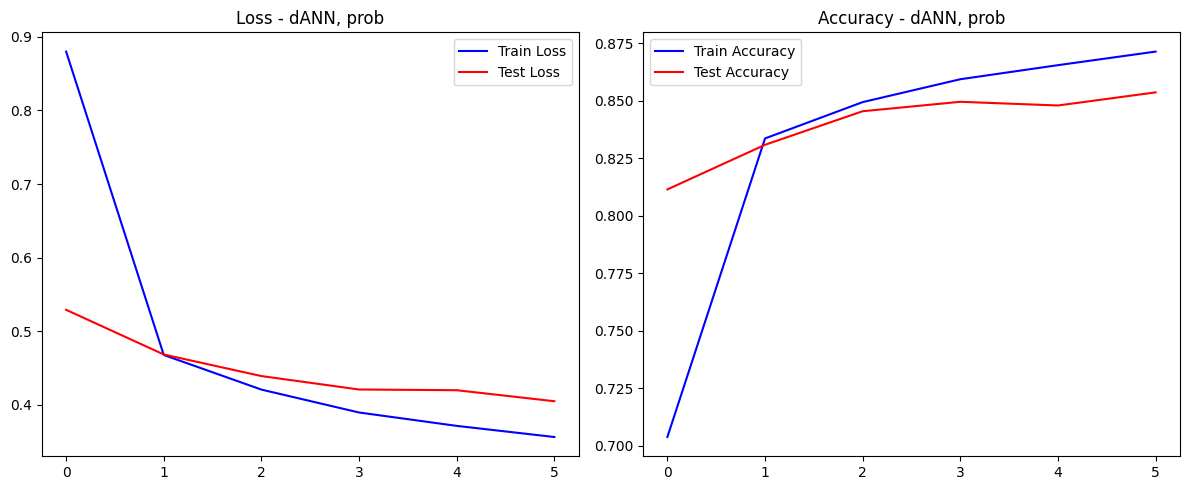


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.356
Test loss: 0.405
Train accuracy: 0.871
Test accuracy: 0.854


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.9,
            threshold_w=0.1,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   8%|▊         | 109/1410 [00:00<00:05, 230.44it/s, Epoch=1/6, Batch=110/235, Loss=0.6814]

num of dendrite successful swaps: 2831


Training :  13%|█▎        | 177/1410 [00:00<00:04, 246.93it/s, Epoch=1/6, Batch=178/235, Loss=0.5648]

num of dendrite successful swaps: 2080


Training :  17%|█▋        | 233/1410 [00:00<00:04, 247.39it/s, Epoch=1/6, Batch=234/235, Loss=0.5983]

num of dendrite successful swaps: 1568


Training :  22%|██▏       | 307/1410 [00:01<00:04, 246.56it/s, Epoch=2/6, Batch=74/235, Loss=0.5761] 

num of dendrite successful swaps: 1254


Training :  26%|██▌       | 370/1410 [00:01<00:04, 250.99it/s, Epoch=2/6, Batch=137/235, Loss=0.5137]

num of dendrite successful swaps: 1045


Training :  31%|███       | 433/1410 [00:01<00:03, 253.14it/s, Epoch=2/6, Batch=200/235, Loss=0.5243]

num of dendrite successful swaps: 910


Training :  35%|███▍      | 489/1410 [00:02<00:03, 231.30it/s, Epoch=3/6, Batch=22/235, Loss=0.4075] 

num of dendrite successful swaps: 798


Training :  40%|███▉      | 559/1410 [00:02<00:03, 241.75it/s, Epoch=3/6, Batch=92/235, Loss=0.4279]

num of dendrite successful swaps: 719


Training :  44%|████▍     | 626/1410 [00:02<00:03, 244.74it/s, Epoch=3/6, Batch=159/235, Loss=0.3650]

num of dendrite successful swaps: 644


Training :  49%|████▉     | 689/1410 [00:02<00:02, 253.48it/s, Epoch=3/6, Batch=222/235, Loss=0.4076]

num of dendrite successful swaps: 580


Training :  53%|█████▎    | 753/1410 [00:03<00:02, 238.83it/s, Epoch=4/6, Batch=52/235, Loss=0.3568] 

num of dendrite successful swaps: 521


Training :  58%|█████▊    | 816/1410 [00:03<00:02, 245.40it/s, Epoch=4/6, Batch=115/235, Loss=0.4243]

num of dendrite successful swaps: 507


Training :  62%|██████▏   | 881/1410 [00:03<00:02, 250.95it/s, Epoch=4/6, Batch=180/235, Loss=0.3583]

num of dendrite successful swaps: 491


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 252.98it/s, Epoch=5/6, Batch=3/235, Loss=0.3828]  

num of dendrite successful swaps: 494


Training :  72%|███████▏  | 1009/1410 [00:04<00:01, 242.52it/s, Epoch=5/6, Batch=74/235, Loss=0.3535]

num of dendrite successful swaps: 473


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 250.52it/s, Epoch=5/6, Batch=138/235, Loss=0.3476]

num of dendrite successful swaps: 403


Training :  81%|████████  | 1137/1410 [00:04<00:01, 253.46it/s, Epoch=5/6, Batch=202/235, Loss=0.4794]

num of dendrite successful swaps: 403


Training :  85%|████████▍ | 1192/1410 [00:04<00:00, 229.22it/s, Epoch=6/6, Batch=23/235, Loss=0.3249] 

num of dendrite successful swaps: 384


Training :  90%|████████▉ | 1264/1410 [00:05<00:00, 238.58it/s, Epoch=6/6, Batch=95/235, Loss=0.4122]

num of dendrite successful swaps: 358


Training :  94%|█████████▍| 1327/1410 [00:05<00:00, 241.73it/s, Epoch=6/6, Batch=158/235, Loss=0.3681]

num of dendrite successful swaps: 360


Training :  99%|█████████▉| 1393/1410 [00:05<00:00, 250.58it/s, Epoch=6/6, Batch=224/235, Loss=0.3714]

num of dendrite successful swaps: 354


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 242.34it/s, Epoch=6/6, Batch=234/235, Loss=0.3589]


Number of mask updates: 22
Train loss dANN, prob model: 0.3586
Train accuracy dANN, prob model: 86.9%
Test accuracy dANN, prob model: 84.9%


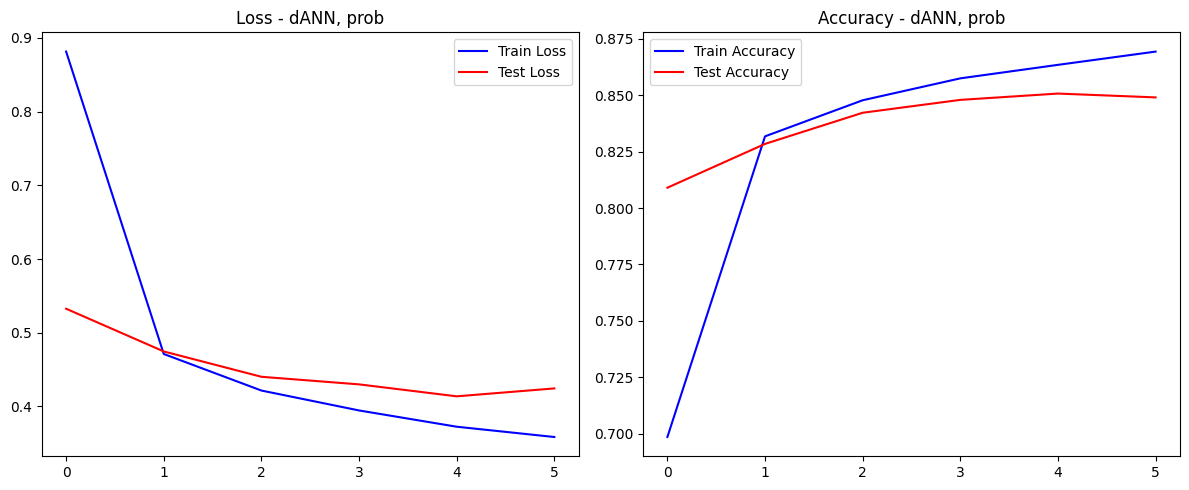


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.359
Test loss: 0.425
Train accuracy: 0.869
Test accuracy: 0.849


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=64,
            probabilistic_resampling=True,
            p_max_prune=0.8,
            threshold_w=0.12,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   3%|▎         | 40/1410 [00:00<00:08, 163.94it/s, Epoch=1/6, Batch=41/235, Loss=1.2404]

num of dendrite successful swaps: 2880
num of dendrite successful swaps: 2037


Training :   4%|▍         | 63/1410 [00:00<00:06, 214.68it/s, Epoch=1/6, Batch=64/235, Loss=1.0432]

num of dendrite successful swaps: 1536
num of dendrite successful swaps: 1350


Training :   7%|▋         | 94/1410 [00:00<00:05, 231.62it/s, Epoch=1/6, Batch=95/235, Loss=0.7622]

num of dendrite successful swaps: 1115
num of dendrite successful swaps: 957


Training :   9%|▊         | 123/1410 [00:00<00:05, 227.03it/s, Epoch=1/6, Batch=124/235, Loss=0.5945]

num of dendrite successful swaps: 790


Training :  11%|█         | 157/1410 [00:00<00:05, 226.96it/s, Epoch=1/6, Batch=158/235, Loss=0.6763]

num of dendrite successful swaps: 683
num of dendrite successful swaps: 618


Training :  12%|█▏        | 172/1410 [00:00<00:05, 230.19it/s, Epoch=1/6, Batch=173/235, Loss=0.5707]

num of dendrite successful swaps: 577


Training :  14%|█▍        | 203/1410 [00:00<00:05, 226.56it/s, Epoch=1/6, Batch=204/235, Loss=0.6031]

num of dendrite successful swaps: 512
num of dendrite successful swaps: 477


Training :  16%|█▌        | 220/1410 [00:00<00:05, 226.59it/s, Epoch=1/6, Batch=221/235, Loss=0.5005]

num of dendrite successful swaps: 457


Training :  18%|█▊        | 247/1410 [00:01<00:05, 212.98it/s, Epoch=2/6, Batch=14/235, Loss=0.4800] 

num of dendrite successful swaps: 394
num of dendrite successful swaps: 371


Training :  19%|█▊        | 264/1410 [00:01<00:05, 222.11it/s, Epoch=2/6, Batch=31/235, Loss=0.5904]

num of dendrite successful swaps: 334


Training :  21%|██▏       | 302/1410 [00:01<00:04, 225.53it/s, Epoch=2/6, Batch=69/235, Loss=0.4792]

num of dendrite successful swaps: 329
num of dendrite successful swaps: 309


Training :  23%|██▎       | 318/1410 [00:01<00:04, 231.58it/s, Epoch=2/6, Batch=85/235, Loss=0.4038]

num of dendrite successful swaps: 285


Training :  25%|██▍       | 349/1410 [00:01<00:04, 230.29it/s, Epoch=2/6, Batch=116/235, Loss=0.4403]

num of dendrite successful swaps: 275
num of dendrite successful swaps: 262


Training :  26%|██▌       | 366/1410 [00:01<00:04, 230.51it/s, Epoch=2/6, Batch=133/235, Loss=0.5351]

num of dendrite successful swaps: 247


Training :  28%|██▊       | 399/1410 [00:01<00:04, 238.34it/s, Epoch=2/6, Batch=166/235, Loss=0.4717]

num of dendrite successful swaps: 237
num of dendrite successful swaps: 237
num of dendrite successful swaps: 252


Training :  30%|██▉       | 416/1410 [00:01<00:04, 240.22it/s, Epoch=2/6, Batch=183/235, Loss=0.4105]

num of dendrite successful swaps: 231


Training :  33%|███▎      | 463/1410 [00:02<00:03, 243.78it/s, Epoch=2/6, Batch=230/235, Loss=0.4148]

num of dendrite successful swaps: 242
num of dendrite successful swaps: 230
num of dendrite successful swaps: 237


Training :  37%|███▋      | 528/1410 [00:02<00:03, 232.08it/s, Epoch=3/6, Batch=61/235, Loss=0.4048] 

num of dendrite successful swaps: 233
num of dendrite successful swaps: 215
num of dendrite successful swaps: 201
num of dendrite successful swaps: 207


Training :  42%|████▏     | 592/1410 [00:02<00:03, 243.75it/s, Epoch=3/6, Batch=125/235, Loss=0.4211]

num of dendrite successful swaps: 196
num of dendrite successful swaps: 182
num of dendrite successful swaps: 169
num of dendrite successful swaps: 177


Training :  47%|████▋     | 656/1410 [00:02<00:03, 248.79it/s, Epoch=3/6, Batch=189/235, Loss=0.4268]

num of dendrite successful swaps: 184
num of dendrite successful swaps: 193
num of dendrite successful swaps: 190
num of dendrite successful swaps: 190


Training :  51%|█████     | 713/1410 [00:03<00:02, 250.01it/s, Epoch=4/6, Batch=12/235, Loss=0.3627] 

num of dendrite successful swaps: 186
num of dendrite successful swaps: 168
num of dendrite successful swaps: 188


Training :  54%|█████▍    | 766/1410 [00:03<00:02, 234.50it/s, Epoch=4/6, Batch=65/235, Loss=0.3733]

num of dendrite successful swaps: 174
num of dendrite successful swaps: 167
num of dendrite successful swaps: 168


Training :  58%|█████▊    | 812/1410 [00:03<00:02, 232.76it/s, Epoch=4/6, Batch=111/235, Loss=0.4448]

num of dendrite successful swaps: 163
num of dendrite successful swaps: 163
num of dendrite successful swaps: 181


Training :  61%|██████    | 863/1410 [00:03<00:02, 240.43it/s, Epoch=4/6, Batch=162/235, Loss=0.4922]

num of dendrite successful swaps: 167
num of dendrite successful swaps: 166
num of dendrite successful swaps: 162
num of dendrite successful swaps: 168


Training :  66%|██████▌   | 926/1410 [00:03<00:02, 239.54it/s, Epoch=4/6, Batch=225/235, Loss=0.3958]

num of dendrite successful swaps: 161
num of dendrite successful swaps: 135
num of dendrite successful swaps: 140
num of dendrite successful swaps: 134


Training :  70%|███████   | 991/1410 [00:04<00:01, 234.23it/s, Epoch=5/6, Batch=56/235, Loss=0.4133] 

num of dendrite successful swaps: 126
num of dendrite successful swaps: 133
num of dendrite successful swaps: 147
num of dendrite successful swaps: 133


Training :  75%|███████▍  | 1056/1410 [00:04<00:01, 243.34it/s, Epoch=5/6, Batch=121/235, Loss=0.3631]

num of dendrite successful swaps: 123
num of dendrite successful swaps: 139
num of dendrite successful swaps: 129
num of dendrite successful swaps: 142


Training :  79%|███████▉  | 1120/1410 [00:04<00:01, 247.17it/s, Epoch=5/6, Batch=185/235, Loss=0.3627]

num of dendrite successful swaps: 139
num of dendrite successful swaps: 145
num of dendrite successful swaps: 147
num of dendrite successful swaps: 133


Training :  83%|████████▎ | 1176/1410 [00:05<00:00, 248.49it/s, Epoch=6/6, Batch=7/235, Loss=0.3234]  

num of dendrite successful swaps: 145
num of dendrite successful swaps: 150
num of dendrite successful swaps: 132


Training :  87%|████████▋ | 1231/1410 [00:05<00:00, 233.01it/s, Epoch=6/6, Batch=62/235, Loss=0.2772]

num of dendrite successful swaps: 150
num of dendrite successful swaps: 102
num of dendrite successful swaps: 115
num of dendrite successful swaps: 146


Training :  92%|█████████▏| 1295/1410 [00:05<00:00, 242.00it/s, Epoch=6/6, Batch=126/235, Loss=0.3140]

num of dendrite successful swaps: 132
num of dendrite successful swaps: 116
num of dendrite successful swaps: 121
num of dendrite successful swaps: 115


Training :  96%|█████████▋| 1359/1410 [00:05<00:00, 246.14it/s, Epoch=6/6, Batch=190/235, Loss=0.3842]

num of dendrite successful swaps: 121
num of dendrite successful swaps: 111
num of dendrite successful swaps: 113
num of dendrite successful swaps: 117


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 235.34it/s, Epoch=6/6, Batch=234/235, Loss=0.2619]


num of dendrite successful swaps: 102
num of dendrite successful swaps: 111
Number of mask updates: 88
Train loss dANN, prob model: 0.3533
Train accuracy dANN, prob model: 87.2%
Test accuracy dANN, prob model: 85.9%


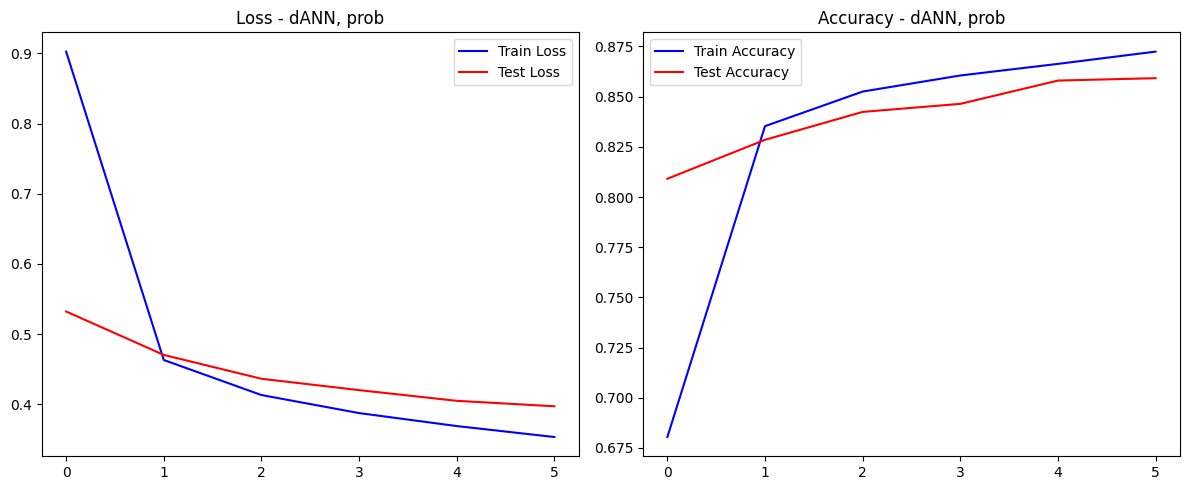


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.353
Test loss: 0.397
Train accuracy: 0.872
Test accuracy: 0.859


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.002  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=16,
            probabilistic_resampling=True,
            p_max_prune=0.8,
            threshold_w=0.12,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   3%|▎         | 40/1410 [00:00<00:08, 159.33it/s, Epoch=1/6, Batch=41/235, Loss=0.8640]

num of dendrite successful swaps: 2878
num of dendrite successful swaps: 1999


Training :   4%|▍         | 63/1410 [00:00<00:06, 214.57it/s, Epoch=1/6, Batch=64/235, Loss=0.6302]

num of dendrite successful swaps: 1495
num of dendrite successful swaps: 1236


Training :   7%|▋         | 96/1410 [00:00<00:05, 238.04it/s, Epoch=1/6, Batch=97/235, Loss=0.5779]

num of dendrite successful swaps: 987
num of dendrite successful swaps: 867


Training :   9%|▉         | 128/1410 [00:00<00:05, 241.91it/s, Epoch=1/6, Batch=129/235, Loss=0.5185]

num of dendrite successful swaps: 759
num of dendrite successful swaps: 660


Training :  11%|█▏        | 160/1410 [00:00<00:05, 243.58it/s, Epoch=1/6, Batch=161/235, Loss=0.7248]

num of dendrite successful swaps: 615
num of dendrite successful swaps: 546


Training :  14%|█▎        | 191/1410 [00:00<00:04, 246.51it/s, Epoch=1/6, Batch=192/235, Loss=0.5453]

num of dendrite successful swaps: 442
num of dendrite successful swaps: 466


Training :  16%|█▌        | 221/1410 [00:00<00:04, 240.25it/s, Epoch=1/6, Batch=222/235, Loss=0.5451]

num of dendrite successful swaps: 367


Training :  18%|█▊        | 248/1410 [00:01<00:05, 222.63it/s, Epoch=2/6, Batch=15/235, Loss=0.3764] 

num of dendrite successful swaps: 358
num of dendrite successful swaps: 357


Training :  19%|█▉        | 265/1410 [00:01<00:05, 222.63it/s, Epoch=2/6, Batch=32/235, Loss=0.4905]

num of dendrite successful swaps: 370


Training :  21%|██▏       | 303/1410 [00:01<00:04, 236.14it/s, Epoch=2/6, Batch=70/235, Loss=0.4754]

num of dendrite successful swaps: 371
num of dendrite successful swaps: 326
num of dendrite successful swaps: 327


Training :  26%|██▌       | 364/1410 [00:01<00:04, 230.20it/s, Epoch=2/6, Batch=131/235, Loss=0.4747]

num of dendrite successful swaps: 314
num of dendrite successful swaps: 270
num of dendrite successful swaps: 274


Training :  29%|██▉       | 414/1410 [00:01<00:04, 232.28it/s, Epoch=2/6, Batch=181/235, Loss=0.4300]

num of dendrite successful swaps: 263
num of dendrite successful swaps: 264
num of dendrite successful swaps: 234
num of dendrite successful swaps: 237


Training :  34%|███▎      | 473/1410 [00:02<00:03, 243.46it/s, Epoch=3/6, Batch=6/235, Loss=0.4613]  

num of dendrite successful swaps: 257
num of dendrite successful swaps: 265
num of dendrite successful swaps: 255


Training :  37%|███▋      | 528/1410 [00:02<00:03, 231.91it/s, Epoch=3/6, Batch=61/235, Loss=0.3836]

num of dendrite successful swaps: 246
num of dendrite successful swaps: 205
num of dendrite successful swaps: 218
num of dendrite successful swaps: 206


Training :  42%|████▏     | 592/1410 [00:02<00:03, 242.41it/s, Epoch=3/6, Batch=125/235, Loss=0.4371]

num of dendrite successful swaps: 235
num of dendrite successful swaps: 222
num of dendrite successful swaps: 201
num of dendrite successful swaps: 222


Training :  47%|████▋     | 656/1410 [00:02<00:03, 247.08it/s, Epoch=3/6, Batch=189/235, Loss=0.3791]

num of dendrite successful swaps: 199
num of dendrite successful swaps: 209
num of dendrite successful swaps: 211
num of dendrite successful swaps: 191


Training :  50%|█████     | 711/1410 [00:03<00:02, 248.19it/s, Epoch=4/6, Batch=10/235, Loss=0.3070] 

num of dendrite successful swaps: 201
num of dendrite successful swaps: 193
num of dendrite successful swaps: 177


Training :  54%|█████▍    | 763/1410 [00:03<00:02, 222.58it/s, Epoch=4/6, Batch=62/235, Loss=0.3118]

num of dendrite successful swaps: 186
num of dendrite successful swaps: 186
num of dendrite successful swaps: 197


Training :  58%|█████▊    | 811/1410 [00:03<00:02, 222.24it/s, Epoch=4/6, Batch=110/235, Loss=0.4451]

num of dendrite successful swaps: 173
num of dendrite successful swaps: 172
num of dendrite successful swaps: 158


Training :  61%|██████    | 862/1410 [00:03<00:02, 224.98it/s, Epoch=4/6, Batch=161/235, Loss=0.3138]

num of dendrite successful swaps: 167
num of dendrite successful swaps: 175
num of dendrite successful swaps: 180
num of dendrite successful swaps: 157


Training :  66%|██████▌   | 927/1410 [00:03<00:02, 240.49it/s, Epoch=4/6, Batch=226/235, Loss=0.3508]

num of dendrite successful swaps: 149
num of dendrite successful swaps: 158
num of dendrite successful swaps: 151
num of dendrite successful swaps: 156


Training :  70%|███████   | 991/1410 [00:04<00:01, 235.90it/s, Epoch=5/6, Batch=56/235, Loss=0.2638] 

num of dendrite successful swaps: 157
num of dendrite successful swaps: 146
num of dendrite successful swaps: 164
num of dendrite successful swaps: 151


Training :  75%|███████▍  | 1055/1410 [00:04<00:01, 239.13it/s, Epoch=5/6, Batch=120/235, Loss=0.3120]

num of dendrite successful swaps: 171
num of dendrite successful swaps: 138
num of dendrite successful swaps: 142
num of dendrite successful swaps: 147


Training :  79%|███████▉  | 1120/1410 [00:04<00:01, 246.19it/s, Epoch=5/6, Batch=185/235, Loss=0.3886]

num of dendrite successful swaps: 141
num of dendrite successful swaps: 143
num of dendrite successful swaps: 147
num of dendrite successful swaps: 139


Training :  83%|████████▎ | 1176/1410 [00:05<00:00, 248.75it/s, Epoch=6/6, Batch=7/235, Loss=0.4102]  

num of dendrite successful swaps: 147
num of dendrite successful swaps: 131
num of dendrite successful swaps: 134


Training :  87%|████████▋ | 1232/1410 [00:05<00:00, 233.22it/s, Epoch=6/6, Batch=63/235, Loss=0.2791]

num of dendrite successful swaps: 128
num of dendrite successful swaps: 123
num of dendrite successful swaps: 134
num of dendrite successful swaps: 131


Training :  92%|█████████▏| 1296/1410 [00:05<00:00, 244.51it/s, Epoch=6/6, Batch=127/235, Loss=0.2261]

num of dendrite successful swaps: 141
num of dendrite successful swaps: 149
num of dendrite successful swaps: 116
num of dendrite successful swaps: 133


Training :  96%|█████████▋| 1358/1410 [00:05<00:00, 243.41it/s, Epoch=6/6, Batch=189/235, Loss=0.3580]

num of dendrite successful swaps: 131
num of dendrite successful swaps: 118
num of dendrite successful swaps: 145
num of dendrite successful swaps: 128


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 235.28it/s, Epoch=6/6, Batch=234/235, Loss=0.3601]


num of dendrite successful swaps: 103
num of dendrite successful swaps: 126
Number of mask updates: 88
Train loss dANN, prob model: 0.3328
Train accuracy dANN, prob model: 87.9%
Test accuracy dANN, prob model: 85.4%


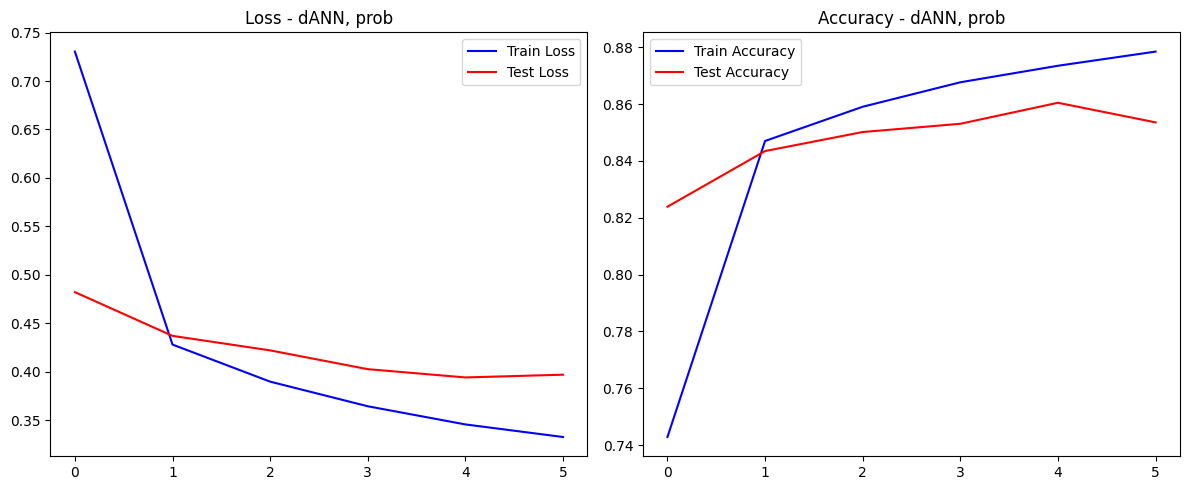


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.333
Test loss: 0.397
Train accuracy: 0.879
Test accuracy: 0.854


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.004  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=16,
            probabilistic_resampling=True,
            p_max_prune=0.8,
            threshold_w=0.12,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 258.04it/s, Epoch=1/6, Batch=179/235, Loss=0.4705]

num of dendrite successful swaps: 2705


Training :  22%|██▏       | 307/1410 [00:01<00:04, 246.83it/s, Epoch=2/6, Batch=74/235, Loss=0.4841] 

num of dendrite successful swaps: 1906


Training :  31%|███       | 434/1410 [00:01<00:03, 258.06it/s, Epoch=2/6, Batch=201/235, Loss=0.4363]

num of dendrite successful swaps: 1539


Training :  40%|███▉      | 562/1410 [00:02<00:03, 252.21it/s, Epoch=3/6, Batch=95/235, Loss=0.4055] 

num of dendrite successful swaps: 1245


Training :  49%|████▉     | 690/1410 [00:02<00:02, 259.08it/s, Epoch=3/6, Batch=223/235, Loss=0.5253]

num of dendrite successful swaps: 1077


Training :  58%|█████▊    | 817/1410 [00:03<00:02, 248.15it/s, Epoch=4/6, Batch=115/235, Loss=0.3578]

num of dendrite successful swaps: 995


Training :  67%|██████▋   | 939/1410 [00:03<00:01, 254.79it/s, Epoch=5/6, Batch=4/235, Loss=0.3345]  

num of dendrite successful swaps: 864


Training :  76%|███████▌  | 1073/1410 [00:04<00:01, 250.47it/s, Epoch=5/6, Batch=138/235, Loss=0.3252]

num of dendrite successful swaps: 747


Training :  85%|████████▍ | 1192/1410 [00:04<00:00, 227.21it/s, Epoch=6/6, Batch=23/235, Loss=0.3279] 

num of dendrite successful swaps: 692


Training :  94%|█████████▍| 1328/1410 [00:05<00:00, 248.74it/s, Epoch=6/6, Batch=159/235, Loss=0.3403]

num of dendrite successful swaps: 634


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 246.99it/s, Epoch=6/6, Batch=234/235, Loss=0.2892]


Number of mask updates: 11
Train loss dANN, prob model: 0.3308
Train accuracy dANN, prob model: 87.8%
Test accuracy dANN, prob model: 86.3%


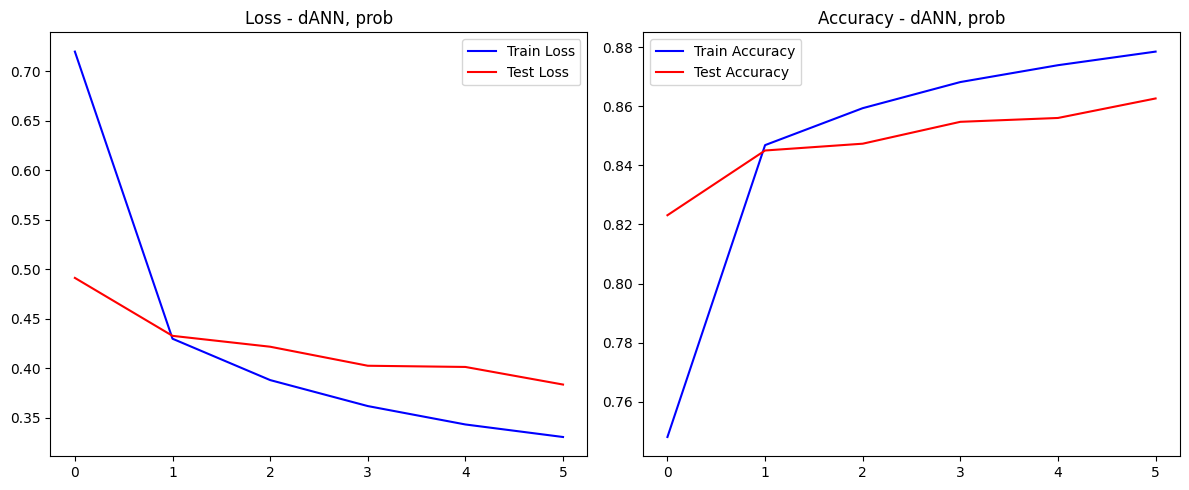


FINAL RESULTS SUMMARY
Model: dANN, prob
Train loss: 0.331
Test loss: 0.384
Train accuracy: 0.878
Test accuracy: 0.863


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.004  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.8,
            threshold_w=0.12,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    # [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   3%|▎         | 179/5875 [00:00<00:21, 259.60it/s, Epoch=1/25, Batch=180/235, Loss=0.4227]

num of dendrite successful swaps: 3025


Training :   5%|▌         | 304/5875 [00:01<00:22, 243.63it/s, Epoch=2/25, Batch=71/235, Loss=0.5050] 

num of dendrite successful swaps: 2099


Training :   7%|▋         | 429/5875 [00:01<00:22, 244.62it/s, Epoch=2/25, Batch=196/235, Loss=0.3272]

num of dendrite successful swaps: 1627


Training :  10%|▉         | 563/5875 [00:02<00:21, 246.39it/s, Epoch=3/25, Batch=96/235, Loss=0.3433] 

num of dendrite successful swaps: 1393


Training :  12%|█▏        | 686/5875 [00:02<00:21, 239.36it/s, Epoch=3/25, Batch=219/235, Loss=0.3677]

num of dendrite successful swaps: 1195


Training :  14%|█▍        | 819/5875 [00:03<00:19, 253.23it/s, Epoch=4/25, Batch=118/235, Loss=0.3187]

num of dendrite successful swaps: 1033


Training :  16%|█▌        | 939/5875 [00:03<00:19, 255.35it/s, Epoch=5/25, Batch=4/235, Loss=0.3120]  

num of dendrite successful swaps: 912


Training :  18%|█▊        | 1072/5875 [00:04<00:19, 243.25it/s, Epoch=5/25, Batch=137/235, Loss=0.3581]

num of dendrite successful swaps: 816


Training :  20%|██        | 1192/5875 [00:04<00:20, 231.29it/s, Epoch=6/25, Batch=23/235, Loss=0.3163] 

num of dendrite successful swaps: 770


Training :  23%|██▎       | 1330/5875 [00:05<00:18, 249.23it/s, Epoch=6/25, Batch=161/235, Loss=0.3047]

num of dendrite successful swaps: 712


Training :  25%|██▍       | 1458/5875 [00:05<00:17, 247.30it/s, Epoch=7/25, Batch=55/235, Loss=0.3720] 

num of dendrite successful swaps: 668


Training :  27%|██▋       | 1584/5875 [00:06<00:17, 249.85it/s, Epoch=7/25, Batch=181/235, Loss=0.3392]

num of dendrite successful swaps: 663


Training :  29%|██▉       | 1713/5875 [00:06<00:17, 243.63it/s, Epoch=8/25, Batch=76/235, Loss=0.2817] 

num of dendrite successful swaps: 564


Training :  31%|███▏      | 1842/5875 [00:07<00:15, 256.93it/s, Epoch=8/25, Batch=205/235, Loss=0.2964]

num of dendrite successful swaps: 549


Training :  33%|███▎      | 1965/5875 [00:08<00:16, 236.29it/s, Epoch=9/25, Batch=94/235, Loss=0.4155] 

num of dendrite successful swaps: 539


Training :  36%|███▌      | 2094/5875 [00:08<00:15, 239.72it/s, Epoch=9/25, Batch=223/235, Loss=0.2400]

num of dendrite successful swaps: 517


Training :  38%|███▊      | 2225/5875 [00:09<00:14, 246.36it/s, Epoch=10/25, Batch=120/235, Loss=0.2758]

num of dendrite successful swaps: 479


Training :  40%|███▉      | 2339/5875 [00:09<00:15, 232.46it/s, Epoch=10/25, Batch=234/235, Loss=0.3536]

num of dendrite successful swaps: 462


Training :  42%|████▏     | 2483/5875 [00:10<00:13, 246.80it/s, Epoch=11/25, Batch=144/235, Loss=0.3370]

num of dendrite successful swaps: 425


Training :  44%|████▍     | 2603/5875 [00:10<00:13, 238.58it/s, Epoch=12/25, Batch=30/235, Loss=0.3397] 

num of dendrite successful swaps: 420


Training :  47%|████▋     | 2735/5875 [00:11<00:12, 247.54it/s, Epoch=12/25, Batch=162/235, Loss=0.2689]

num of dendrite successful swaps: 418


Training :  49%|████▉     | 2866/5875 [00:11<00:12, 231.56it/s, Epoch=13/25, Batch=59/235, Loss=0.3143] 

num of dendrite successful swaps: 413


Training :  51%|█████     | 2994/5875 [00:12<00:11, 252.46it/s, Epoch=13/25, Batch=187/235, Loss=0.2823]

num of dendrite successful swaps: 394


Training :  53%|█████▎    | 3123/5875 [00:12<00:11, 248.52it/s, Epoch=14/25, Batch=82/235, Loss=0.2792] 

num of dendrite successful swaps: 372


Training :  55%|█████▌    | 3249/5875 [00:13<00:10, 256.63it/s, Epoch=14/25, Batch=208/235, Loss=0.2380]

num of dendrite successful swaps: 378


Training :  58%|█████▊    | 3379/5875 [00:13<00:09, 252.21it/s, Epoch=15/25, Batch=103/235, Loss=0.3054]

num of dendrite successful swaps: 355


Training :  60%|█████▉    | 3507/5875 [00:14<00:09, 260.03it/s, Epoch=15/25, Batch=232/235, Loss=0.2440]

num of dendrite successful swaps: 337


Training :  62%|██████▏   | 3634/5875 [00:14<00:08, 257.12it/s, Epoch=16/25, Batch=125/235, Loss=0.3288]

num of dendrite successful swaps: 318


Training :  64%|██████▍   | 3754/5875 [00:15<00:08, 238.18it/s, Epoch=17/25, Batch=11/235, Loss=0.2852] 

num of dendrite successful swaps: 327


Training :  66%|██████▌   | 3890/5875 [00:15<00:07, 255.48it/s, Epoch=17/25, Batch=147/235, Loss=0.1990]

num of dendrite successful swaps: 345


Training :  68%|██████▊   | 4010/5875 [00:16<00:07, 236.97it/s, Epoch=18/25, Batch=33/235, Loss=0.2322] 

num of dendrite successful swaps: 336


Training :  71%|███████   | 4146/5875 [00:16<00:06, 255.12it/s, Epoch=18/25, Batch=169/235, Loss=0.2880]

num of dendrite successful swaps: 336


Training :  73%|███████▎  | 4273/5875 [00:17<00:06, 244.25it/s, Epoch=19/25, Batch=62/235, Loss=0.2556] 

num of dendrite successful swaps: 324


Training :  75%|███████▍  | 4402/5875 [00:17<00:05, 256.52it/s, Epoch=19/25, Batch=191/235, Loss=0.2124]

num of dendrite successful swaps: 310


Training :  77%|███████▋  | 4531/5875 [00:18<00:05, 250.65it/s, Epoch=20/25, Batch=86/235, Loss=0.2972] 

num of dendrite successful swaps: 293


Training :  79%|███████▉  | 4657/5875 [00:18<00:04, 250.59it/s, Epoch=20/25, Batch=212/235, Loss=0.2457]

num of dendrite successful swaps: 285


Training :  81%|████████▏ | 4785/5875 [00:19<00:04, 249.00it/s, Epoch=21/25, Batch=106/235, Loss=0.3031]

num of dendrite successful swaps: 295


Training :  84%|████████▎ | 4913/5875 [00:19<00:03, 256.78it/s, Epoch=21/25, Batch=234/235, Loss=0.2452]

num of dendrite successful swaps: 278


Training :  86%|████████▌ | 5039/5875 [00:20<00:03, 250.69it/s, Epoch=22/25, Batch=126/235, Loss=0.2884]

num of dendrite successful swaps: 280


Training :  88%|████████▊ | 5162/5875 [00:20<00:03, 229.12it/s, Epoch=23/25, Batch=15/235, Loss=0.2557] 

num of dendrite successful swaps: 280


Training :  90%|█████████ | 5298/5875 [00:21<00:02, 247.36it/s, Epoch=23/25, Batch=151/235, Loss=0.2902]

num of dendrite successful swaps: 254


Training :  92%|█████████▏| 5418/5875 [00:22<00:01, 242.38it/s, Epoch=24/25, Batch=37/235, Loss=0.2504] 

num of dendrite successful swaps: 258


Training :  95%|█████████▍| 5554/5875 [00:22<00:01, 254.75it/s, Epoch=24/25, Batch=173/235, Loss=0.2278]

num of dendrite successful swaps: 271


Training :  97%|█████████▋| 5682/5875 [00:23<00:00, 246.87it/s, Epoch=25/25, Batch=67/235, Loss=0.3123] 

num of dendrite successful swaps: 245


Training :  99%|█████████▉| 5810/5875 [00:23<00:00, 254.56it/s, Epoch=25/25, Batch=195/235, Loss=0.3066]

num of dendrite successful swaps: 258


Training : 100%|█████████▉| 5850/5875 [00:23<00:00, 246.43it/s, Epoch=25/25, Batch=234/235, Loss=0.2322]


Number of mask updates: 46
Train loss dANN, prob model: 0.2431
Train accuracy dANN, prob model: 90.7%
Test accuracy dANN, prob model: 86.6%

Training dANN model...


Training : 100%|█████████▉| 5850/5875 [00:23<00:00, 246.47it/s, Epoch=25/25, Batch=234/235, Loss=0.2700]


Number of mask updates: 1
Train loss dANN model: 0.272
Train accuracy dANN model: 89.9%
Test accuracy dANN model: 87.1%


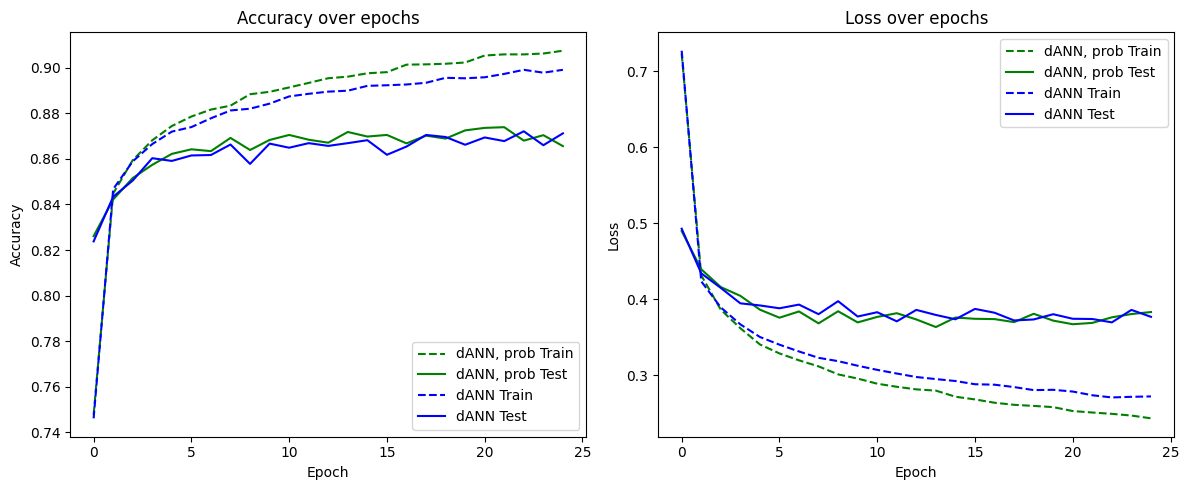

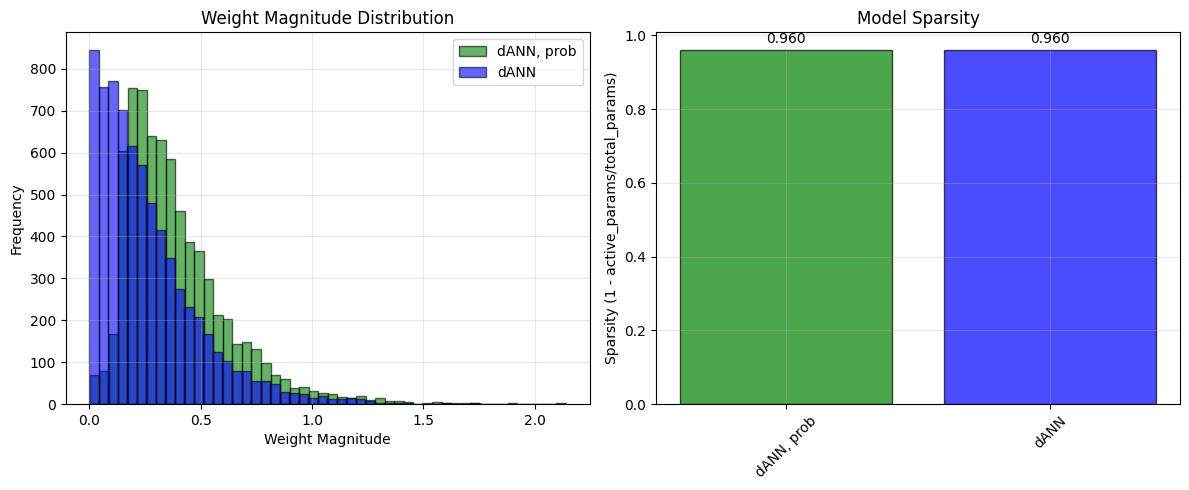


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.2431       0.3831       90.7       % 86.6       %
dANN                 0.2720       0.3768       89.9       % 87.1       %


In [ ]:
try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 25  # 15 MNIST, 20 Fashion-MNIST
lr = 0.004  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.9,
            threshold_w=0.12,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)
Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   3%|▎         | 172/5875 [00:00<00:23, 239.52it/s, Epoch=1/25, Batch=173/235, Loss=0.4478]

num of dendrite successful swaps: 267


Training :   5%|▌         | 308/5875 [00:01<00:22, 251.29it/s, Epoch=2/25, Batch=75/235, Loss=0.4448] 

num of dendrite successful swaps: 259


Training :   7%|▋         | 435/5875 [00:01<00:21, 258.08it/s, Epoch=2/25, Batch=202/235, Loss=0.2990]

num of dendrite successful swaps: 221


Training :  10%|▉         | 563/5875 [00:02<00:20, 255.38it/s, Epoch=3/25, Batch=96/235, Loss=0.3226] 

num of dendrite successful swaps: 223


Training :  12%|█▏        | 691/5875 [00:02<00:19, 261.83it/s, Epoch=3/25, Batch=224/235, Loss=0.3476]

num of dendrite successful swaps: 186


Training :  14%|█▍        | 818/5875 [00:03<00:19, 254.96it/s, Epoch=4/25, Batch=117/235, Loss=0.3274]

num of dendrite successful swaps: 186


Training :  16%|█▌        | 939/5875 [00:03<00:18, 260.13it/s, Epoch=5/25, Batch=4/235, Loss=0.3525]  

num of dendrite successful swaps: 185


Training :  18%|█▊        | 1072/5875 [00:04<00:19, 241.87it/s, Epoch=5/25, Batch=137/235, Loss=0.3214]

num of dendrite successful swaps: 154


Training :  20%|██        | 1194/5875 [00:04<00:20, 228.52it/s, Epoch=6/25, Batch=25/235, Loss=0.3679] 

num of dendrite successful swaps: 156


Training :  23%|██▎       | 1328/5875 [00:05<00:19, 239.21it/s, Epoch=6/25, Batch=159/235, Loss=0.3260]

num of dendrite successful swaps: 137


Training :  25%|██▍       | 1457/5875 [00:05<00:18, 242.91it/s, Epoch=7/25, Batch=54/235, Loss=0.3042] 

num of dendrite successful swaps: 141


Training :  27%|██▋       | 1587/5875 [00:06<00:16, 257.72it/s, Epoch=7/25, Batch=184/235, Loss=0.3414]

num of dendrite successful swaps: 116


Training :  29%|██▉       | 1715/5875 [00:06<00:16, 252.83it/s, Epoch=8/25, Batch=78/235, Loss=0.2987] 

num of dendrite successful swaps: 124


Training :  31%|███▏      | 1843/5875 [00:07<00:15, 261.20it/s, Epoch=8/25, Batch=206/235, Loss=0.3492]

num of dendrite successful swaps: 122


Training :  34%|███▎      | 1972/5875 [00:07<00:15, 255.76it/s, Epoch=9/25, Batch=101/235, Loss=0.2846]

num of dendrite successful swaps: 112


Training :  36%|███▌      | 2100/5875 [00:08<00:14, 266.83it/s, Epoch=9/25, Batch=229/235, Loss=0.2539]

num of dendrite successful swaps: 95


Training :  38%|███▊      | 2227/5875 [00:08<00:13, 261.39it/s, Epoch=10/25, Batch=122/235, Loss=0.3292]

num of dendrite successful swaps: 93


Training :  40%|███▉      | 2348/5875 [00:09<00:13, 267.17it/s, Epoch=11/25, Batch=9/235, Loss=0.3153]  

num of dendrite successful swaps: 109


Training :  42%|████▏     | 2485/5875 [00:09<00:12, 263.74it/s, Epoch=11/25, Batch=146/235, Loss=0.3040]

num of dendrite successful swaps: 110


Training :  44%|████▍     | 2604/5875 [00:10<00:13, 245.16it/s, Epoch=12/25, Batch=31/235, Loss=0.3143] 

num of dendrite successful swaps: 93


Training :  47%|████▋     | 2740/5875 [00:10<00:11, 264.20it/s, Epoch=12/25, Batch=167/235, Loss=0.2900]

num of dendrite successful swaps: 92


Training :  49%|████▉     | 2867/5875 [00:11<00:11, 252.92it/s, Epoch=13/25, Batch=60/235, Loss=0.3158] 

num of dendrite successful swaps: 92


Training :  51%|█████     | 2996/5875 [00:11<00:10, 262.79it/s, Epoch=13/25, Batch=189/235, Loss=0.2862]

num of dendrite successful swaps: 77


Training :  53%|█████▎    | 3123/5875 [00:12<00:10, 253.16it/s, Epoch=14/25, Batch=82/235, Loss=0.2335] 

num of dendrite successful swaps: 81


Training :  55%|█████▌    | 3251/5875 [00:12<00:10, 259.05it/s, Epoch=14/25, Batch=210/235, Loss=0.2848]

num of dendrite successful swaps: 77


Training :  57%|█████▋    | 3378/5875 [00:13<00:10, 238.86it/s, Epoch=15/25, Batch=103/235, Loss=0.3150]

num of dendrite successful swaps: 85


Training :  60%|█████▉    | 3506/5875 [00:13<00:08, 264.96it/s, Epoch=15/25, Batch=231/235, Loss=0.2588]

num of dendrite successful swaps: 72


Training :  62%|██████▏   | 3631/5875 [00:14<00:09, 240.20it/s, Epoch=16/25, Batch=122/235, Loss=0.3124]

num of dendrite successful swaps: 73


Training :  64%|██████▍   | 3756/5875 [00:14<00:08, 256.35it/s, Epoch=17/25, Batch=13/235, Loss=0.1713] 

num of dendrite successful swaps: 63


Training :  66%|██████▌   | 3891/5875 [00:15<00:07, 262.36it/s, Epoch=17/25, Batch=148/235, Loss=0.2511]

num of dendrite successful swaps: 72


Training :  68%|██████▊   | 4012/5875 [00:15<00:07, 246.09it/s, Epoch=18/25, Batch=35/235, Loss=0.1968] 

num of dendrite successful swaps: 51


Training :  71%|███████   | 4148/5875 [00:16<00:06, 263.35it/s, Epoch=18/25, Batch=171/235, Loss=0.2441]

num of dendrite successful swaps: 57


Training :  73%|███████▎  | 4277/5875 [00:16<00:06, 252.50it/s, Epoch=19/25, Batch=66/235, Loss=0.1837] 

num of dendrite successful swaps: 66


Training :  75%|███████▍  | 4404/5875 [00:17<00:05, 266.42it/s, Epoch=19/25, Batch=193/235, Loss=0.2416]

num of dendrite successful swaps: 66


Training :  77%|███████▋  | 4532/5875 [00:17<00:05, 260.61it/s, Epoch=20/25, Batch=87/235, Loss=0.2300] 

num of dendrite successful swaps: 54


Training :  79%|███████▉  | 4660/5875 [00:18<00:04, 265.38it/s, Epoch=20/25, Batch=215/235, Loss=0.2101]

num of dendrite successful swaps: 53


Training :  82%|████████▏ | 4789/5875 [00:18<00:04, 260.03it/s, Epoch=21/25, Batch=110/235, Loss=0.2239]

num of dendrite successful swaps: 60


Training :  84%|████████▎ | 4913/5875 [00:19<00:03, 267.91it/s, Epoch=21/25, Batch=234/235, Loss=0.2809]

num of dendrite successful swaps: 61


Training :  86%|████████▌ | 5042/5875 [00:19<00:03, 255.04it/s, Epoch=22/25, Batch=129/235, Loss=0.3668]

num of dendrite successful swaps: 49


Training :  88%|████████▊ | 5164/5875 [00:20<00:02, 243.84it/s, Epoch=23/25, Batch=17/235, Loss=0.3148] 

num of dendrite successful swaps: 63


Training :  90%|█████████ | 5300/5875 [00:20<00:02, 263.45it/s, Epoch=23/25, Batch=153/235, Loss=0.2447]

num of dendrite successful swaps: 47


Training :  92%|█████████▏| 5420/5875 [00:21<00:01, 244.27it/s, Epoch=24/25, Batch=39/235, Loss=0.3199] 

num of dendrite successful swaps: 45


Training :  95%|█████████▍| 5555/5875 [00:21<00:01, 263.84it/s, Epoch=24/25, Batch=174/235, Loss=0.2743]

num of dendrite successful swaps: 61


Training :  97%|█████████▋| 5684/5875 [00:22<00:00, 256.28it/s, Epoch=25/25, Batch=69/235, Loss=0.2759] 

num of dendrite successful swaps: 49


Training :  99%|█████████▉| 5812/5875 [00:22<00:00, 266.87it/s, Epoch=25/25, Batch=197/235, Loss=0.2870]

num of dendrite successful swaps: 43


Training : 100%|█████████▉| 5850/5875 [00:23<00:00, 254.02it/s, Epoch=25/25, Batch=234/235, Loss=0.3023]


Number of mask updates: 46
Train loss dANN, prob model: 0.2559
Train accuracy dANN, prob model: 90.5%
Test accuracy dANN, prob model: 87.0%

Training dANN model...


Training : 100%|█████████▉| 5850/5875 [00:23<00:00, 252.43it/s, Epoch=25/25, Batch=234/235, Loss=0.2052]


Number of mask updates: 46
Train loss dANN model: 0.2412
Train accuracy dANN model: 90.8%
Test accuracy dANN model: 86.8%


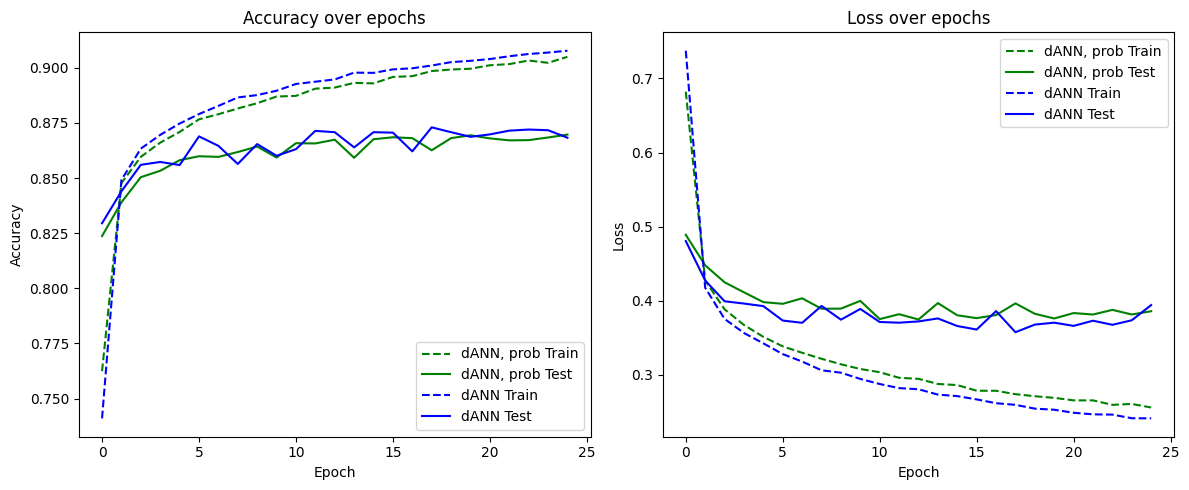

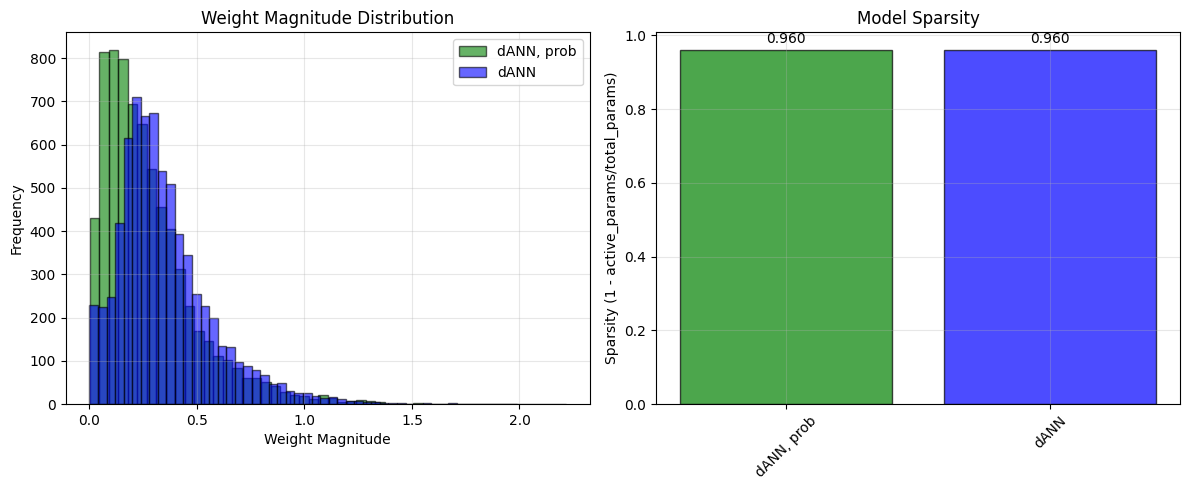


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.2559       0.3858       90.5       % 87.0       %
dANN                 0.2412       0.3942       90.8       % 86.8       %


In [ ]:
# %%

try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 25  # 15 MNIST, 20 Fashion-MNIST
lr = 0.004  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=0.9,
            threshold_w=0.0,
            steepness=0.01,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   7%|▋         | 176/2350 [00:00<00:08, 259.86it/s, Epoch=1/10, Batch=177/235, Loss=0.4953]

num of dendrite successful swaps: 2729


Training :  13%|█▎        | 306/2350 [00:01<00:08, 246.49it/s, Epoch=2/10, Batch=73/235, Loss=0.3999] 

num of dendrite successful swaps: 2649


Training :  19%|█▊        | 435/2350 [00:01<00:07, 257.94it/s, Epoch=2/10, Batch=202/235, Loss=0.3640]

num of dendrite successful swaps: 2645


Training :  24%|██▍       | 563/2350 [00:02<00:07, 253.02it/s, Epoch=3/10, Batch=96/235, Loss=0.4944] 

num of dendrite successful swaps: 2574


Training :  29%|██▉       | 691/2350 [00:02<00:06, 264.30it/s, Epoch=3/10, Batch=224/235, Loss=0.3829]

num of dendrite successful swaps: 2473


Training :  35%|███▍      | 818/2350 [00:03<00:05, 256.96it/s, Epoch=4/10, Batch=117/235, Loss=0.3700]

num of dendrite successful swaps: 2354


Training :  40%|███▉      | 935/2350 [00:03<00:05, 238.13it/s, Epoch=4/10, Batch=234/235, Loss=0.4070]

num of dendrite successful swaps: 2401


Training :  46%|████▌     | 1075/2350 [00:04<00:04, 257.09it/s, Epoch=5/10, Batch=140/235, Loss=0.3869]

num of dendrite successful swaps: 2331


Training :  51%|█████     | 1195/2350 [00:04<00:04, 244.13it/s, Epoch=6/10, Batch=26/235, Loss=0.3763] 

num of dendrite successful swaps: 2298


Training :  57%|█████▋    | 1332/2350 [00:05<00:03, 263.72it/s, Epoch=6/10, Batch=163/235, Loss=0.4057]

num of dendrite successful swaps: 2298


Training :  62%|██████▏   | 1453/2350 [00:05<00:03, 232.19it/s, Epoch=7/10, Batch=50/235, Loss=0.3663] 

num of dendrite successful swaps: 2172


Training :  67%|██████▋   | 1584/2350 [00:06<00:03, 247.65it/s, Epoch=7/10, Batch=181/235, Loss=0.3443]

num of dendrite successful swaps: 2121


Training :  73%|███████▎  | 1708/2350 [00:06<00:02, 234.20it/s, Epoch=8/10, Batch=71/235, Loss=0.3285] 

num of dendrite successful swaps: 2096


Training :  78%|███████▊  | 1841/2350 [00:07<00:02, 237.46it/s, Epoch=8/10, Batch=204/235, Loss=0.2735]

num of dendrite successful swaps: 2091


Training :  84%|████████▍ | 1973/2350 [00:07<00:01, 255.70it/s, Epoch=9/10, Batch=102/235, Loss=0.3318]

num of dendrite successful swaps: 2038


Training :  89%|████████▉ | 2099/2350 [00:08<00:00, 265.23it/s, Epoch=9/10, Batch=228/235, Loss=0.2943]

num of dendrite successful swaps: 1984


Training :  95%|█████████▍| 2229/2350 [00:08<00:00, 262.50it/s, Epoch=10/10, Batch=123/235, Loss=0.2382]

num of dendrite successful swaps: 1950


Training : 100%|█████████▉| 2340/2350 [00:09<00:00, 250.02it/s, Epoch=10/10, Batch=234/235, Loss=0.3243]


num of dendrite successful swaps: 2011
Number of mask updates: 19
Train loss dANN, prob model: 0.3224
Train accuracy dANN, prob model: 88.0%
Test accuracy dANN, prob model: 85.9%

Training dANN model...


Training : 100%|█████████▉| 2340/2350 [00:09<00:00, 250.95it/s, Epoch=10/10, Batch=234/235, Loss=0.3554]


Number of mask updates: 19
Train loss dANN model: 0.2959
Train accuracy dANN model: 89.0%
Test accuracy dANN model: 86.2%


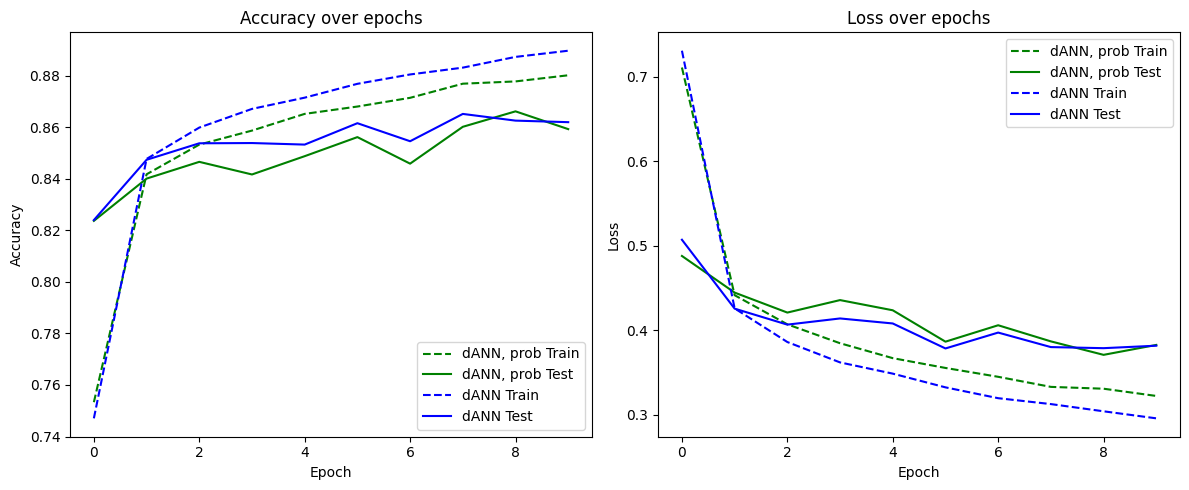

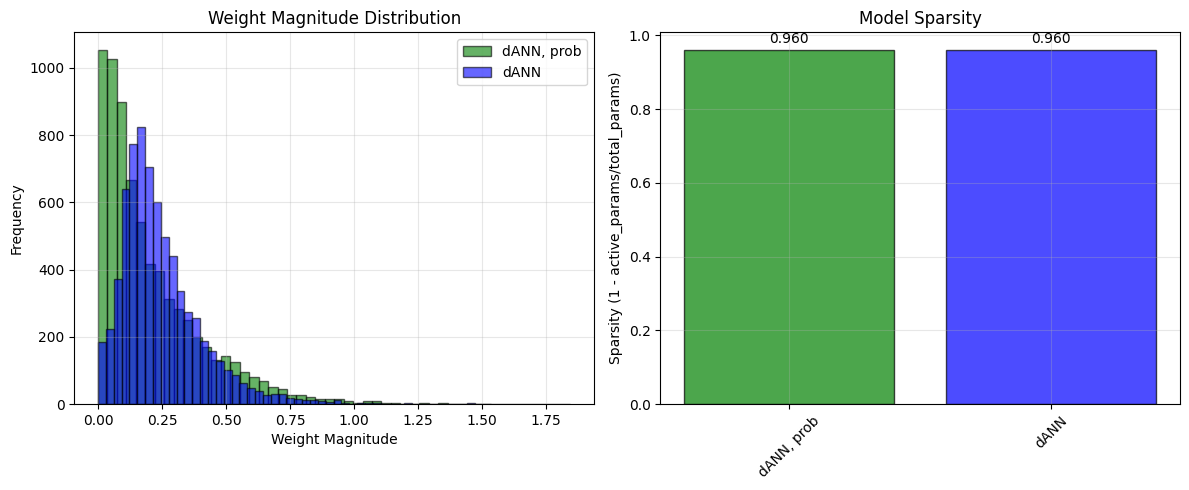


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3224       0.3828       88.0       % 85.9       %
dANN                 0.2959       0.3819       89.0       % 86.2       %


In [ ]:
# %%

try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 10  # 15 MNIST, 20 Fashion-MNIST
lr = 0.004  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=1.0,
            threshold_w=0.05,
            steepness=0.1,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

In [ ]:
# %%

try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 10  # 15 MNIST, 20 Fashion-MNIST
lr = 0.004  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=1.0,
            threshold_w=0.1,
            steepness=0.1,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   8%|▊         | 178/2350 [00:00<00:08, 257.91it/s, Epoch=1/10, Batch=179/235, Loss=0.4846]

num of dendrite successful swaps: 3149


Training :  13%|█▎        | 308/2350 [00:01<00:08, 248.42it/s, Epoch=2/10, Batch=74/235, Loss=0.3927] 

num of dendrite successful swaps: 3032


Training :  18%|█▊        | 431/2350 [00:01<00:07, 242.53it/s, Epoch=2/10, Batch=198/235, Loss=0.4248]

num of dendrite successful swaps: 2861


Training :  24%|██▍       | 564/2350 [00:02<00:07, 251.26it/s, Epoch=3/10, Batch=97/235, Loss=0.3046] 

num of dendrite successful swaps: 2842


Training :  29%|██▉       | 690/2350 [00:02<00:06, 259.61it/s, Epoch=3/10, Batch=223/235, Loss=0.4467]

num of dendrite successful swaps: 2805


Training :  35%|███▍      | 819/2350 [00:03<00:06, 254.19it/s, Epoch=4/10, Batch=118/235, Loss=0.3904]

num of dendrite successful swaps: 2765


Training :  40%|████      | 940/2350 [00:03<00:05, 257.07it/s, Epoch=5/10, Batch=5/235, Loss=0.3858]  

num of dendrite successful swaps: 2636


Training :  40%|████      | 951/2350 [00:03<00:05, 246.31it/s, Epoch=5/10, Batch=15/235, Loss=0.3922]


KeyboardInterrupt: 

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 178/1410 [00:00<00:04, 249.67it/s, Epoch=1/6, Batch=179/235, Loss=0.4691]

num of dendrite successful swaps: 3173


Training :  22%|██▏       | 308/1410 [00:01<00:04, 255.17it/s, Epoch=2/6, Batch=75/235, Loss=0.3897] 

num of dendrite successful swaps: 2161


Training :  31%|███       | 435/1410 [00:01<00:03, 256.83it/s, Epoch=2/6, Batch=202/235, Loss=0.4304]

num of dendrite successful swaps: 1724


Training :  40%|███▉      | 562/1410 [00:02<00:03, 254.90it/s, Epoch=3/6, Batch=95/235, Loss=0.4693] 

num of dendrite successful swaps: 1430


Training :  49%|████▉     | 692/1410 [00:02<00:02, 265.23it/s, Epoch=3/6, Batch=225/235, Loss=0.4258]

num of dendrite successful swaps: 1255


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 253.10it/s, Epoch=4/6, Batch=117/235, Loss=0.3537]

num of dendrite successful swaps: 1121


Training :  67%|██████▋   | 939/1410 [00:03<00:01, 262.36it/s, Epoch=5/6, Batch=4/235, Loss=0.3690]  

num of dendrite successful swaps: 1027


Training :  76%|███████▌  | 1075/1410 [00:04<00:01, 256.80it/s, Epoch=5/6, Batch=140/235, Loss=0.4101]

num of dendrite successful swaps: 941


Training :  85%|████████▍ | 1193/1410 [00:04<00:00, 235.27it/s, Epoch=6/6, Batch=24/235, Loss=0.3192] 

num of dendrite successful swaps: 847


Training :  94%|█████████▍| 1332/1410 [00:05<00:00, 257.46it/s, Epoch=6/6, Batch=163/235, Loss=0.3790]

num of dendrite successful swaps: 793


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 251.08it/s, Epoch=6/6, Batch=234/235, Loss=0.2983]


Number of mask updates: 11
Train loss dANN, prob model: 0.3322
Train accuracy dANN, prob model: 87.6%
Test accuracy dANN, prob model: 86.4%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 256.83it/s, Epoch=6/6, Batch=234/235, Loss=0.3123]


Number of mask updates: 11
Train loss dANN model: 0.3394
Train accuracy dANN model: 87.6%
Test accuracy dANN model: 86.5%


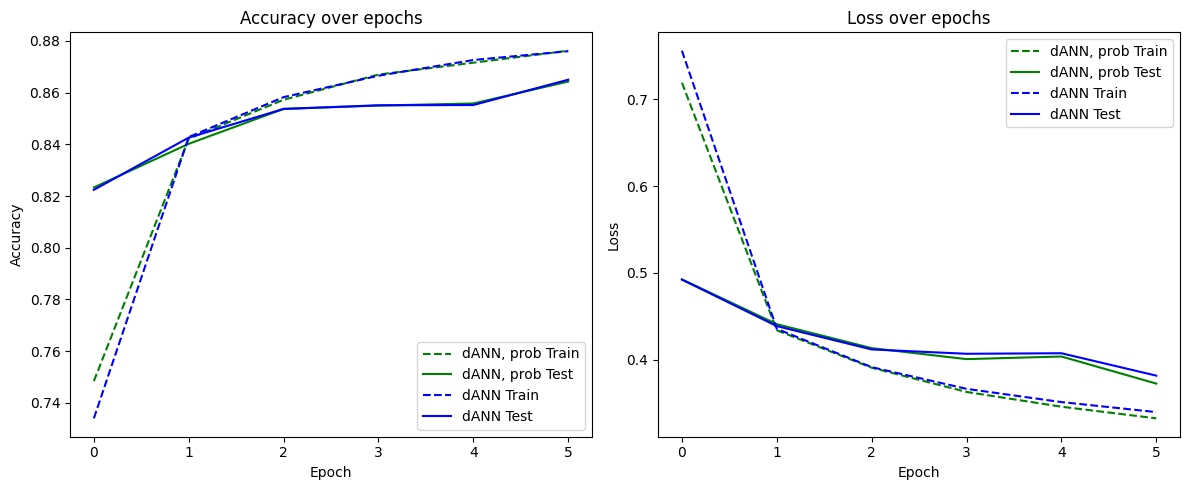

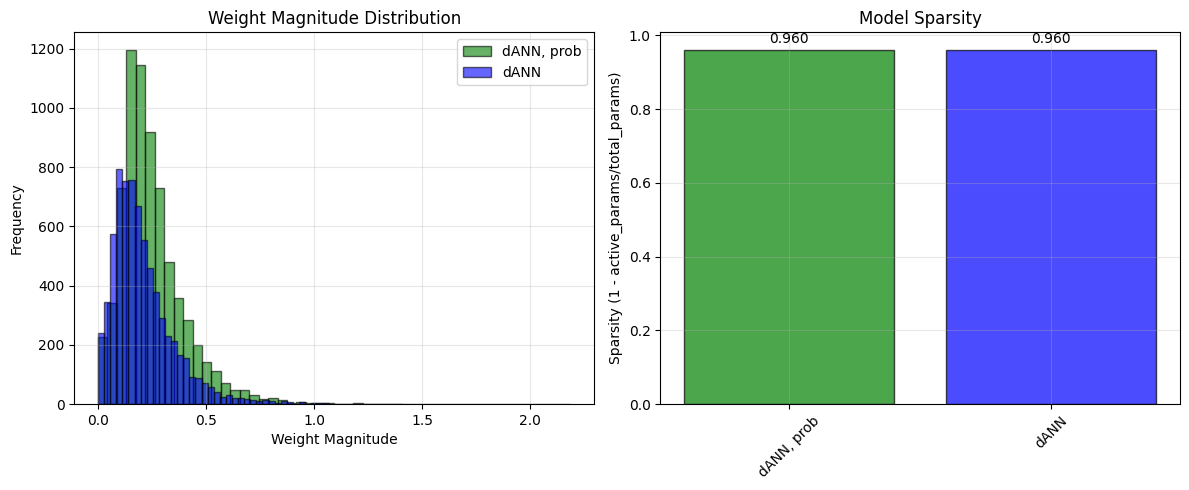


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3322       0.3723       87.6       % 86.4       %
dANN                 0.3394       0.3815       87.6       % 86.5       %


In [ ]:
# %%

try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.004  # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=1.0,
            threshold_w=0.1,
            steepness=0.01,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  12%|█▏        | 175/1410 [00:00<00:04, 261.05it/s, Epoch=1/6, Batch=176/235, Loss=0.4622]

num of dendrite successful swaps: 3173


Training :  22%|██▏       | 308/1410 [00:01<00:04, 241.92it/s, Epoch=2/6, Batch=75/235, Loss=0.3897] 

num of dendrite successful swaps: 2161


Training :  31%|███       | 434/1410 [00:01<00:03, 260.91it/s, Epoch=2/6, Batch=201/235, Loss=0.4310]

num of dendrite successful swaps: 1724


Training :  40%|███▉      | 562/1410 [00:02<00:03, 253.73it/s, Epoch=3/6, Batch=95/235, Loss=0.4693] 

num of dendrite successful swaps: 1430


Training :  49%|████▉     | 692/1410 [00:02<00:02, 262.71it/s, Epoch=3/6, Batch=224/235, Loss=0.4510]

num of dendrite successful swaps: 1255


Training :  58%|█████▊    | 819/1410 [00:03<00:02, 258.35it/s, Epoch=4/6, Batch=118/235, Loss=0.4811]

num of dendrite successful swaps: 1121


Training :  67%|██████▋   | 939/1410 [00:03<00:01, 263.68it/s, Epoch=5/6, Batch=4/235, Loss=0.3690]  

num of dendrite successful swaps: 1027


Training :  76%|███████▌  | 1075/1410 [00:04<00:01, 258.69it/s, Epoch=5/6, Batch=140/235, Loss=0.4101]

num of dendrite successful swaps: 941


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 240.14it/s, Epoch=6/6, Batch=25/235, Loss=0.2612] 

num of dendrite successful swaps: 847


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 259.94it/s, Epoch=6/6, Batch=161/235, Loss=0.3139]

num of dendrite successful swaps: 793


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 253.70it/s, Epoch=6/6, Batch=234/235, Loss=0.2983]


Number of mask updates: 11
Train loss dANN, prob model: 0.3322
Train accuracy dANN, prob model: 87.6%
Test accuracy dANN, prob model: 86.4%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 250.75it/s, Epoch=6/6, Batch=234/235, Loss=0.3123]


Number of mask updates: 11
Train loss dANN model: 0.3394
Train accuracy dANN model: 87.6%
Test accuracy dANN model: 86.5%


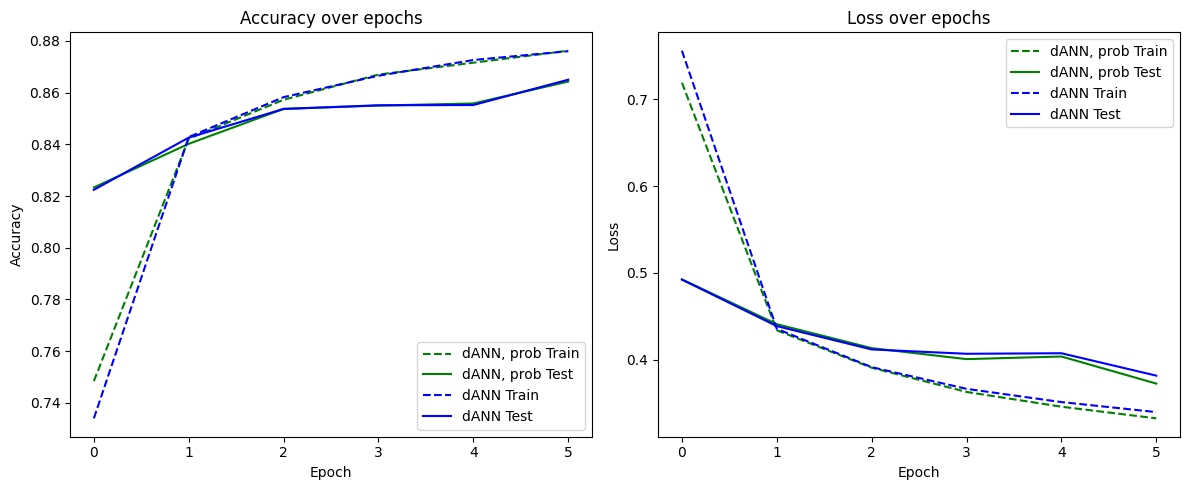

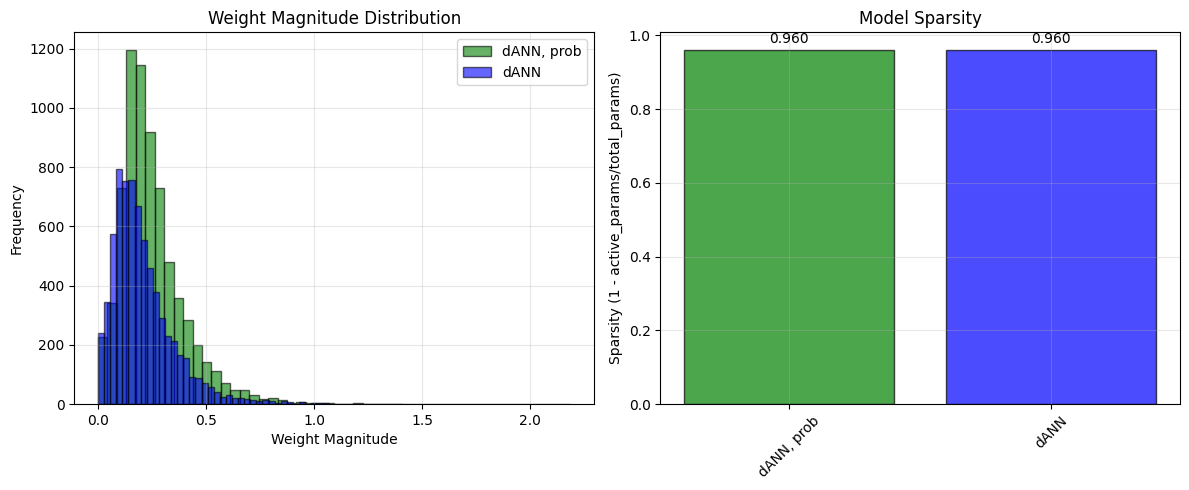


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3322       0.3723       87.6       % 86.4       %
dANN                 0.3394       0.3815       87.6       % 86.5       %


In [ ]:
# %%

try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.004 # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=1.0,
            threshold_w=0.1,
            steepness=0.01,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

In [ ]:
# %%

try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.004 # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=1.0,
            threshold_w=0.05,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 179/1410 [00:00<00:04, 261.16it/s, Epoch=1/6, Batch=180/235, Loss=0.4072]

num of dendrite successful swaps: 2110


Training :  21%|██▏       | 302/1410 [00:01<00:04, 240.03it/s, Epoch=2/6, Batch=69/235, Loss=0.4545] 

num of dendrite successful swaps: 1422


Training :  31%|███       | 433/1410 [00:01<00:03, 249.41it/s, Epoch=2/6, Batch=200/235, Loss=0.3383]

num of dendrite successful swaps: 1080


Training :  40%|███▉      | 563/1410 [00:02<00:03, 254.74it/s, Epoch=3/6, Batch=96/235, Loss=0.3526] 

num of dendrite successful swaps: 821


Training :  49%|████▉     | 690/1410 [00:02<00:02, 257.85it/s, Epoch=3/6, Batch=223/235, Loss=0.4126]

num of dendrite successful swaps: 676


Training :  58%|█████▊    | 820/1410 [00:03<00:02, 263.53it/s, Epoch=4/6, Batch=119/235, Loss=0.3949]

num of dendrite successful swaps: 554


Training :  67%|██████▋   | 940/1410 [00:03<00:01, 268.21it/s, Epoch=5/6, Batch=5/235, Loss=0.3176]  

num of dendrite successful swaps: 503


Training :  76%|███████▋  | 1076/1410 [00:04<00:01, 262.15it/s, Epoch=5/6, Batch=141/235, Loss=0.2891]

num of dendrite successful swaps: 475


Training :  85%|████████▍ | 1193/1410 [00:04<00:00, 242.42it/s, Epoch=6/6, Batch=24/235, Loss=0.3522] 

num of dendrite successful swaps: 404


Training :  94%|█████████▍| 1326/1410 [00:05<00:00, 239.50it/s, Epoch=6/6, Batch=157/235, Loss=0.3163]

num of dendrite successful swaps: 353


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 250.77it/s, Epoch=6/6, Batch=234/235, Loss=0.3628]


Number of mask updates: 11
Train loss dANN, prob model: 0.3272
Train accuracy dANN, prob model: 87.9%
Test accuracy dANN, prob model: 85.9%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 248.30it/s, Epoch=6/6, Batch=234/235, Loss=0.3832]


Number of mask updates: 11
Train loss dANN model: 0.3401
Train accuracy dANN model: 87.5%
Test accuracy dANN model: 86.2%


KeyboardInterrupt: 

In [ ]:
# %%

try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.004 # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=64,
            probabilistic_resampling=True,
            p_max_prune=1.0,
            threshold_w=0.05,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

: 

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :   8%|▊         | 111/1410 [00:00<00:05, 224.73it/s, Epoch=1/6, Batch=112/235, Loss=0.5798]

num of dendrite successful swaps: 2345


Training :  12%|█▏        | 172/1410 [00:00<00:05, 230.19it/s, Epoch=1/6, Batch=173/235, Loss=0.4613]

num of dendrite successful swaps: 1567


Training :  17%|█▋        | 233/1410 [00:01<00:05, 232.58it/s, Epoch=1/6, Batch=234/235, Loss=0.5788]

num of dendrite successful swaps: 1088


Training :  22%|██▏       | 306/1410 [00:01<00:04, 239.37it/s, Epoch=2/6, Batch=73/235, Loss=0.5979] 

num of dendrite successful swaps: 907


Training :  26%|██▋       | 371/1410 [00:01<00:04, 253.29it/s, Epoch=2/6, Batch=138/235, Loss=0.4231]

num of dendrite successful swaps: 700


Training :  31%|███       | 433/1410 [00:01<00:03, 253.06it/s, Epoch=2/6, Batch=200/235, Loss=0.4607]

num of dendrite successful swaps: 618


Training :  35%|███▍      | 490/1410 [00:02<00:03, 236.01it/s, Epoch=3/6, Batch=23/235, Loss=0.3337] 

num of dendrite successful swaps: 587


Training :  40%|███▉      | 559/1410 [00:02<00:03, 247.75it/s, Epoch=3/6, Batch=92/235, Loss=0.4298]

num of dendrite successful swaps: 501


Training :  44%|████▍     | 620/1410 [00:02<00:03, 236.55it/s, Epoch=3/6, Batch=153/235, Loss=0.3603]

num of dendrite successful swaps: 441


Training :  49%|████▊     | 685/1410 [00:02<00:03, 230.65it/s, Epoch=3/6, Batch=218/235, Loss=0.4096]

num of dendrite successful swaps: 389


Training :  54%|█████▎    | 755/1410 [00:03<00:02, 235.81it/s, Epoch=4/6, Batch=54/235, Loss=0.3192] 

num of dendrite successful swaps: 384


Training :  58%|█████▊    | 819/1410 [00:03<00:02, 248.44it/s, Epoch=4/6, Batch=118/235, Loss=0.3268]

num of dendrite successful swaps: 349


Training :  63%|██████▎   | 883/1410 [00:03<00:02, 257.20it/s, Epoch=4/6, Batch=181/235, Loss=0.3680]

num of dendrite successful swaps: 321


Training :  67%|██████▋   | 938/1410 [00:03<00:01, 258.37it/s, Epoch=5/6, Batch=3/235, Loss=0.3358]  

num of dendrite successful swaps: 286


Training :  72%|███████▏  | 1011/1410 [00:04<00:01, 245.34it/s, Epoch=5/6, Batch=76/235, Loss=0.4524]

num of dendrite successful swaps: 245


Training :  76%|███████▌  | 1074/1410 [00:04<00:01, 254.95it/s, Epoch=5/6, Batch=139/235, Loss=0.2890]

num of dendrite successful swaps: 237


Training :  81%|████████  | 1139/1410 [00:04<00:01, 258.50it/s, Epoch=5/6, Batch=204/235, Loss=0.3242]

num of dendrite successful swaps: 245


Training :  85%|████████▍ | 1194/1410 [00:04<00:00, 237.67it/s, Epoch=6/6, Batch=25/235, Loss=0.3120] 

num of dendrite successful swaps: 210


Training :  90%|████████▉ | 1266/1410 [00:05<00:00, 249.61it/s, Epoch=6/6, Batch=97/235, Loss=0.3644]

num of dendrite successful swaps: 226


Training :  94%|█████████▍| 1331/1410 [00:05<00:00, 255.95it/s, Epoch=6/6, Batch=162/235, Loss=0.2891]

num of dendrite successful swaps: 228


Training :  99%|█████████▉| 1395/1410 [00:05<00:00, 260.35it/s, Epoch=6/6, Batch=226/235, Loss=0.3290]

num of dendrite successful swaps: 228


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 243.43it/s, Epoch=6/6, Batch=234/235, Loss=0.3577]


Number of mask updates: 22
Train loss dANN, prob model: 0.3308
Train accuracy dANN, prob model: 87.7%
Test accuracy dANN, prob model: 85.9%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 247.35it/s, Epoch=6/6, Batch=234/235, Loss=0.3237]


Number of mask updates: 11
Train loss dANN model: 0.3325
Train accuracy dANN model: 87.7%
Test accuracy dANN model: 86.5%


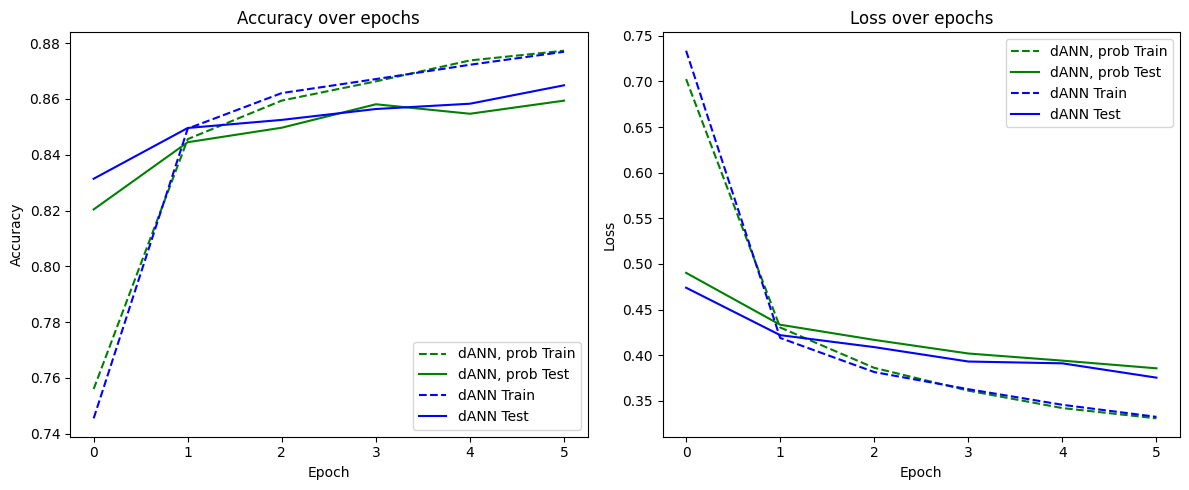

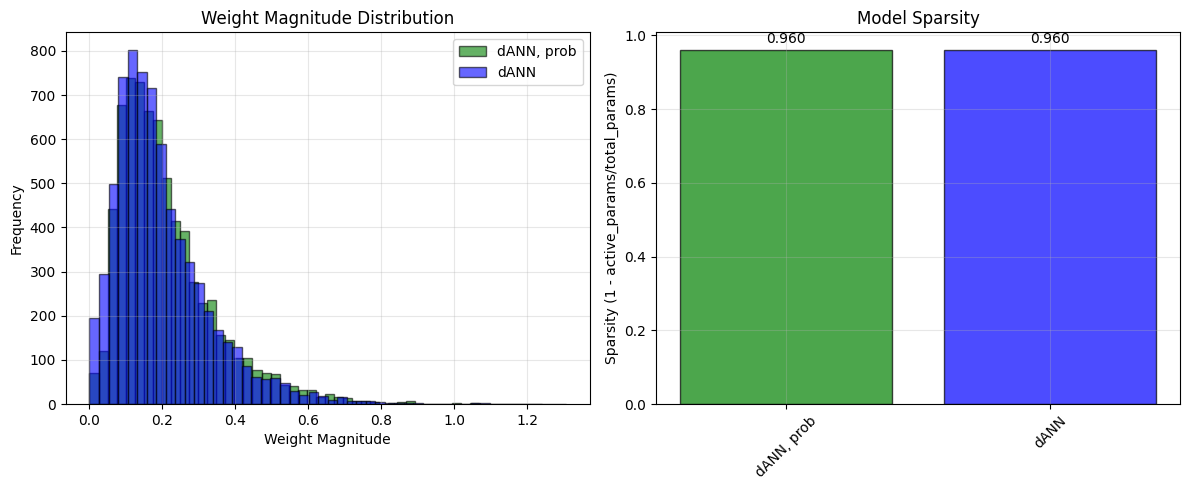


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3308       0.3857       87.7       % 85.9       %
dANN                 0.3325       0.3754       87.7       % 86.5       %


In [ ]:
# %%

try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.004 # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=64,
            probabilistic_resampling=True,
            p_max_prune=1.0,
            threshold_w=0.05,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

In [ ]:
# %%

try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.004 # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=256,
            probabilistic_resampling=True,
            p_max_prune=1.0,
            threshold_w=0.05,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  22%|██▏       | 306/1410 [00:01<00:04, 248.75it/s, Epoch=2/6, Batch=73/235, Loss=0.4248] 

num of dendrite successful swaps: 1935


Training :  40%|███▉      | 558/1410 [00:02<00:03, 238.78it/s, Epoch=3/6, Batch=91/235, Loss=0.4636] 

num of dendrite successful swaps: 1292


Training :  58%|█████▊    | 819/1410 [00:03<00:02, 249.84it/s, Epoch=4/6, Batch=118/235, Loss=0.3549]

num of dendrite successful swaps: 985


Training :  76%|███████▌  | 1068/1410 [00:04<00:01, 238.00it/s, Epoch=5/6, Batch=133/235, Loss=0.3134]

num of dendrite successful swaps: 820


Training :  94%|█████████▍| 1332/1410 [00:05<00:00, 261.58it/s, Epoch=6/6, Batch=163/235, Loss=0.3391]

num of dendrite successful swaps: 661


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 247.61it/s, Epoch=6/6, Batch=234/235, Loss=0.3765]


Number of mask updates: 6
Train loss dANN, prob model: 0.3354
Train accuracy dANN, prob model: 87.6%
Test accuracy dANN, prob model: 85.9%

Training dANN model...


Training :  42%|████▏     | 587/1410 [00:02<00:03, 253.79it/s, Epoch=3/6, Batch=119/235, Loss=0.3762]


KeyboardInterrupt: 

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 177/1410 [00:00<00:05, 244.69it/s, Epoch=1/6, Batch=178/235, Loss=0.4987]

num of dendrite successful swaps: 3184


Training :  22%|██▏       | 308/1410 [00:01<00:04, 251.59it/s, Epoch=2/6, Batch=75/235, Loss=0.4795] 

num of dendrite successful swaps: 2120


Training :  31%|███       | 435/1410 [00:01<00:03, 259.26it/s, Epoch=2/6, Batch=202/235, Loss=0.3201]

num of dendrite successful swaps: 1584


Training :  40%|████      | 564/1410 [00:02<00:03, 258.26it/s, Epoch=3/6, Batch=97/235, Loss=0.3762] 

num of dendrite successful swaps: 1289


Training :  49%|████▉     | 691/1410 [00:02<00:02, 263.38it/s, Epoch=3/6, Batch=224/235, Loss=0.3288]

num of dendrite successful swaps: 1068


Training :  58%|█████▊    | 819/1410 [00:03<00:02, 257.12it/s, Epoch=4/6, Batch=118/235, Loss=0.4007]

num of dendrite successful swaps: 924


Training :  67%|██████▋   | 939/1410 [00:03<00:01, 264.88it/s, Epoch=5/6, Batch=4/235, Loss=0.3409]  

num of dendrite successful swaps: 780


Training :  76%|███████▌  | 1075/1410 [00:04<00:01, 259.16it/s, Epoch=5/6, Batch=140/235, Loss=0.3401]

num of dendrite successful swaps: 728


Training :  85%|████████▍ | 1195/1410 [00:04<00:00, 243.02it/s, Epoch=6/6, Batch=26/235, Loss=0.2818] 

num of dendrite successful swaps: 695


Training :  94%|█████████▍| 1331/1410 [00:05<00:00, 260.30it/s, Epoch=6/6, Batch=162/235, Loss=0.4559]

num of dendrite successful swaps: 653


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 253.85it/s, Epoch=6/6, Batch=234/235, Loss=0.3260]


Number of mask updates: 11
Train loss dANN, prob model: 0.3288
Train accuracy dANN, prob model: 87.9%
Test accuracy dANN, prob model: 86.1%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 254.78it/s, Epoch=6/6, Batch=234/235, Loss=0.4049]


Number of mask updates: 11
Train loss dANN model: 0.3371
Train accuracy dANN model: 87.6%
Test accuracy dANN model: 86.4%


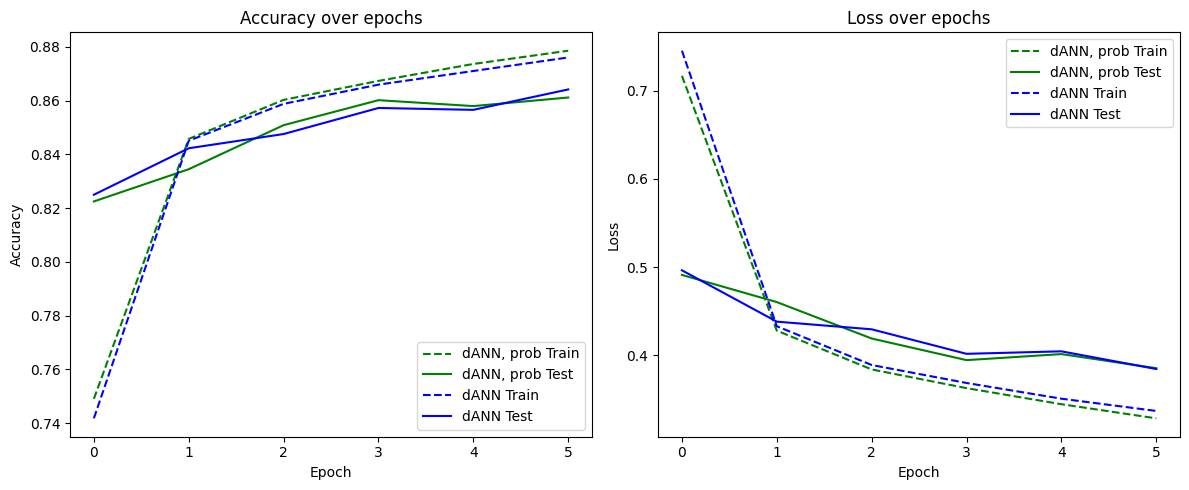

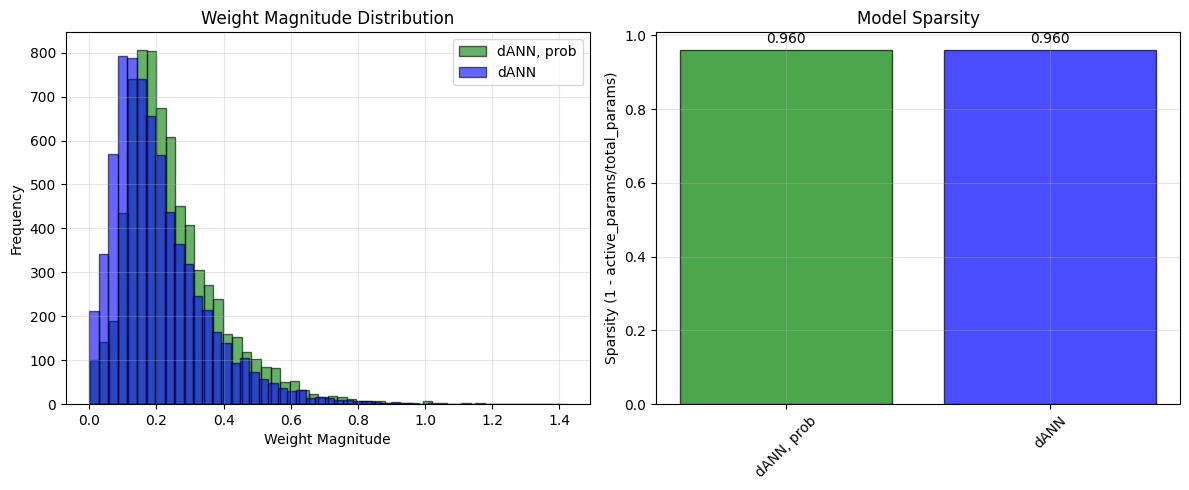


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3288       0.3856       87.9       % 86.1       %
dANN                 0.3371       0.3846       87.6       % 86.4       %


In [ ]:
# %%

try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.004 # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=1.0,
            threshold_w=0.1,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  12%|█▏        | 176/1410 [00:00<00:05, 243.00it/s, Epoch=1/6, Batch=177/235, Loss=0.4979]

num of dendrite successful swaps: 3184


Training :  21%|██▏       | 303/1410 [00:01<00:04, 237.56it/s, Epoch=2/6, Batch=70/235, Loss=0.4399] 

num of dendrite successful swaps: 2120


Training :  31%|███       | 432/1410 [00:01<00:04, 240.61it/s, Epoch=2/6, Batch=199/235, Loss=0.3756]

num of dendrite successful swaps: 1584


Training :  40%|███▉      | 560/1410 [00:02<00:03, 236.01it/s, Epoch=3/6, Batch=93/235, Loss=0.3350] 

num of dendrite successful swaps: 1289


Training :  49%|████▊     | 684/1410 [00:02<00:03, 236.44it/s, Epoch=3/6, Batch=217/235, Loss=0.4225]

num of dendrite successful swaps: 1068


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 245.30it/s, Epoch=4/6, Batch=117/235, Loss=0.3068]

num of dendrite successful swaps: 924


Training :  66%|██████▋   | 937/1410 [00:03<00:01, 252.75it/s, Epoch=5/6, Batch=2/235, Loss=0.4195]  

num of dendrite successful swaps: 780


Training :  76%|███████▌  | 1070/1410 [00:04<00:01, 241.10it/s, Epoch=5/6, Batch=135/235, Loss=0.2925]

num of dendrite successful swaps: 728


Training :  85%|████████▍ | 1195/1410 [00:04<00:00, 235.64it/s, Epoch=6/6, Batch=26/235, Loss=0.2818] 

num of dendrite successful swaps: 695


Training :  94%|█████████▍| 1330/1410 [00:05<00:00, 258.72it/s, Epoch=6/6, Batch=161/235, Loss=0.3244]

num of dendrite successful swaps: 653


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 241.62it/s, Epoch=6/6, Batch=234/235, Loss=0.3260]


Number of mask updates: 11
Train loss dANN, prob model: 0.3288
Train accuracy dANN, prob model: 87.9%
Test accuracy dANN, prob model: 86.1%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 254.64it/s, Epoch=6/6, Batch=234/235, Loss=0.4130]


Number of mask updates: 1
Train loss dANN model: 0.3439
Train accuracy dANN model: 87.4%
Test accuracy dANN model: 86.2%


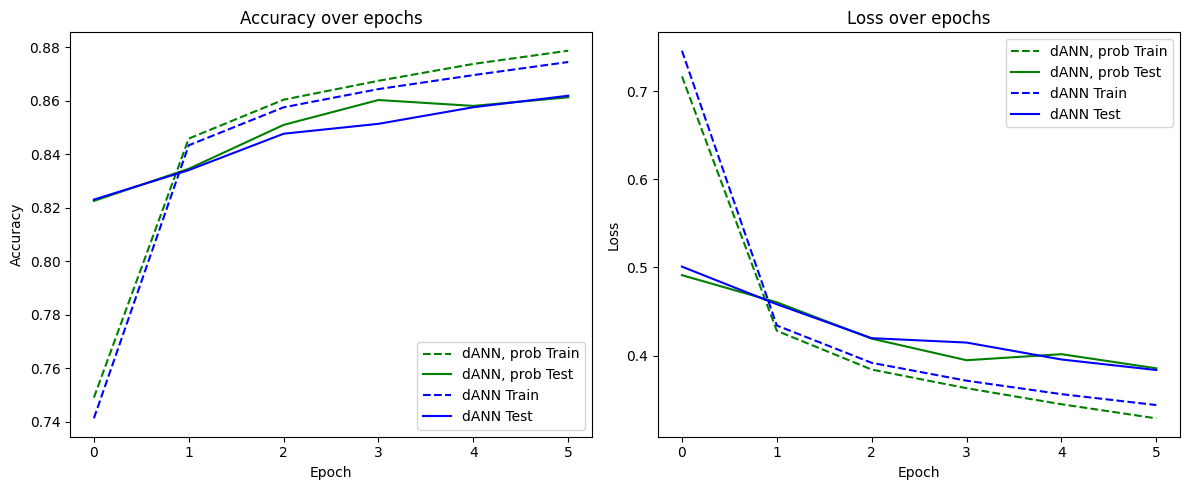

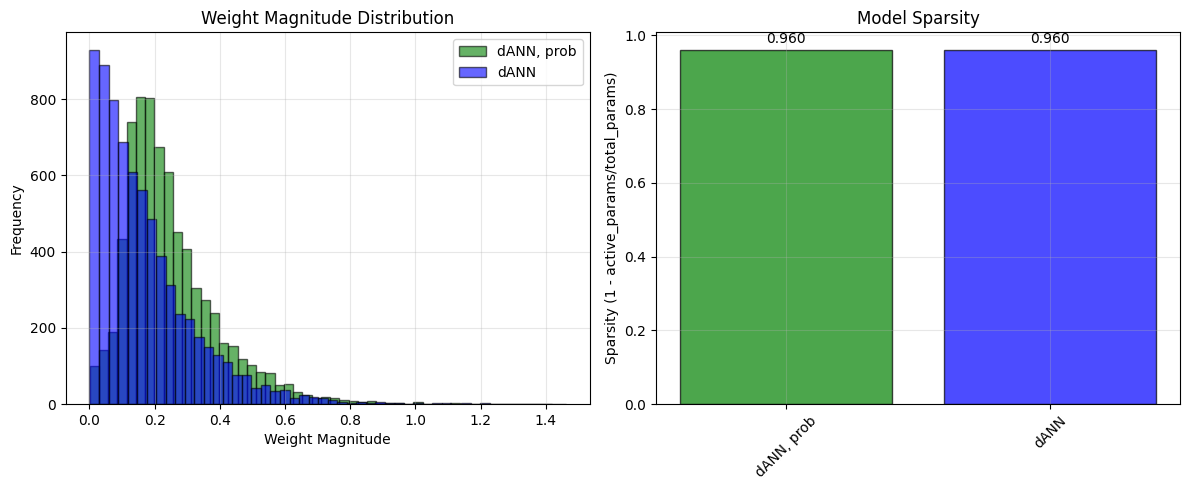


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3288       0.3856       87.9       % 86.1       %
dANN                 0.3439       0.3836       87.4       % 86.2       %


In [ ]:
# %%

try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.004 # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=1.0,
            threshold_w=0.1,
            steepness=0.001,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)

Using CuPy (GPU acceleration)

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN, prob model

parameters: dendrite_mask: 7130, dendrite_b: 230, soma_W: 230, soma_b: 10
Number of params: 7710 of dANN model
Loading FASHION-MNIST dataset...
Training data shape: (60000, 784), (60000, 10)
Test data shape: (10000, 784), (10000, 10)

Training dANN, prob model...


Training :  13%|█▎        | 179/1410 [00:00<00:04, 259.06it/s, Epoch=1/6, Batch=180/235, Loss=0.4013]

num of dendrite successful swaps: 2898


Training :  22%|██▏       | 308/1410 [00:01<00:04, 247.73it/s, Epoch=2/6, Batch=75/235, Loss=0.4191] 

num of dendrite successful swaps: 1946


Training :  31%|███       | 431/1410 [00:01<00:03, 253.94it/s, Epoch=2/6, Batch=198/235, Loss=0.4827]

num of dendrite successful swaps: 1466


Training :  40%|███▉      | 558/1410 [00:02<00:03, 243.71it/s, Epoch=3/6, Batch=91/235, Loss=0.3746] 

num of dendrite successful swaps: 1178


Training :  49%|████▉     | 691/1410 [00:02<00:02, 250.36it/s, Epoch=3/6, Batch=224/235, Loss=0.3597]

num of dendrite successful swaps: 957


Training :  58%|█████▊    | 818/1410 [00:03<00:02, 251.96it/s, Epoch=4/6, Batch=117/235, Loss=0.3818]

num of dendrite successful swaps: 861


Training :  66%|██████▋   | 935/1410 [00:03<00:01, 247.74it/s, Epoch=4/6, Batch=234/235, Loss=0.4447]

num of dendrite successful swaps: 749


Training :  76%|███████▋  | 1076/1410 [00:04<00:01, 250.01it/s, Epoch=5/6, Batch=141/235, Loss=0.3343]

num of dendrite successful swaps: 711


Training :  84%|████████▍ | 1191/1410 [00:04<00:00, 226.60it/s, Epoch=6/6, Batch=22/235, Loss=0.3145] 

num of dendrite successful swaps: 614


Training :  94%|█████████▍| 1327/1410 [00:05<00:00, 233.62it/s, Epoch=6/6, Batch=158/235, Loss=0.4279]

num of dendrite successful swaps: 589


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 244.87it/s, Epoch=6/6, Batch=234/235, Loss=0.3427]


Number of mask updates: 11
Train loss dANN, prob model: 0.3278
Train accuracy dANN, prob model: 87.9%
Test accuracy dANN, prob model: 86.8%

Training dANN model...


Training : 100%|█████████▉| 1404/1410 [00:05<00:00, 247.42it/s, Epoch=6/6, Batch=234/235, Loss=0.2716]


Number of mask updates: 1
Train loss dANN model: 0.3419
Train accuracy dANN model: 87.4%
Test accuracy dANN model: 86.2%


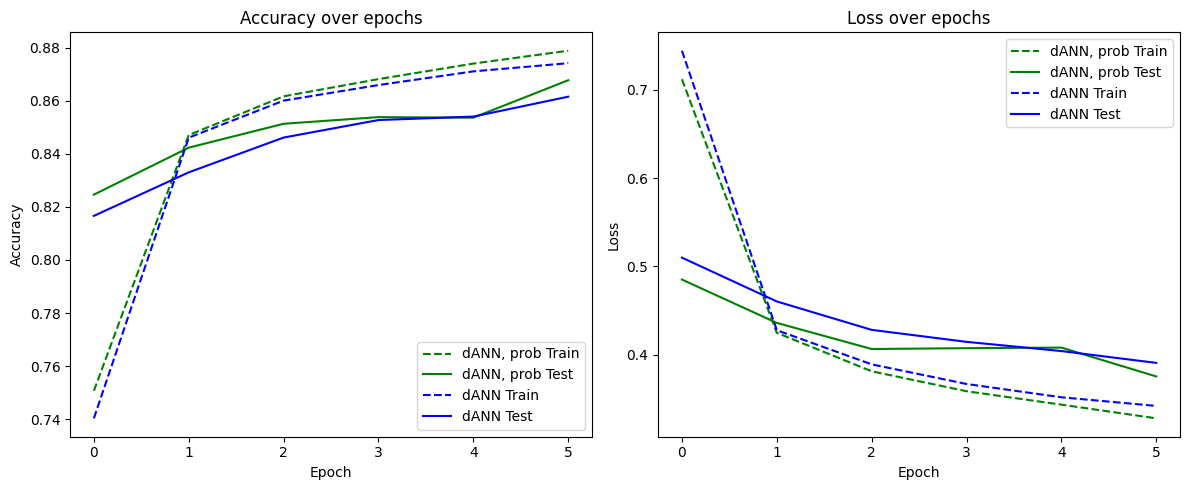

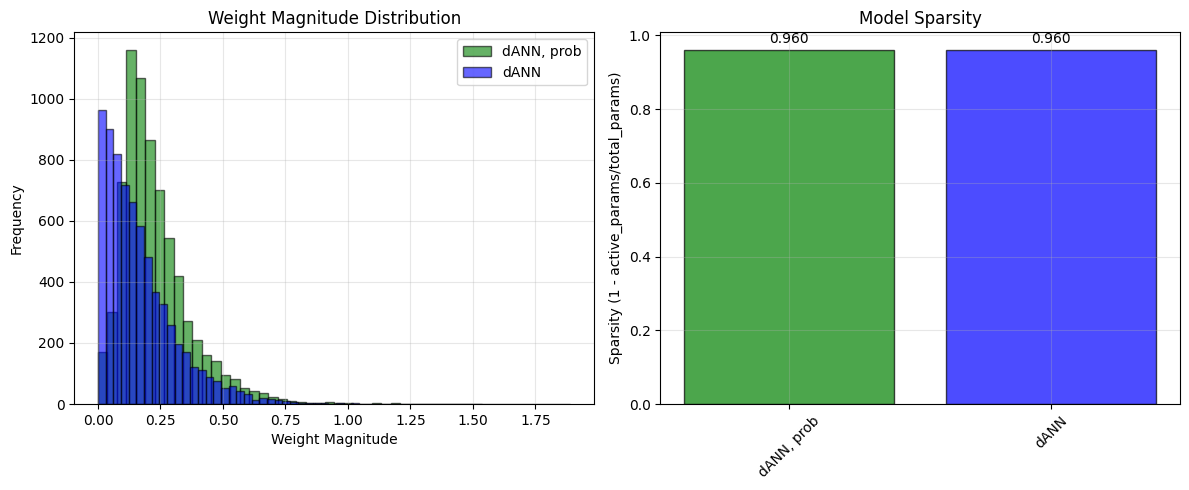


FINAL RESULTS SUMMARY
Model                Train Loss   Test Loss    Train Acc    Test Acc    
--------------------------------------------------------------------
dANN, prob           0.3278       0.3752       87.9       % 86.8       %
dANN                 0.3419       0.3906       87.4       % 86.2       %


In [ ]:
# %%

try:
    import cupy as cp

    # Test if CuPy can actually access CUDA and random number generator
    cp.cuda.Device(0).compute_capability
    cp.random.seed(1)  # Test if random number generator works
    print("Using CuPy (GPU acceleration)")
except (ImportError, Exception) as e:
    import numpy as cp

    print(f"CuPy not available or CUDA error ({type(e).__name__}), using NumPy (CPU)")
from modules import (
    Adam,
    CrossEntropy,
    LeakyReLU,
    Sequential,
    DendriticLayer,
    LinearLayer,
)
from training import train_models

# for repoducability
cp.random.seed(1223)

# data config
dataset = "fashion-mnist"  # "mnist", "fashion-mnist", "cifar10"
subset_size = None
data_augmentation = True

# config
n_epochs = 6  # 15 MNIST, 20 Fashion-MNIST
lr = 0.004 # 0.003
weight_decay = 0.0  # 0.001
batch_size = 256
n_classes = 10

if dataset in ["mnist", "fashion-mnist"]:
    in_dim = 28 * 28  # Image dimensions (28x28 MNIST, 32x32x3 CIFAR-10)
elif dataset == "cifar10":
    in_dim = 32 * 32 * 3
else:
    raise ValueError(f"Invalid dataset: {dataset}")

# dendriticmodel config
n_dendrite_inputs = 31  # 31 / 128
n_dendrites = 23  # 23 / 6
n_neurons = 10  # 10 / 10
strategy = "random"  # ["random", "local-receptive-fields", "fully-connected"]

# model to compare
model_1 = Sequential(
        [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=True,
            steps_to_resample=128,
            probabilistic_resampling=True,
            p_max_prune=1.0,
            threshold_w=0.08,
            steepness=0.005,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline dANN
model_2 = Sequential(
    [
        DendriticLayer(
            in_dim,
            n_neurons=n_neurons,
            n_dendrites=n_dendrites,
            n_dendrite_inputs=n_dendrite_inputs,
            soma_enabled=True,
            synaptic_resampling=False,
            percentage_resample=0.1,
            steps_to_resample=128,
        ),
        LeakyReLU(),
        LinearLayer(n_neurons, n_classes),
    ]
)
# baseline vANN
model_3 = Sequential(
    [
        LinearLayer(in_dim, 23, bias=False),
        LeakyReLU(),
        LinearLayer(23, 15, bias=False),
        LeakyReLU(),
        LinearLayer(15, n_classes),
    ]
)


criterion = CrossEntropy()
optimiser = Adam(model_1.params(), criterion, lr=lr, weight_decay=weight_decay)
b_optimiser = Adam(model_2.params(), criterion, lr=lr, weight_decay=weight_decay)
v_optimiser = Adam(model_3.params(), criterion, lr=lr, weight_decay=weight_decay)

models_config = [
    [model_1, optimiser, "dANN, prob"],
    [model_2, b_optimiser, "dANN"],
    # [model_3, v_optimiser, "vANN"],
]

results = train_models(
    models_config,
    dataset,
    criterion,
    n_epochs,
    data_augmentation=data_augmentation,
    batch_size=batch_size,
)